# IDC409 Project No-1 Continuum Supression <br>
### Group No. - 15 <br>
### Ketan - MS21028, Shivam Kumar- MS21084 and Anchuri Srujith - MS21167<br>

# Introduction
The goal of this project is to develop and evaluate a range of machine learning and deep learning models to classify events as either "Signal" or "Noise." This binary classification problem is crucial in domains such as high-energy physics, finance, and anomaly detection, where identifying meaningful events amidst large volumes of background data is essential.<br> 
We have used below models for this classification purpose.<br>

## ALGORITHMS USED <br>

1 Logistic Regression from scratch <br>

2 DNN - Simple to complex architectures( total 3) <br>

3 Xgboost - with Feature Importance and leaf visualization of decision tree<br>

4 K-Nearest Neighbours with Dimensionality reduction using PCA<br>

5 Voting Characteristics (Logistic Regression, Decision Tree and SVC) <br>

6 Random forest <br>

7 Decision Tree and Dimensionality reduction using PCA(Both 2 and 3 dimensional)<br>

8 SVC and Dimensionality reduction using PCA<br>

9 ELastic Regularised which is basically using both L1 and L2 regularisation with Logistic regression. <br>

10 LDA


### First install some requirements

In [ ]:
# Requirements

# pip install pandas numpy matplotlib sklearn seaborn xgboost torch shap

### Importing libraries

In [ ]:
# Importing Libraries



import pandas as pd



import numpy as np



import matplotlib.pyplot as plt



from xgboost import XGBClassifier



from sklearn.feature_selection import SelectFromModel



import seaborn as sns



import torch



import torch.nn as nn



import torch.optim as optim



from torch.utils.data import DataLoader, TensorDataset



import pandas as pd



import numpy as np



import seaborn as sns



import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler


from sklearn.metrics import accuracy_score, classification_report, log_loss


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier

from sklearn.impute import SimpleImputer

import numpy as np


import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.decomposition import PCA

import time

### Data Preprocessing



First we remove index column <br>

Then we map (0,1) to 1(Signal) and (2,3,4,5) to 0(Noise) <br>

After that we remove the label name row(row1). <br>

Also for additional uses we store label names as a feature_labels(before removing row1) <br>

In [ ]:
from google.colab import files



uploaded = files.upload()

In [2]:
data = pd.read_csv('/kaggle/input/data-hep-folder/data_hep.csv')  # Adjust the path 



print(type(data))



# Preprocessing steps



data = data.iloc[:, 1:]  # Index column removed



data["type"] = data["type"].map({0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0})  # Mapping (0,1)-> 1 and (2,3,4,5)-> 0



feature_labels = data.columns[:-1]







data = data.iloc[1:, :]  # Removing 1st Row



x = data.iloc[:, :-1]



y = data.iloc[:, -1]







print(x.shape)



print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(70605, 59)
(70605,)


Splitting data into train and test for evaluation purposes


In [3]:
# Split the data into training and validation sets



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)







print(x_train.shape)



print(y_train.shape)



print(x_test.shape)



print(y_test.shape)

(56484, 59)
(56484,)
(14121, 59)
(14121,)


### Here we define a function which will plot ROC-AUC curves and gives various evaluation metrics. We call this function after every model has been trained to check its metrics.


In [4]:
import matplotlib.pyplot as plt



from sklearn.metrics import (



    roc_curve, roc_auc_score, confusion_matrix, accuracy_score,



    precision_score, recall_score, f1_score, classification_report



)



import seaborn as sns







def evaluate_model(y_true, y_pred, y_prob):



    """



    Evaluate and plot various performance metrics for a binary classifier.







    Parameters:



    - y_true: array-like, true binary labels



    - y_pred: array-like, predicted binary labels



    - y_prob: array-like, predicted probabilities for the positive class







    Returns:



    - A dictionary containing all relevant metrics



    """







    # Calculate metrics



    accuracy = accuracy_score(y_true, y_pred)



    precision = precision_score(y_true, y_pred)



    recall = recall_score(y_true, y_pred)



    f1 = f1_score(y_true, y_pred)



    auc = roc_auc_score(y_true, y_prob)



    cm = confusion_matrix(y_true, y_pred)







    # Print classification report



    print("Classification Report:")



    print(classification_report(y_true, y_pred))







    # Plot ROC Curve



    fpr, tpr, thresholds = roc_curve(y_true, y_prob)



    plt.figure(figsize=(12, 6))



    plt.subplot(1, 2, 1)



    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')



    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')



    plt.xlim([0.0, 1.0])



    plt.ylim([0.0, 1.05])



    plt.xlabel('False Positive Rate')



    plt.ylabel('True Positive Rate')



    plt.title('Receiver Operating Characteristic (ROC)')



    plt.legend(loc="lower right")







    # Plot Confusion Matrix



    plt.subplot(1, 2, 2)



    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,



                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])



    plt.xlabel('Predicted Label')



    plt.ylabel('True Label')



    plt.title('Confusion Matrix')







    plt.tight_layout()



    plt.show()







    # Collect metrics in a dictionary



    metrics = {



        'Accuracy': accuracy,



        'Precision': precision,



        'Recall (Sensitivity)': recall,



        'F1 Score': f1,



        'AUC': auc,



        'Confusion Matrix': cm



    }







    return metrics

### Before proceeding with model we have to familiarize ourself with various class label of the data. Here were are plotting histograms(10 at a time to reduce memory consumption) to see distribution of dataset.


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

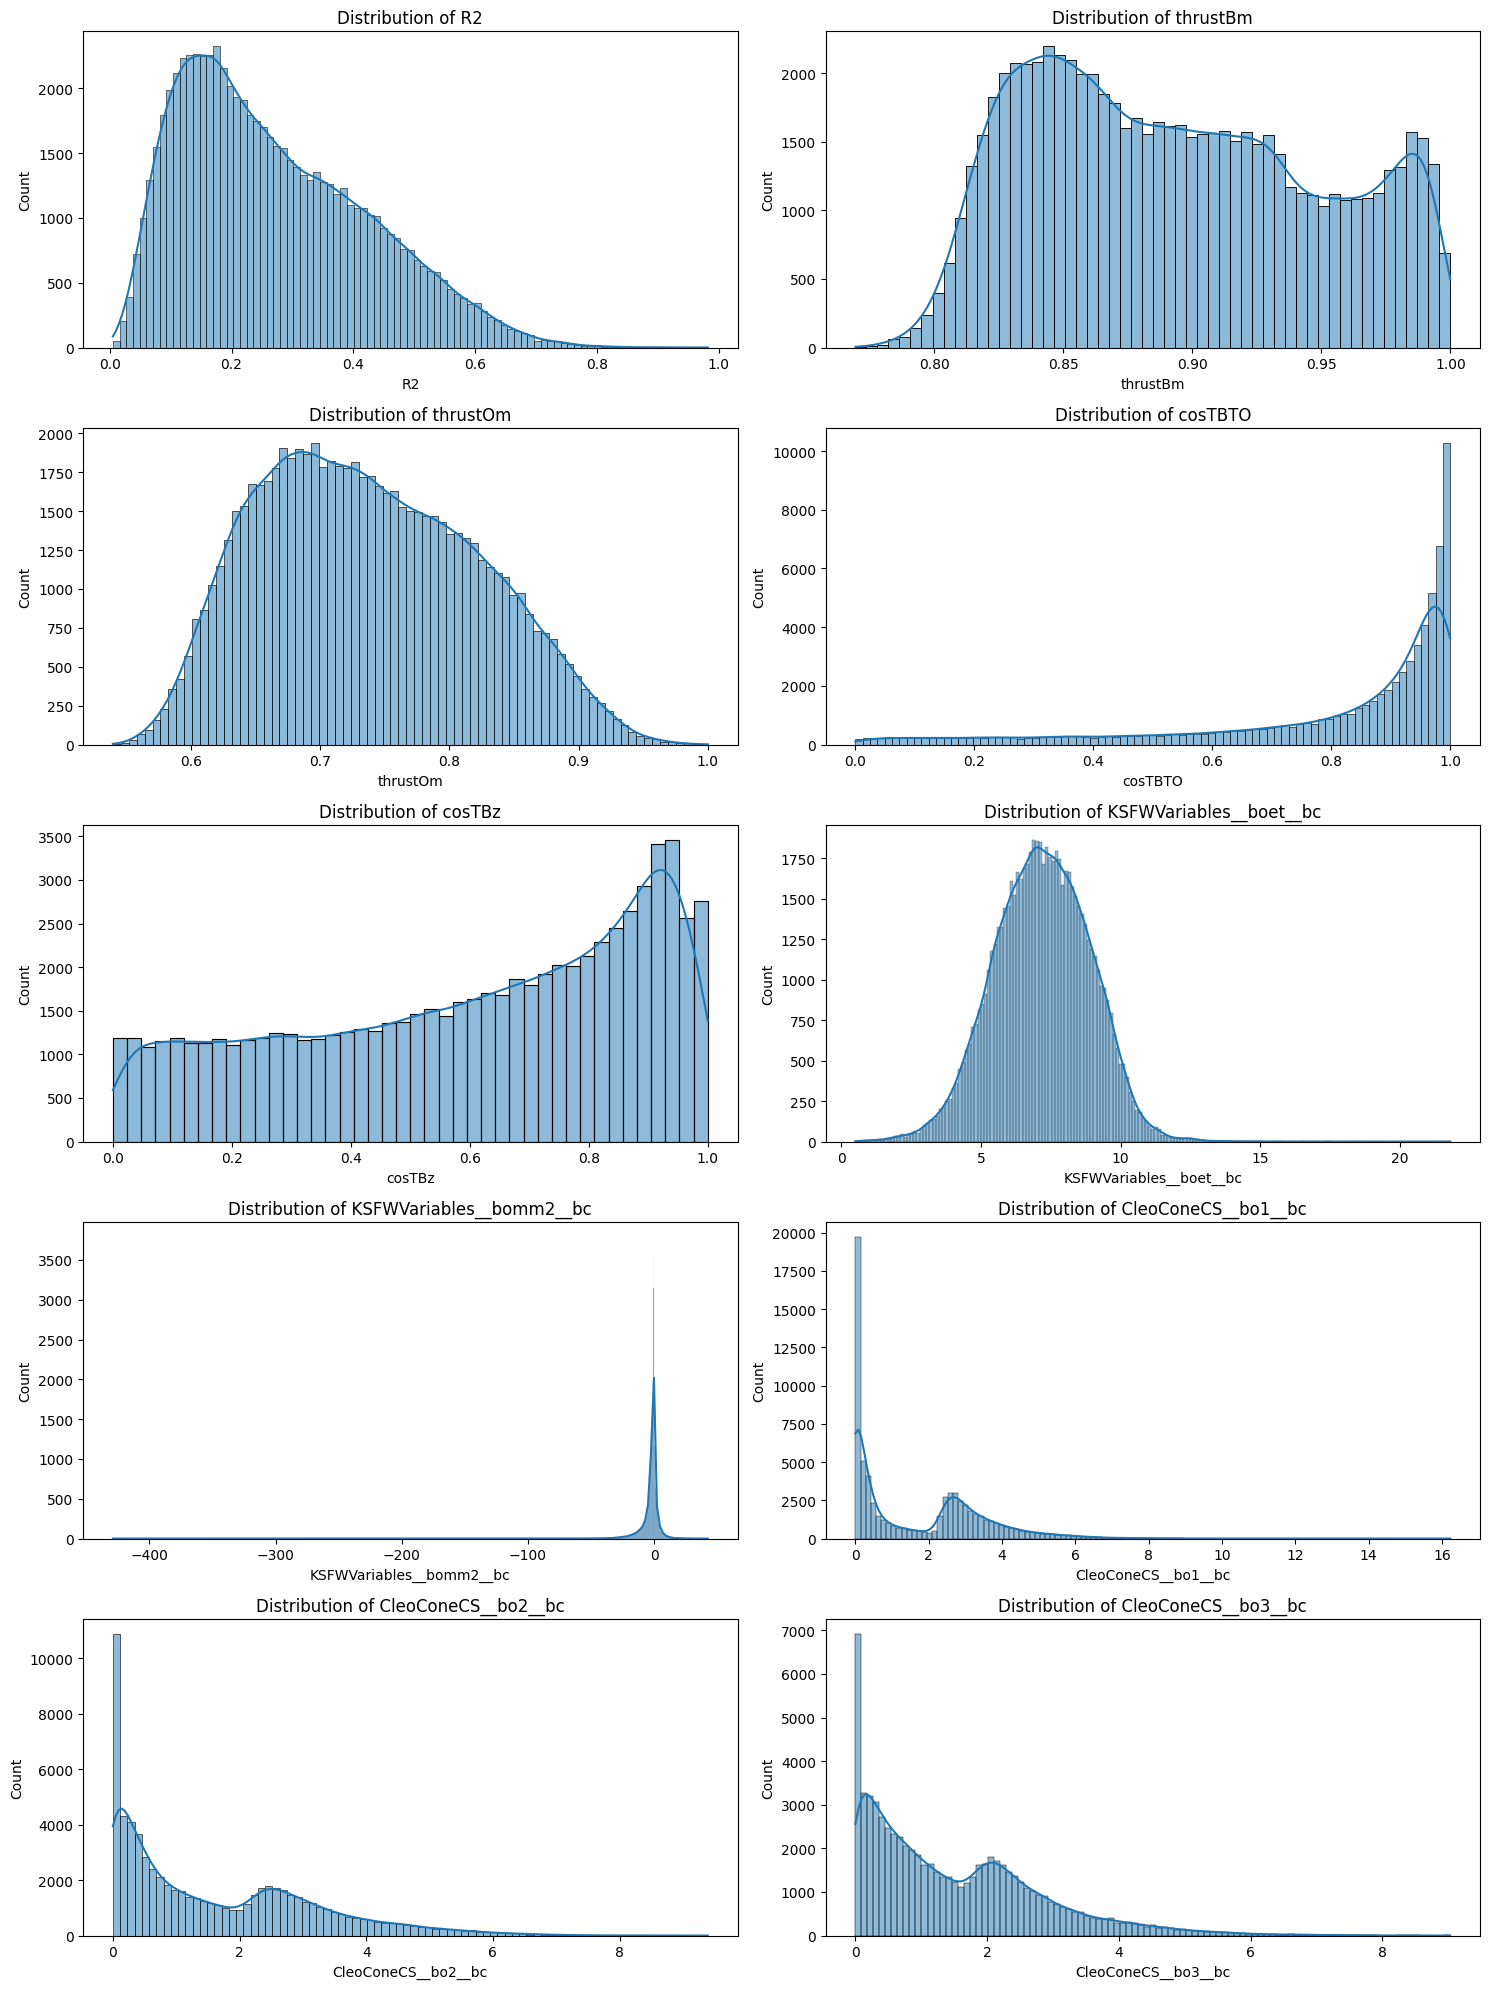

In [27]:
# Get number of columns and calculate starting/ending indices

x = data.iloc[:, :-1]



y = data.iloc[:, -1]





start = 0



end = 10



# Get batch columns



batch_columns = x.columns[start:end]







# Create subplot grid for 10 plots (5 rows, 2 columns)



fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))



axes = axes.flatten()







# Plot histograms for this batch



for i, column in enumerate(batch_columns):



    sns.histplot(data=x, x=column, ax=axes[i], kde=True)



    axes[i].set_title(f'Distribution of {column}')







plt.tight_layout()



plt.show()

# Now we start with training and evaluating different models

## Implementing Logistic Regression From Scratch

y = (w.T).x + b ; <br>

shape of x = (m, n); <br>

shape of y = (n, 1); <br>

shape of w = (m ,1); <br>

shape of b = (n, 1);  <br>





**Cost Function** : - <br> 

$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))]$ <br>

and **Gradient** \\ <br>



$\theta_j$ := $\theta_j$ + $\frac{\alpha}{m}$ $\sum_{i=1}^{m} \left[ (y^{(i)} - h_\theta(x^{(i)}))x_j^{(i)} \right]$ <br>


Epoch 0, Train Loss: 0.6931, Val Loss: 0.6876, Train Accuracy: 0.5045, Val Accuracy: 0.6594
Epoch 100, Train Loss: 0.5375, Val Loss: 0.5386, Train Accuracy: 0.7903, Val Accuracy: 0.7920
Epoch 200, Train Loss: 0.4831, Val Loss: 0.4846, Train Accuracy: 0.8036, Val Accuracy: 0.8053
Epoch 300, Train Loss: 0.4564, Val Loss: 0.4578, Train Accuracy: 0.8094, Val Accuracy: 0.8097
Epoch 400, Train Loss: 0.4408, Val Loss: 0.4423, Train Accuracy: 0.8123, Val Accuracy: 0.8130
Epoch 500, Train Loss: 0.4310, Val Loss: 0.4323, Train Accuracy: 0.8137, Val Accuracy: 0.8149
Epoch 600, Train Loss: 0.4242, Val Loss: 0.4255, Train Accuracy: 0.8146, Val Accuracy: 0.8157
Epoch 700, Train Loss: 0.4194, Val Loss: 0.4206, Train Accuracy: 0.8157, Val Accuracy: 0.8162
Epoch 800, Train Loss: 0.4158, Val Loss: 0.4170, Train Accuracy: 0.8169, Val Accuracy: 0.8172
Epoch 900, Train Loss: 0.4131, Val Loss: 0.4142, Train Accuracy: 0.8176, Val Accuracy: 0.8174
Epoch 1000, Train Loss: 0.4110, Val Loss: 0.4120, Train Accura

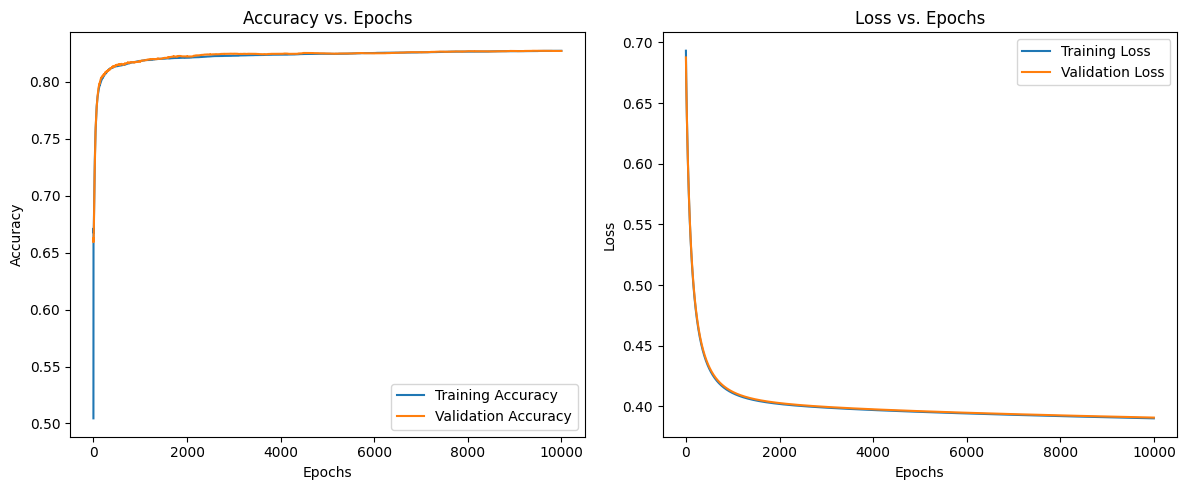

In [6]:
def sigmoid(z):



    return 1 / (1 + np.exp(-z))







def log_likelihood(y, y_pred):



    epsilon = 1e-15



    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)



    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))







def grad_descent(x, y, y_pred):



    m = x.shape[0]



    grad_w = np.dot(x.T, (y_pred - y)) / m



    grad_b = np.mean(y_pred - y)



    return grad_w, grad_b







def accuracy(y, y_pred):



    return np.mean((y_pred >= 0.5).astype(int) == y)







# Initialize data



np.random.seed(0)



m, n = x_train.shape



w = np.zeros(n)



b = 0







epochs = 10000



lr = 0.01







# Lists to store metrics



train_losses = []



val_losses = []



train_accuracies = []



val_accuracies = []







# Training loop



for epoch in range(epochs):



    # Training



    z_train = np.dot(x_train, w) + b



    y_pred_train = sigmoid(z_train)







    train_loss = log_likelihood(y_train, y_pred_train)



    train_accuracy = accuracy(y_train, y_pred_train)







    grad_w, grad_b = grad_descent(x_train, y_train, y_pred_train)



    w -= lr * grad_w



    b -= lr * grad_b







    # Validation



    z_val = np.dot(x_test, w) + b



    y_pred_val = sigmoid(z_val)







    val_loss = log_likelihood(y_test, y_pred_val)



    val_accuracy = accuracy(y_test, y_pred_val)







    # Store metrics



    train_losses.append(train_loss)



    val_losses.append(val_loss)



    train_accuracies.append(train_accuracy)



    val_accuracies.append(val_accuracy)







    if epoch % 100 == 0:



        print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "



              f"Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")







# Print final metrics



print("\nFinal Metrics:")



print(f"Training Accuracy: {train_accuracies[-1]:.4f}")



print(f"Validation Accuracy: {val_accuracies[-1]:.4f}")



print(f"Training Loss: {train_losses[-1]:.4f}")



print(f"Validation Loss: {val_losses[-1]:.4f}")







# Plotting



plt.figure(figsize=(12, 5))







# Plot accuracies



plt.subplot(1, 2, 1)



plt.plot(train_accuracies, label='Training Accuracy')



plt.plot(val_accuracies, label='Validation Accuracy')



plt.title('Accuracy vs. Epochs')



plt.xlabel('Epochs')



plt.ylabel('Accuracy')



plt.legend()







# Plot losses



plt.subplot(1, 2, 2)



plt.plot(train_losses, label='Training Loss')



plt.plot(val_losses, label='Validation Loss')



plt.title('Loss vs. Epochs')



plt.xlabel('Epochs')



plt.ylabel('Loss')



plt.legend()







plt.tight_layout()



plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      6854
           1       0.83      0.83      0.83      7267

    accuracy                           0.83     14121
   macro avg       0.83      0.83      0.83     14121
weighted avg       0.83      0.83      0.83     14121



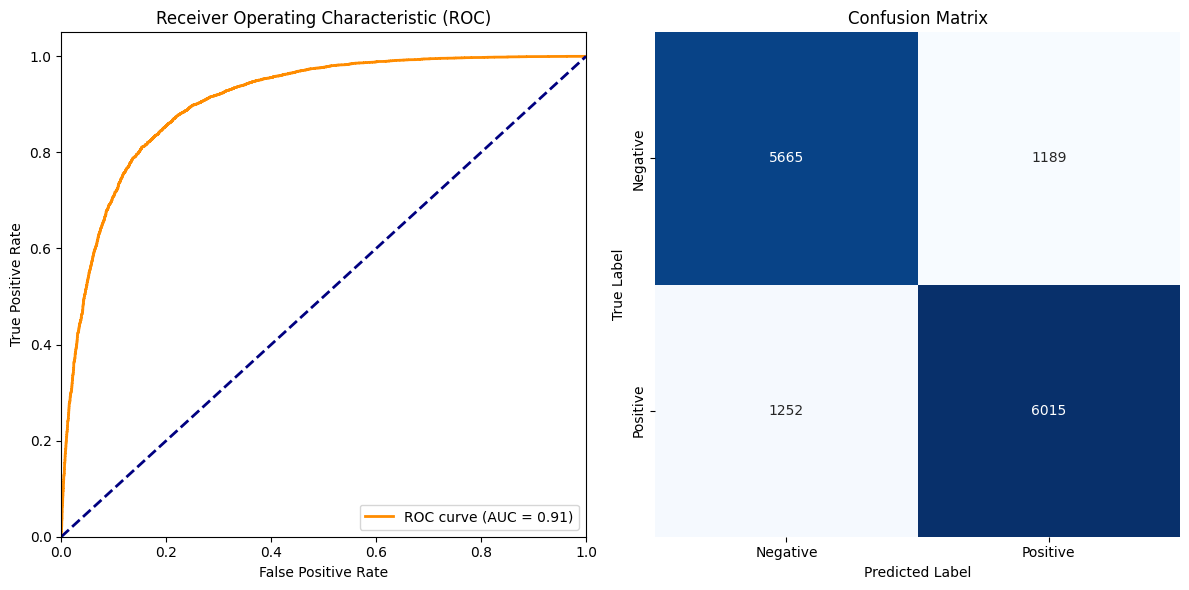


Evaluation Metrics: {'Accuracy': 0.8271368883223568, 'Precision': 0.834952803997779, 'Recall (Sensitivity)': 0.8277143250309619, 'F1 Score': 0.8313178080298529, 'AUC': 0.9055075229052479, 'Confusion Matrix': array([[5665, 1189],
       [1252, 6015]])}


In [7]:
# Assuming sigmoid, x_val, y_val, w, and b are already defined from your previous cell







# Calculate final predictions for evaluation



y_prob_val = sigmoid(np.dot(x_test, w) + b)   # Predicted probabilities for the positive class



y_pred_val_binary = (y_prob_val >= 0.5).astype(int)  # Convert probabilities to binary predictions







# Evaluate model with the function provided earlier



metrics = evaluate_model(y_test, y_pred_val_binary, y_prob_val)



print("\nEvaluation Metrics:", metrics)


## Implementing deep learning models

T4 GPU was used for these purposes on Colab and Kaggle. <br>

1 Fully connected neural networks <br>

2 Advanced neural network with drop output and batch normalisation <br>

3 Use Resnet18's architecture(building block(transformer) of GPT based LLMs) by setting its weight to zero. <br>


Using device: cuda
Epoch [10/100], Train Loss: 0.2777, Train Accuracy: 0.8837, test Loss: 0.3043, test Accuracy: 0.8768
Epoch [20/100], Train Loss: 0.2566, Train Accuracy: 0.8939, test Loss: 0.3048, test Accuracy: 0.8775
Epoch [30/100], Train Loss: 0.2310, Train Accuracy: 0.9047, test Loss: 0.3190, test Accuracy: 0.8748
Epoch [40/100], Train Loss: 0.2157, Train Accuracy: 0.9139, test Loss: 0.3397, test Accuracy: 0.8658
Epoch [50/100], Train Loss: 0.1983, Train Accuracy: 0.9216, test Loss: 0.3602, test Accuracy: 0.8637
Epoch [60/100], Train Loss: 0.1832, Train Accuracy: 0.9279, test Loss: 0.3861, test Accuracy: 0.8619
Epoch [70/100], Train Loss: 0.1674, Train Accuracy: 0.9350, test Loss: 0.4191, test Accuracy: 0.8603
Epoch [80/100], Train Loss: 0.1548, Train Accuracy: 0.9399, test Loss: 0.4451, test Accuracy: 0.8565
Epoch [90/100], Train Loss: 0.1434, Train Accuracy: 0.9444, test Loss: 0.4957, test Accuracy: 0.8519
Epoch [100/100], Train Loss: 0.1324, Train Accuracy: 0.9489, test Loss: 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

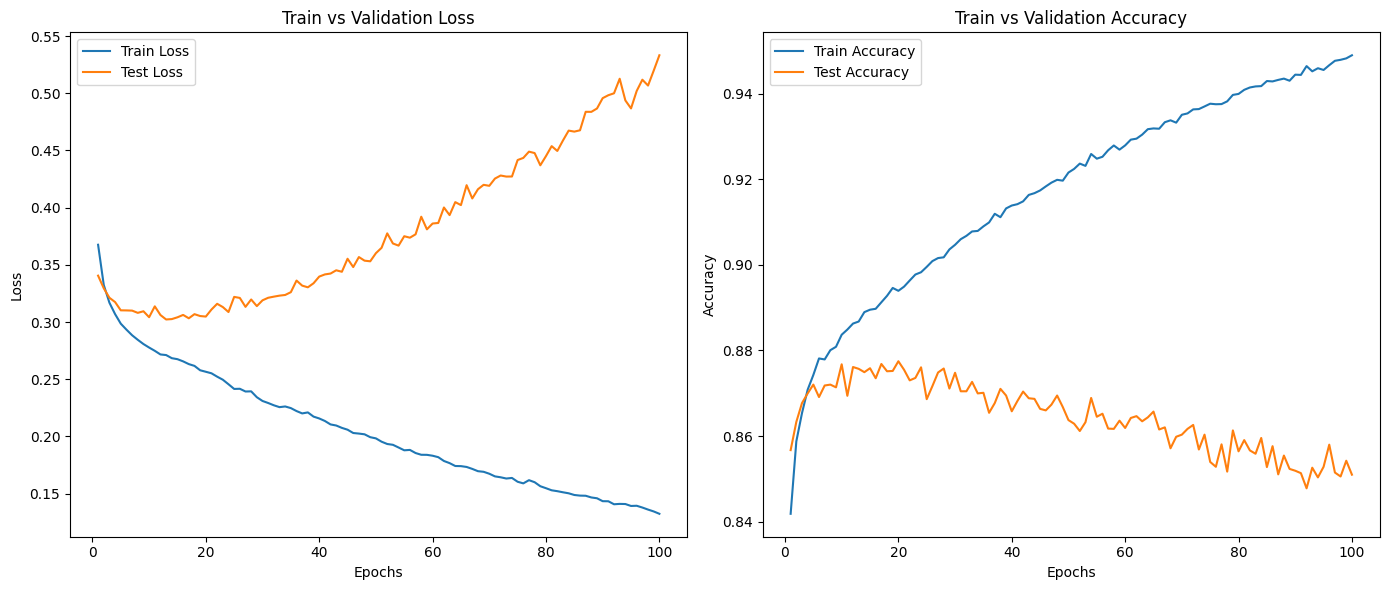

In [ ]:
# Check if CUDA is available



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



print(f"Using device: {device}")



# Scale the features



scaler = StandardScaler()



x_train_scaled = scaler.fit_transform(x_train)



x_test_scaled = scaler.transform(x_test)







# Convert to PyTorch tensors



x_train_tensor = torch.FloatTensor(x_train_scaled).to(device)



y_train_tensor = torch.FloatTensor(y_train.values).to(device)



x_test_tensor = torch.FloatTensor(x_test_scaled).to(device)



y_test_tensor = torch.FloatTensor(y_test.values).to(device)







# Create DataLoader



train_dataset = TensorDataset(x_train_tensor, y_train_tensor)



train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)







# Define the model



class Net(nn.Module):



    def __init__(self, input_size):



        super(Net, self).__init__()



        self.fc1 = nn.Linear(input_size, 128)



        self.fc2 = nn.Linear(128, 64)



        self.fc3 = nn.Linear(64, 1)







    def forward(self, x):



        x = torch.relu(self.fc1(x))



        x = torch.relu(self.fc2(x))



        x = torch.sigmoid(self.fc3(x))



        return x







input_size = x_train.shape[1]  # Get the number of input features



model = Net(input_size).to(device)







# Define loss function and optimizer



criterion = nn.BCELoss()



optimizer = optim.Adam(model.parameters())







# Lists to store losses and accuracies



train_losses = []



test_losses = []



train_accuracies = []



test_accuracies = []







# Training loop with validation



num_epochs = 100



for epoch in range(num_epochs):



    model.train()



    train_loss = 0



    correct_train = 0



    total_train = 0







    for batch_X, batch_y in train_loader:



        optimizer.zero_grad()



        outputs = model(batch_X)



        loss = criterion(outputs.squeeze(), batch_y)



        loss.backward()



        optimizer.step()







        train_loss += loss.item()



        pred_train = (outputs.squeeze() > 0.5).float()



        correct_train += (pred_train == batch_y).sum().item()



        total_train += batch_y.size(0)







    train_accuracy = correct_train / total_train



    avg_train_loss = train_loss / len(train_loader)







    # Validation



    model.eval()



    with torch.no_grad():



        outputs_test = model(x_test_tensor)



        test_loss = criterion(outputs_test.squeeze(), y_test_tensor)



        pred_test = (outputs_test.squeeze() > 0.5).float()



        test_accuracy = accuracy_score(y_test_tensor.cpu(), pred_test.cpu())







    # Store the losses and accuracies



    train_losses.append(avg_train_loss)



    test_losses.append(test_loss.item())



    train_accuracies.append(train_accuracy)



    test_accuracies.append(test_accuracy)







    if (epoch + 1) % 10 == 0:



        print(f'Epoch [{epoch+1}/{num_epochs}], '



              f'Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '



              f'test Loss: {test_loss.item():.4f}, test Accuracy: {test_accuracy:.4f}')







# Evaluation on test set



model.eval()



with torch.no_grad():



    y_pred = model(x_test_tensor)



    y_pred_class = (y_pred.squeeze() > 0.5).float().cpu().numpy()



    y_test_np = y_test_tensor.cpu().numpy()







accuracy = accuracy_score(y_test_np, y_pred_class)



print(f'\nModel accuracy: {accuracy:.4f}')







print('\nClassification Report:')



print(classification_report(y_test_np, y_pred_class))







# Feature importance (using gradient-based method)



model.train()  # Set model back to train mode for gradient computation



X_tensor = torch.FloatTensor(x.values).to(device)



X_tensor.requires_grad_()



output = model(X_tensor)



output.sum().backward()







feature_importance = X_tensor.grad.abs().mean(0).cpu().numpy()



importance_df = pd.DataFrame({



    'feature': x.columns,



    'importance': feature_importance



}).sort_values('importance', ascending=False)







print("\nTop 10 Most Important Features:")



print(importance_df.head(10))







# Plotting losses and accuracies



epochs = range(1, num_epochs+1)







plt.figure(figsize=(14, 6))







# Plot training and validation loss



plt.subplot(1, 2, 1)



sns.lineplot(x=epochs, y=train_losses, label='Train Loss')



sns.lineplot(x=epochs, y=test_losses, label='Test Loss')



plt.xlabel('Epochs')



plt.ylabel('Loss')



plt.title('Train vs Validation Loss')



plt.legend()







# Plot training and validation accuracy



plt.subplot(1, 2, 2)



sns.lineplot(x=epochs, y=train_accuracies, label='Train Accuracy')



sns.lineplot(x=epochs, y=test_accuracies, label='Test Accuracy')



plt.xlabel('Epochs')



plt.ylabel('Accuracy')



plt.title('Train vs Validation Accuracy')



plt.legend()







plt.tight_layout()



plt.show()


## This model is overfitting the data as train accuracy is continuously increasing with increase in number of epochs but test accuracy is decreasing and the opposite for respective losses.


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      6854
         1.0       0.84      0.87      0.86      7267

    accuracy                           0.85     14121
   macro avg       0.85      0.85      0.85     14121
weighted avg       0.85      0.85      0.85     14121



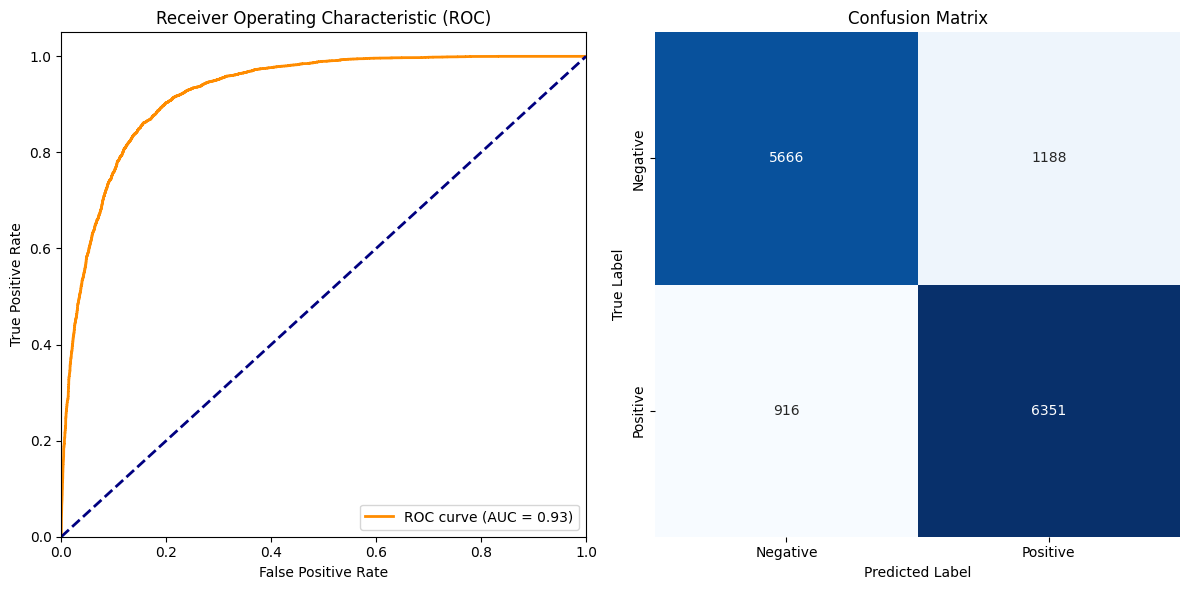


Evaluation Metrics:
Accuracy: 0.8510
Precision: 0.8424
Recall (Sensitivity): 0.8740
F1 Score: 0.8579
AUC: 0.9254

Confusion Matrix:
[[5666 1188]
 [ 916 6351]]


In [10]:
# Calculate probabilities for the positive class



with torch.no_grad():



    y_prob = model(x_test_tensor).squeeze().cpu().numpy()  # Probabilities







# Convert predictions to binary class labels



y_pred_class = (y_prob > 0.5).astype(int)







# Use evaluate_model function



metrics = evaluate_model(y_test_np, y_pred_class, y_prob)







# Print all calculated metrics



print("\nEvaluation Metrics:")



for metric_name, metric_value in metrics.items():



    if metric_name == "Confusion Matrix":



        print(f"\n{metric_name}:\n{metric_value}")



    else:



        print(f"{metric_name}: {metric_value:.4f}")


## Instead of fully connected we purpose dropout connection. 

In this setup, the neural network uses a combination of methods to improve generalization, manage overfitting, and enhance model training stability. Here's a breakdown of the theory behind each component:



Dropout Layers: Dropout is a regularization technique where, during each forward pass, a random subset of neurons is "dropped out" (set to zero) with a specified probability (e.g., 0.5). This prevents neurons from becoming overly dependent on specific features or neighboring neurons, which encourages the network to learn more generalized representations. During training, dropout simulates a "thinned" network with different neurons contributing to the output each time, which helps prevent overfitting. At test time, all neurons are active but scaled to account for dropout, making predictions more robust.<br>



Weight Decay (L2 Regularization): L2 regularization adds a penalty proportional to the square of the weights, discouraging excessively large weights, which can lead to overfitting. <br>



Learning Rate Scheduler: A learning rate scheduler dynamically adjusts the learning rate over training epochs to improve convergence. Here, the scheduler reduces the learning rate every 20 epochs by half, allowing larger steps early on when updates are more significant and gradually decreasing step sizes as the model converges to fine-tune weights with precision. <br>



Feature Importance with Gradient-Based Analysis: This method examines the influence of each feature by computing the gradients of the model's output concerning each input feature. Higher gradient values indicate greater influence on the output, providing a form of feature importance ranking. This allows for an understanding of which features most strongly impact the model's predictions.<br>

Number of features: Index(['R2', 'thrustBm', 'thrustOm', 'cosTBTO', 'cosTBz',
       'KSFWVariables__boet__bc', 'KSFWVariables__bomm2__bc',
       'CleoConeCS__bo1__bc', 'CleoConeCS__bo2__bc', 'CleoConeCS__bo3__bc',
       'CleoConeCS__bo4__bc', 'CleoConeCS__bo5__bc', 'CleoConeCS__bo6__bc',
       'CleoConeCS__bo7__bc', 'CleoConeCS__bo8__bc', 'CleoConeCS__bo9__bc',
       'CleoConeCS__bo1__cmROE__bc', 'CleoConeCS__bo2__cmROE__bc',
       'CleoConeCS__bo3__cmROE__bc', 'CleoConeCS__bo4__cmROE__bc',
       'CleoConeCS__bo5__cmROE__bc', 'CleoConeCS__bo6__cmROE__bc',
       'CleoConeCS__bo7__cmROE__bc', 'CleoConeCS__bo8__cmROE__bc',
       'CleoConeCS__bo9__cmROE__bc', 'KSFWVariables__bohso00__bc',
       'KSFWVariables__bohso02__bc', 'KSFWVariables__bohso04__bc',
       'KSFWVariables__bohso10__bc', 'KSFWVariables__bohso12__bc',
       'KSFWVariables__bohso14__bc', 'KSFWVariables__bohso20__bc',
       'KSFWVariables__bohso22__bc', 'KSFWVariables__bohso24__bc',
       'KSFWVariables__bohoo0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

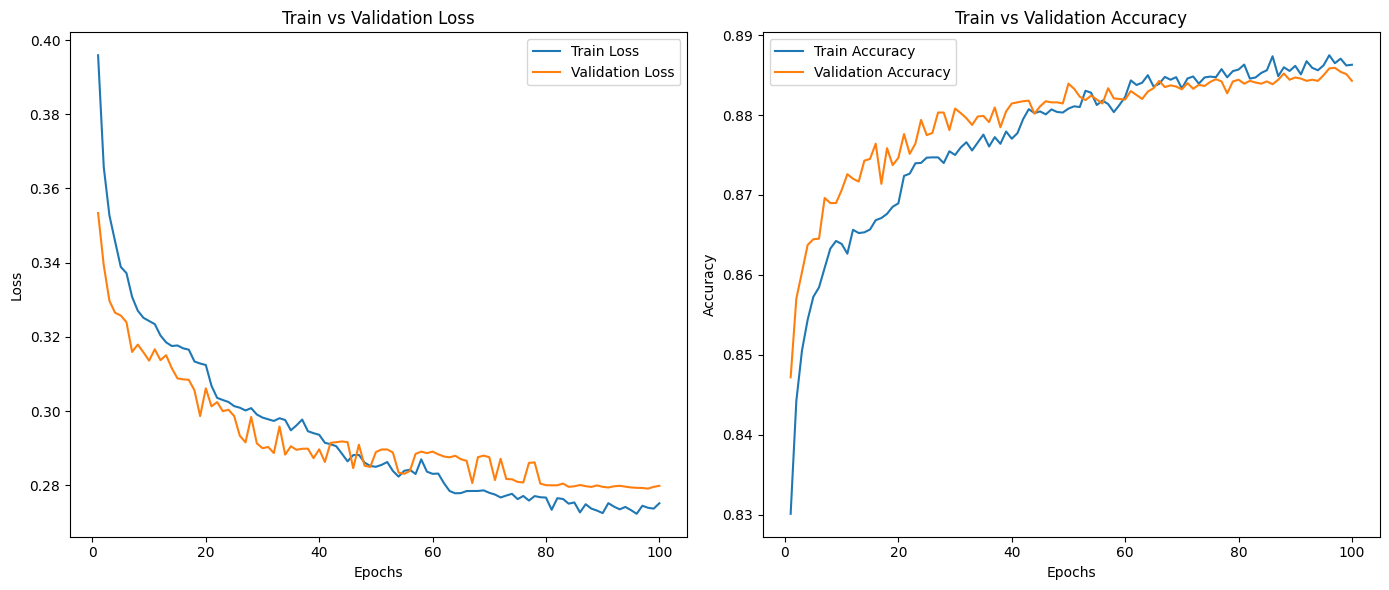

In [16]:




print(f"Number of features: {feature_labels}")







# Split the data



X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)







# Scale the features



scaler = StandardScaler()



X_train_scaled = scaler.fit_transform(X_train)



X_val_scaled = scaler.transform(X_val)







# Convert to PyTorch tensors



X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)



y_train_tensor = torch.FloatTensor(y_train.values).to(device)



X_val_tensor = torch.FloatTensor(X_val_scaled).to(device)



y_val_tensor = torch.FloatTensor(y_val.values).to(device)







# Create DataLoader



train_dataset = TensorDataset(X_train_tensor, y_train_tensor)



train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)







# Define the model with dropout layers



class Net(nn.Module):



    def __init__(self, input_size):



        super(Net, self).__init__()



        self.fc1 = nn.Linear(input_size, 128)



        self.dropout1 = nn.Dropout(0.5)



        self.fc2 = nn.Linear(128, 64)



        self.dropout2 = nn.Dropout(0.5)



        self.fc3 = nn.Linear(64, 1)







    def forward(self, x):



        x = torch.relu(self.fc1(x))



        x = self.dropout1(x)



        x = torch.relu(self.fc2(x))



        x = self.dropout2(x)



        x = torch.sigmoid(self.fc3(x))



        return x







input_size = x_train.shape[1]  # Get the number of input features



model = Net(input_size).to(device)







# Define loss function and optimizer with weight decay (L2 regularization)



criterion = nn.BCELoss()



optimizer = optim.Adam(model.parameters(), weight_decay=1e-4)  # Adding L2 regularization







# Learning rate scheduler



scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)







# Lists to store losses and accuracies for plotting



train_losses = []



val_losses = []



train_accuracies = []



val_accuracies = []







# Training loop with validation and regularization



num_epochs = 100



for epoch in range(num_epochs):



    model.train()



    train_loss = 0



    correct_train = 0



    total_train = 0







    for batch_X, batch_y in train_loader:



        optimizer.zero_grad()



        outputs = model(batch_X)



        loss = criterion(outputs.squeeze(), batch_y)



        loss.backward()



        optimizer.step()







        train_loss += loss.item()



        pred_train = (outputs.squeeze() > 0.5).float()



        correct_train += (pred_train == batch_y).sum().item()



        total_train += batch_y.size(0)







    train_accuracy = correct_train / total_train



    avg_train_loss = train_loss / len(train_loader)







    # Validation



    model.eval()



    with torch.no_grad():



        outputs_val = model(X_val_tensor)



        val_loss = criterion(outputs_val.squeeze(), y_val_tensor)



        pred_val = (outputs_val.squeeze() > 0.5).float()



        val_accuracy = accuracy_score(y_val_tensor.cpu(), pred_val.cpu())







    # Step the scheduler



    scheduler.step()







    # Store losses and accuracies for plotting



    train_losses.append(avg_train_loss)



    val_losses.append(val_loss.item())



    train_accuracies.append(train_accuracy)



    val_accuracies.append(val_accuracy)







    if (epoch + 1) % 10 == 0:



        print(f'Epoch [{epoch+1}/{num_epochs}], '



              f'Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '



              f'Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}')







# Evaluation on test set



model.eval()



with torch.no_grad():



    y_pred = model(X_val_tensor)



    y_pred_class = (y_pred.squeeze() > 0.5).float().cpu().numpy()



    y_test_np = y_val_tensor.cpu().numpy()







accuracy = accuracy_score(y_test_np, y_pred_class)



print(f'\nModel accuracy: {accuracy:.4f}')







print('\nClassification Report:')



print(classification_report(y_test_np, y_pred_class))







# Feature importance (using gradient-based method)



model.train()  # Set model back to train mode for gradient computation



X_tensor = torch.FloatTensor(x.values).to(device)



X_tensor.requires_grad_()



output = model(X_tensor)



output.sum().backward()







feature_importance = X_tensor.grad.abs().mean(0).cpu().numpy()



importance_df = pd.DataFrame({



    'feature': x.columns,



    'importance': feature_importance



}).sort_values('importance', ascending=False)







print("\nTop 10 Most Important Features:")



print(importance_df.head(10))







# Plotting losses and accuracies



epochs = range(1, num_epochs+1)







plt.figure(figsize=(14, 6))







# Plot training and validation loss



plt.subplot(1, 2, 1)



sns.lineplot(x=epochs, y=train_losses, label='Train Loss')



sns.lineplot(x=epochs, y=val_losses, label='Validation Loss')



plt.xlabel('Epochs')



plt.ylabel('Loss')



plt.title('Train vs Validation Loss')



plt.legend()







# Plot training and validation accuracy



plt.subplot(1, 2, 2)



sns.lineplot(x=epochs, y=train_accuracies, label='Train Accuracy')



sns.lineplot(x=epochs, y=val_accuracies, label='Validation Accuracy')



plt.xlabel('Epochs')



plt.ylabel('Accuracy')



plt.title('Train vs Validation Accuracy')



plt.legend()







plt.tight_layout()



plt.show()


## Almost no overfitting. Now both train and test accuracy are increasing with number of epochs. 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87      6854
         1.0       0.87      0.89      0.88      7267

    accuracy                           0.88     14121
   macro avg       0.88      0.88      0.88     14121
weighted avg       0.88      0.88      0.88     14121



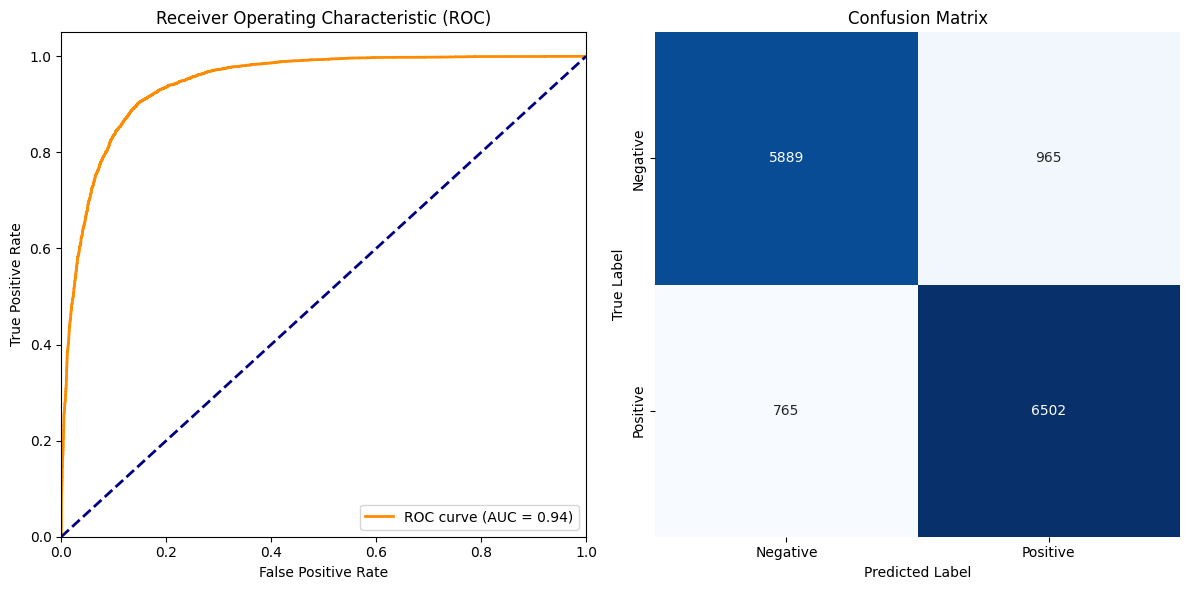


Evaluation Metrics:
Accuracy: 0.8775
Precision: 0.8708
Recall (Sensitivity): 0.8947
F1 Score: 0.8826
AUC: 0.9445

Confusion Matrix:
[[5889  965]
 [ 765 6502]]


In [17]:
# Calculate probabilities for the positive class on validation set



with torch.no_grad():



    y_prob = model(X_val_tensor).squeeze().cpu().numpy()  # Probabilities for positive class







# Convert predicted probabilities to binary class labels



y_pred_class = (y_prob > 0.5).astype(int)







# Use evaluate_model function to get metrics and plots



metrics = evaluate_model(y_test_np, y_pred_class, y_prob)







# Print all calculated metrics



print("\nEvaluation Metrics:")



for metric_name, metric_value in metrics.items():



    if metric_name == "Confusion Matrix":



        print(f"\n{metric_name}:\n{metric_value}")



    else:



        print(f"{metric_name}: {metric_value:.4f}")


## ResNet18 based architecture

I wanted to see if complicated architectures would perform any better with these kind of dataset. Due to popularity of transforms, I opted for Resnet18 with null weights!




/tmp/ipykernel_30/3325064135.py:118: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipykernel_30/3325064135.py:63: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/tmp/ipykernel_30/3325064135.py:84: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1/10, Train Loss: 0.3957, Train Accuracy: 0.8253, Val Loss: 0.3526, Val Accuracy: 0.8490
Epoch 2/10, Train Loss: 0.3011, Train Accuracy: 0.8767, Val Loss: 0.3669, Val Accuracy: 0.8444
Epoch 3/10, Train Loss: 0.1886, Train Accuracy: 0.9287, Val Loss: 0.4138, Val Accuracy: 0.8378
Epoch 4/10, Train Loss: 0.1030, Train Accuracy: 0.9653, Val Loss: 0.5419, Val Accuracy: 0.8313
Epoch 5/10, Train Loss: 0.0668, Train Accuracy: 0.9802, Val Loss: 0.5677, Val Accuracy: 0.8137
Epoch 6/10, Train Loss: 0.0440, Train Accuracy: 0.9879, Val Loss: 0.6662, Val Accuracy: 0.8285
Epoch 7/10, Train Loss: 0.0297, Train Accuracy: 0.9919, Val Loss: 0.6881, Val Accuracy: 0.8369
Epoch 8/10, Train Loss: 0.0201, Train Accuracy: 0.9952, Val Loss: 0.7183, Val Accuracy: 0.8433
Epoch 9/10, Train Loss: 0.0164, Train Accuracy: 0.9964, Val Loss: 0.7608, Val Accuracy: 0.8425
Epoch 10/10, Train Loss: 0.0130, Train Accuracy: 0.9974, Val Loss: 0.7718, Val Accuracy: 0.8446


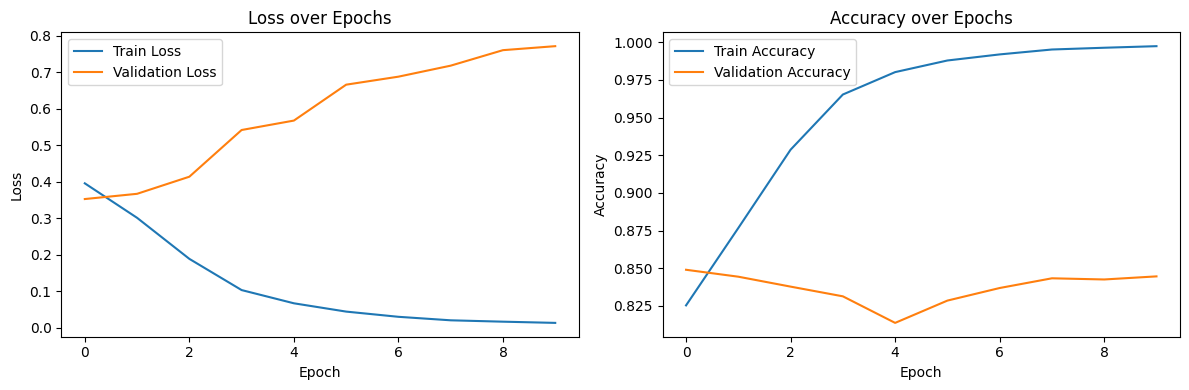

In [5]:
import os

import torch

import torch.nn as nn

import torch.optim as optim

from torch.utils.data import DataLoader, Dataset

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from torch.cuda.amp import autocast, GradScaler

from torchvision.models import resnet18

from torch.nn import TransformerEncoderLayer, TransformerEncoder



class CustomDataset(Dataset):

    def __init__(self, features, labels):

        self.features = features

        self.labels = torch.tensor([(1 if label in [0, 1] else 0) for label in labels], dtype=torch.float32)



    def __len__(self):

        return len(self.features)



    def __getitem__(self, idx):

        return self.features[idx], self.labels[idx]



class AdvancedClassifier(nn.Module):

    def __init__(self, input_size, num_classes=1):

        super(AdvancedClassifier, self).__init__()

        self.fc_input = nn.Linear(input_size, 3 * 64 * 64)

        self.resnet = resnet18(weights=None)

        self.resnet.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)

        num_ftrs = self.resnet.fc.in_features

        self.resnet.fc = nn.Identity()

        transformer_dim = 256

        self.linear_proj = nn.Linear(num_ftrs, transformer_dim)

        encoder_layer = TransformerEncoderLayer(d_model=transformer_dim, nhead=4, dim_feedforward=1024, dropout=0.2, batch_first=True)

        self.transformer_encoder = TransformerEncoder(encoder_layer, num_layers=3)

        self.fc1 = nn.Linear(transformer_dim, 128)

        self.bn1 = nn.BatchNorm1d(128)

        self.fc2 = nn.Linear(128, num_classes)

        self.dropout = nn.Dropout(0.3)



    def forward(self, x):

        x = self.fc_input(x)

        x = x.view(x.size(0), 3, 64, 64)

        x = self.resnet(x)

        x = self.linear_proj(x)

        x = x.unsqueeze(1)

        x = self.transformer_encoder(x)

        x = x.squeeze(1)

        x = self.dropout(torch.relu(self.bn1(self.fc1(x))))

        x = self.fc2(x)

        return x



def train(model, train_loader, criterion, optimizer, device, scaler):

    model.train()

    running_loss = 0.0

    correct = 0

    total = 0

    for features, labels in train_loader:

        features, labels = features.to(device), labels.to(device)

        optimizer.zero_grad()

        with autocast():

            outputs = model(features).squeeze()

            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()

        scaler.step(optimizer)

        scaler.update()

        running_loss += loss.item()

        predicted = (torch.sigmoid(outputs) > 0.5).float()

        total += labels.size(0)

        correct += (predicted == labels).sum().item()

    accuracy = correct / total

    return running_loss / len(train_loader), accuracy



def validate(model, val_loader, criterion, device):

    model.eval()

    running_loss = 0.0

    correct = 0

    total = 0

    with torch.no_grad():

        for features, labels in val_loader:

            features, labels = features.to(device), labels.to(device)

            with autocast():

                outputs = model(features).squeeze()

                loss = criterion(outputs, labels)

            running_loss += loss.item()

            predicted = (torch.sigmoid(outputs) > 0.5).float()

            total += labels.size(0)

            correct += (predicted == labels).sum().item()

    accuracy = correct / total

    return running_loss / len(val_loader), accuracy



def main():

    df = pd.read_csv('/kaggle/input/data-hep/data_hep.csv', index_col=0)

    features = df.drop('type', axis=1).values

    labels = df['type'].values

    scaler = StandardScaler()

    features = scaler.fit_transform(features)

    X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

    X_train = torch.FloatTensor(X_train.astype(np.float32))

    X_val = torch.FloatTensor(X_val.astype(np.float32))

    train_dataset = CustomDataset(X_train, y_train)

    val_dataset = CustomDataset(X_val, y_val)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)

    val_loader = DataLoader(val_dataset, batch_size=64, num_workers=4, pin_memory=True)

    checkpoint_dir = './checkpoints'

    best_model_dir = './best_model'

    os.makedirs(checkpoint_dir, exist_ok=True)

    os.makedirs(best_model_dir, exist_ok=True)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    input_size = X_train.shape[1]

    model = AdvancedClassifier(input_size).to(device)

    criterion = nn.BCEWithLogitsLoss()

    optimizer = optim.AdamW(model.parameters(), lr=5e-5, weight_decay=1e-4)

    num_epochs = 10

    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

    scaler = GradScaler()

    best_val_accuracy = 0.0

    patience = 20

    no_improve = 0



    train_losses, train_accuracies, val_losses, val_accuracies = [], [], [], []

    for epoch in range(num_epochs):

        train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device, scaler)

        val_loss, val_accuracy = validate(model, val_loader, criterion, device)

        scheduler.step()

        train_losses.append(train_loss)

        train_accuracies.append(train_accuracy)

        val_losses.append(val_loss)

        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

        if val_accuracy > best_val_accuracy:

            best_val_accuracy = val_accuracy

            no_improve = 0

            checkpoint = {

                'epoch': epoch + 1,

                'state_dict': model.state_dict(),

                'optimizer': optimizer.state_dict(),

                'val_accuracy': val_accuracy,

                'val_loss': val_loss

            }

            torch.save(checkpoint, os.path.join(best_model_dir, 'best_model.pth'))

        else:

            no_improve += 1

            if no_improve >= patience:

                print(f"Early stopping triggered after {patience} epochs without improvement.")

                break

    torch.save(model.state_dict(), 'hep_dc_binary_model_final.pth')



    # Plot the graphs after training

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)

    plt.plot(train_losses, label='Train Loss')

    plt.plot(val_losses, label='Validation Loss')

    plt.xlabel('Epoch')

    plt.ylabel('Loss')

    plt.title('Loss over Epochs')

    plt.legend()



    plt.subplot(1, 2, 2)

    plt.plot(train_accuracies, label='Train Accuracy')

    plt.plot(val_accuracies, label='Validation Accuracy')

    plt.xlabel('Epoch')

    plt.ylabel('Accuracy')

    plt.title('Accuracy over Epochs')

    plt.legend()



    plt.tight_layout()

    plt.show()



if __name__ == '__main__':

    main()


### Intially overfitting but gradually test accuracy improves. The train accuracy after just 5 epochs is close to 98%. 

### Overview of XGBoost

XGBoost (Extreme Gradient Boosting) is a machine learning algorithm based on decision trees and optimized for high performance. It's widely used for classification and regression tasks, particularly with structured/tabular data, due to its efficiency, flexibility, and scalability. XGBoost is known for handling large datasets well and often achieves high accuracy.



Explanation of the Process

Model Initialization: The XGBoost model is initialized with specific parameters: <br>



n_estimators=100: The model will create 100 decision trees in sequence, each aiming to correct the errors of the previous ones. <br>

learning_rate=0.1: Controls the step size when updating weights. <br>

max_depth=10: Limits the depth of each tree, which prevents overfitting by controlling model complexity. <br>

subsample=0.8 and colsample_bytree=0.8: These parameters reduce overfitting by training each tree on a random subset of the data and features, respectively. <br>

objective='binary:logistic': This defines the type of prediction (in this case, a binary classification task with logistic loss). <br>

tree_method='gpu_hist': Although commented out, this parameter would use GPU acceleration if enabled, speeding up training for large datasets. <br>

## XgBoost

### It is very fast with train accuracy upto 100% and test accuracy upto 88%. This model is one the best for large class labels dataset with binary prediction.

In [13]:




# Initialize XGBoost classifier



xgb = XGBClassifier(



    n_estimators=100,



    learning_rate=0.1,



    max_depth=10,



    min_child_weight=1,



    gamma=0,



    subsample=0.8,



    colsample_bytree=0.8,



    objective='binary:logistic',



    nthread=4,



    scale_pos_weight=1,



    seed=27,



    use_label_encoder=False,



    # tree_method='gpu_hist'  # Use GPU acceleration



)







# Fit the model



xgb.fit(x_train, y_train)







# Feature selection



selection = SelectFromModel(xgb, prefit=True, threshold='median')



x_train_selected = selection.transform(x_train)



x_test_selected = selection.transform(x_test)







# Train on selected features



xgb_selected = XGBClassifier(



    n_estimators=100,



    learning_rate=0.1,



    max_depth=10,



    min_child_weight=1,



    gamma=0,



    subsample=0.8,



    colsample_bytree=0.8,



    objective='binary:logistic',



    nthread=4,



    scale_pos_weight=1,



    seed=27,



    use_label_encoder=False,



    # tree_method='gpu_hist'  # Use GPU acceleration



)



xgb_selected.fit(x_train_selected, y_train)







# Make predictions



y_pred = xgb_selected.predict(x_test_selected)







# Calculate accuracy



accuracy = accuracy_score(y_test, y_pred)



print(f"Accuracy: {accuracy:.4f}")







# Feature importance



feature_importance = xgb_selected.feature_importances_



feature_names = x.columns[selection.get_support()].to_numpy()







# Sort features by importance



sorted_idx = np.argsort(feature_importance)



sorted_features = feature_names[sorted_idx]



sorted_importance = feature_importance[sorted_idx]







# Print feature importance



print("\nFeature Importance:")



for feature, importance in zip(sorted_features, sorted_importance):



    print(f"{feature}: {importance:.4f}")

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Accuracy: 0.8825

Feature Importance:
KSFWVariables__bohoo2__cmFS1__bc: 0.0113
KSFWVariables__bohso04__cmFS1__bc: 0.0141
KSFWVariables__bohso10__cmFS1__bc: 0.0142
KSFWVariables__bohso00__cmFS1__bc: 0.0144
KSFWVariables__bohso02__cmFS1__bc: 0.0145
KSFWVariables__bohso00__bc: 0.0147
foxWolframR4: 0.0148
KSFWVariables__bohso22__cmFS1__bc: 0.0151
thrustAxisCosTheta: 0.0155
CleoConeCS__bo2__cmROE__bc: 0.0156
KSFWVariables__bohso02__bc: 0.0160
KSFWVariables__bohso12__bc: 0.0179
cosTBz: 0.0183
KSFWVariables__bomm2__bc: 0.0185
foxWolframR2: 0.0187
KSFWVariables__bohoo2__bc: 0.0188
KSFWVariables__bohso22__bc: 0.0192
CleoConeCS__bo2__bc: 0.0207
KSFWVariables__bohso20__bc: 0.0208
KSFWVariables__bohso20__cmFS1__bc: 0.0209
KSFWVariables__boet__bc: 0.0210
KSFWVariables__bohoo0__bc: 0.0219
KSFWVariables__bohoo0__cmFS1__bc: 0.0257
cosTBTO: 0.0284
thrust: 0.0284
thrustBm: 0.0308
CleoConeCS__bo1__cmROE__bc: 0.0347
CleoConeCS__bo1__bc: 0.0384
thrustOm: 0.1080
R2: 0.3288


### Hyperparameter tuning

To see how accuracy changes with change in hyper paramaters(n_estimators, max_depth, learning_rate){every possible combination}. See the graph below to see what are the best hyper parameters.




n_estimators: 50, max_depth: 3, learning_rate: 0.01
Training Accuracy: 0.8267, Test Accuracy: 0.8259
n_estimators: 50, max_depth: 3, learning_rate: 0.05
Training Accuracy: 0.8347, Test Accuracy: 0.8344
n_estimators: 50, max_depth: 3, learning_rate: 0.1
Training Accuracy: 0.8525, Test Accuracy: 0.8526
n_estimators: 50, max_depth: 3, learning_rate: 0.2
Training Accuracy: 0.8639, Test Accuracy: 0.8611
n_estimators: 50, max_depth: 5, learning_rate: 0.01
Training Accuracy: 0.8462, Test Accuracy: 0.8447
n_estimators: 50, max_depth: 5, learning_rate: 0.05
Training Accuracy: 0.8558, Test Accuracy: 0.8523
n_estimators: 50, max_depth: 5, learning_rate: 0.1
Training Accuracy: 0.8710, Test Accuracy: 0.8652
n_estimators: 50, max_depth: 5, learning_rate: 0.2
Training Accuracy: 0.8863, Test Accuracy: 0.8744
n_estimators: 50, max_depth: 7, learning_rate: 0.01
Training Accuracy: 0.8639, Test Accuracy: 0.8549
n_estimators: 50, max_depth: 7, learning_rate: 0.05
Training Accuracy: 0.8780, Test Accuracy: 0

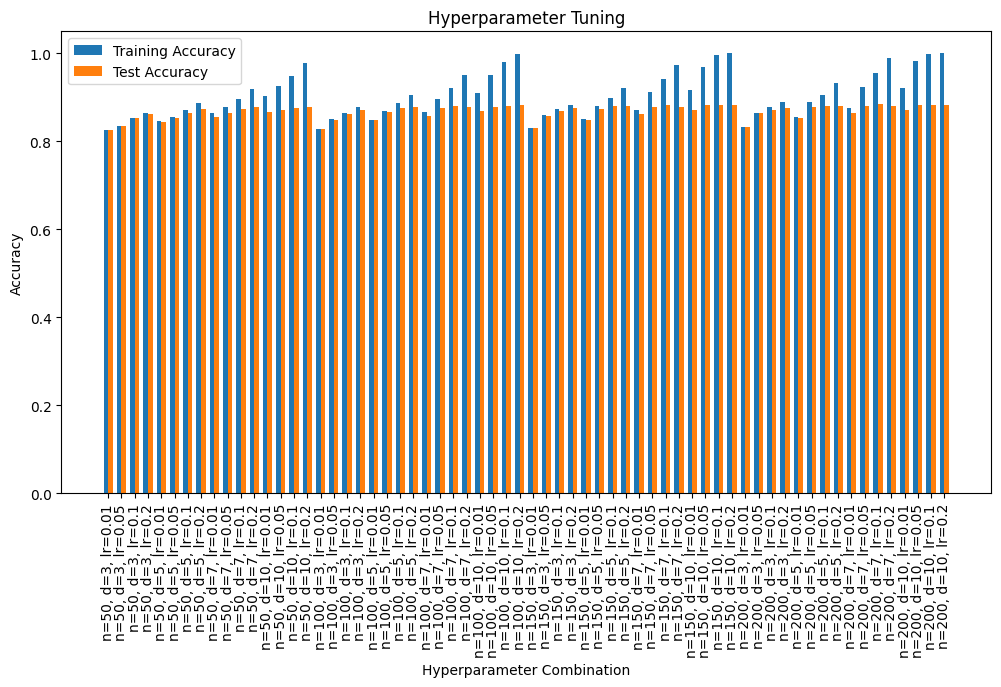

In [21]:
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

from sklearn.feature_selection import SelectFromModel

import numpy as np

from sklearn.metrics import accuracy_score





# Define the hyperparameters to vary

param_grid = {

    'n_estimators': [50, 100, 150, 200],

    'max_depth': [3, 5, 7, 10],

    'learning_rate': [0.01, 0.05, 0.1, 0.2]

}



# Initialize lists to store the results

train_accuracies = []

test_accuracies = []



# Iterate over the hyperparameter combinations

idx = 0

for n_estimators in param_grid['n_estimators']:

    for max_depth in param_grid['max_depth']:

        for learning_rate in param_grid['learning_rate']:

            # Initialize the XGBoost classifier

            xgb = XGBClassifier(

                n_estimators=n_estimators,

                max_depth=max_depth,

                learning_rate=learning_rate,

                min_child_weight=1,

                gamma=0,

                subsample=0.8,

                colsample_bytree=0.8,

                objective='binary:logistic',

                nthread=4,

                scale_pos_weight=1,

                seed=27,

                use_label_encoder=False

            )



            # Fit the model

            xgb.fit(x_train, y_train)



            # Calculate training accuracy

            y_train_pred = xgb.predict(x_train)

            train_accuracy = accuracy_score(y_train, y_train_pred)



            # Calculate test accuracy

            y_pred = xgb.predict(x_test)

            test_accuracy = accuracy_score(y_test, y_pred)



            # Append the results to the lists

            train_accuracies.append(train_accuracy)

            test_accuracies.append(test_accuracy)



            print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, learning_rate: {learning_rate}")

            print(f"Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")



            idx += 1



# Plot the results

fig, ax = plt.subplots(figsize=(12, 6))



x = np.arange(len(train_accuracies))

width = 0.35



ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy')

ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy')



ax.set_xlabel('Hyperparameter Combination')

ax.set_ylabel('Accuracy')

ax.set_title('Hyperparameter Tuning')

ax.set_xticks(x)

ax.set_xticklabels([f"n={n_estimators}, d={max_depth}, lr={learning_rate}" for n_estimators in param_grid['n_estimators'] for max_depth in param_grid['max_depth'] for learning_rate in param_grid['learning_rate']])

ax.legend()



plt.xticks(rotation=90)

plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6854
           1       0.88      0.89      0.89      7267

    accuracy                           0.88     14121
   macro avg       0.88      0.88      0.88     14121
weighted avg       0.88      0.88      0.88     14121



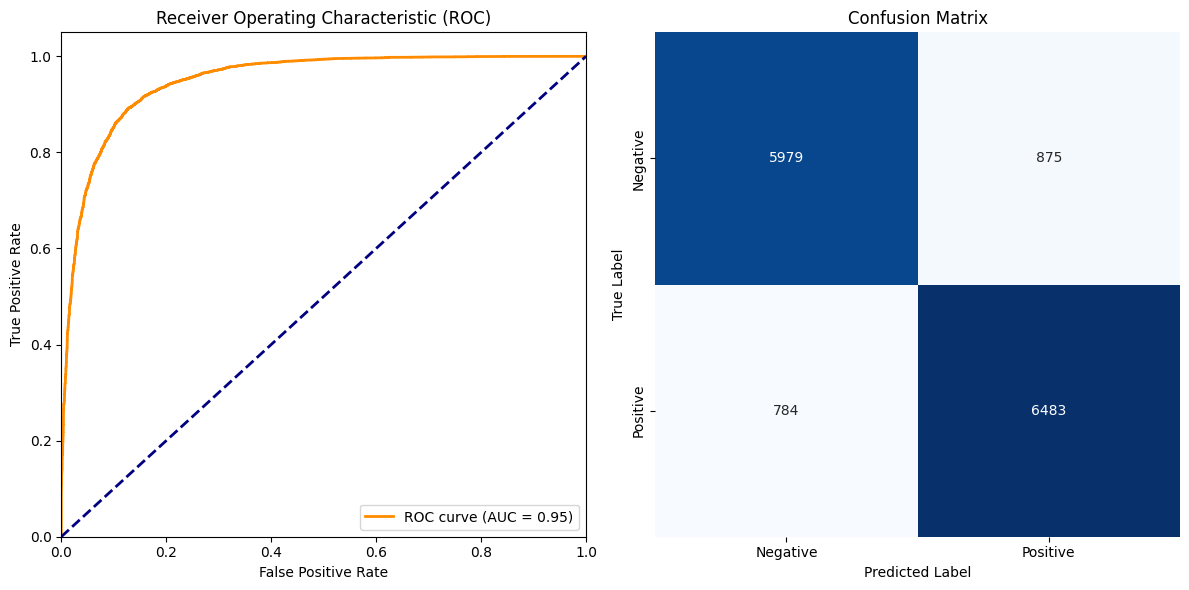


Evaluation Metrics:
Accuracy: 0.8825
Precision: 0.8811
Recall (Sensitivity): 0.8921
F1 Score: 0.8866
AUC: 0.9490

Confusion Matrix:
[[5979  875]
 [ 784 6483]]


In [14]:
# Get predicted probabilities for the positive class



y_prob = xgb_selected.predict_proba(x_test_selected)[:, 1]  # Probability for class 1 (positive class)







# Evaluate the model



metrics = evaluate_model(y_test, y_pred, y_prob)







# Print the calculated metrics



print("\nEvaluation Metrics:")



for metric_name, metric_value in metrics.items():



    if metric_name == "Confusion Matrix":



        print(f"\n{metric_name}:\n{metric_value}")



    else:



        print(f"{metric_name}: {metric_value:.4f}")


### SHAP (SHapley Additive exPlanations) is a popular method for interpreting complex machine learning models, especially tree-based models like XGBoost. <br>



**Calculate SHAP Values**: SHAP values quantify the contribution of each feature to the model's predictions. This calculation relies on game theory principles, particularly Shapley values, where each feature is seen as a "player" contributing to the final "payoff" (the model’s prediction). By considering all possible combinations of features, SHAP values assign an importance score to each feature for every prediction, explaining the influence of each feature on the model's output. <br>



**Summary Plot**: The summary plot shows the distribution of SHAP values for each feature, providing a broad view of feature importance and impact:<br>



Each dot represents a SHAP value for a specific sample.<br>

The color indicates the value of the feature (e.g., higher values might be colored red, while lower values are blue). This visualization helps in identifying which features have the strongest effect on the model's predictions and whether this effect is positive or negative.<br>

Bar Plot of Mean Absolute SHAP Values: The bar plot displays the average absolute SHAP values for each feature, giving a clear ranking of feature importance. It highlights the most impactful features by averaging the absolute effect of each feature across all predictions, simplifying complex relationships into a digestible form.<br>



**Dependence Plots for Top Features**: Dependence plots illustrate the relationship between a feature’s values and its SHAP values. This provides insight into how a feature's value (e.g., high or low) influences the prediction in specific cases. By examining the top three features, this plot gives an intuitive understanding of their effects on predictions, including any interactions with other features.<br>



**Force Plot for the First Prediction**: The force plot is a more detailed, single-sample visualization that demonstrates how each feature’s SHAP value either pushes the prediction higher or lower. It shows the baseline (expected value) and how each feature contributes to the specific outcome of the first test sample, offering a localized interpretation of that prediction.<br>



**Decision Plot for Multiple Predictions**: The decision plot shows the path of model decisions for several samples, depicting how cumulative feature effects lead to the final prediction for each instance. It’s especially useful for observing trends in how features contribute to decisions across multiple samples, capturing common patterns or anomalies. <br>


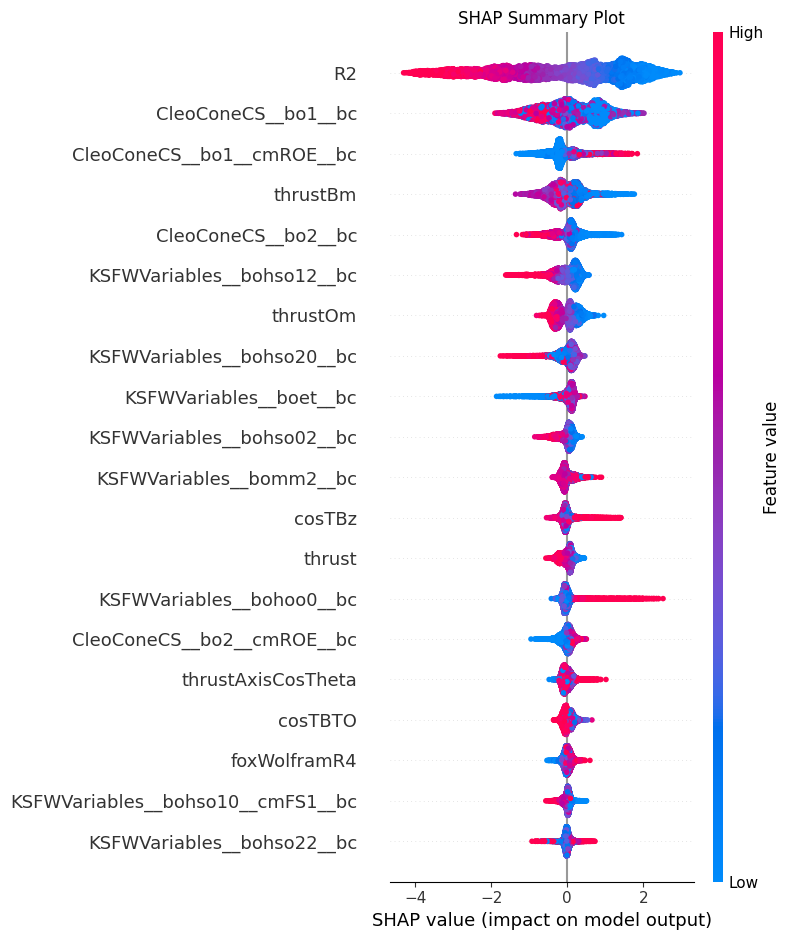

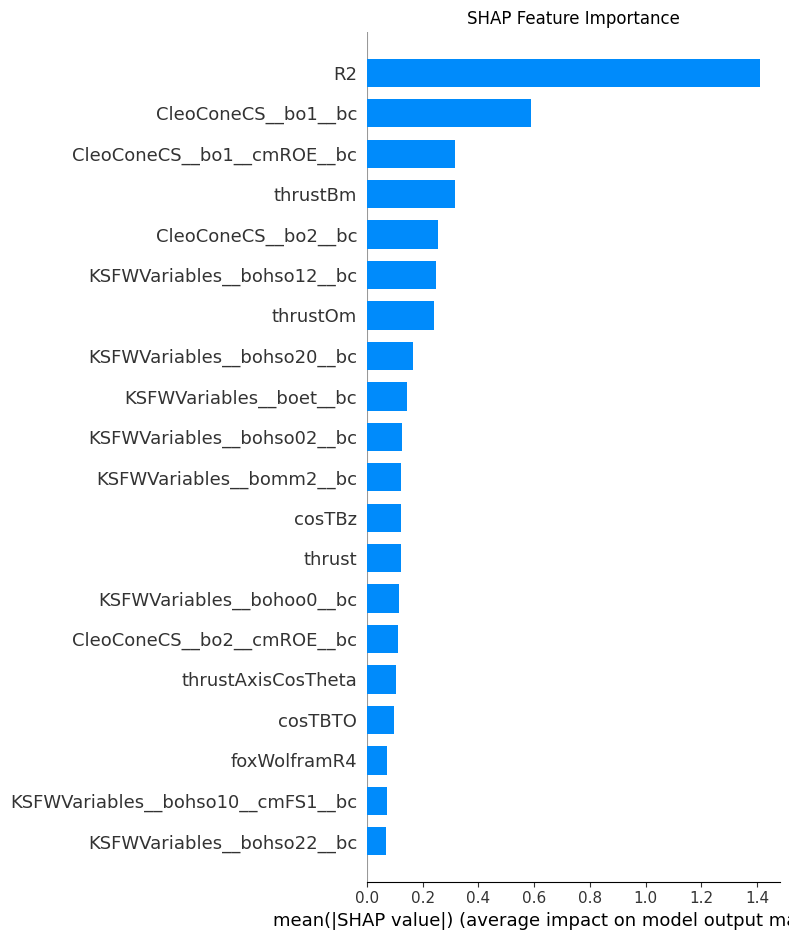

<Figure size 1000x600 with 0 Axes>

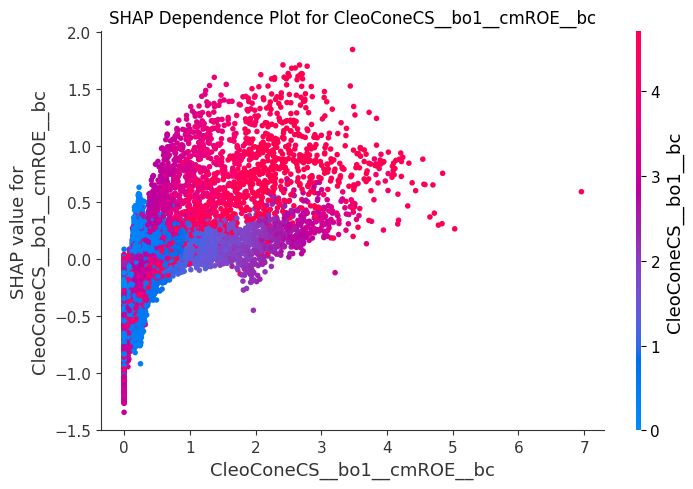

<Figure size 1000x600 with 0 Axes>

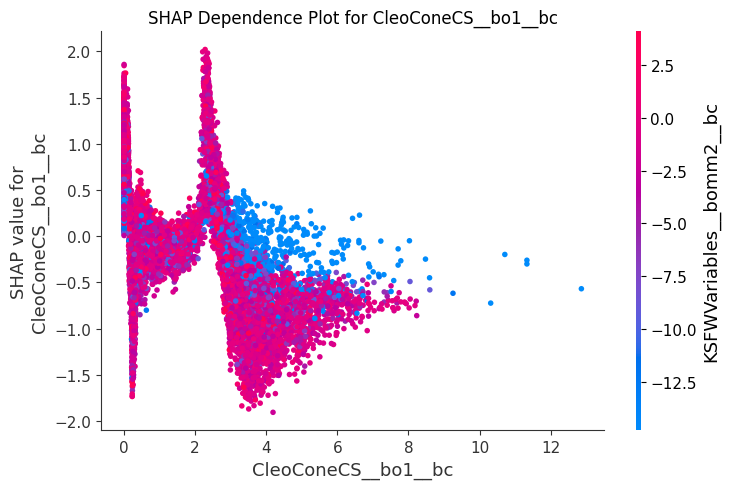

<Figure size 1000x600 with 0 Axes>

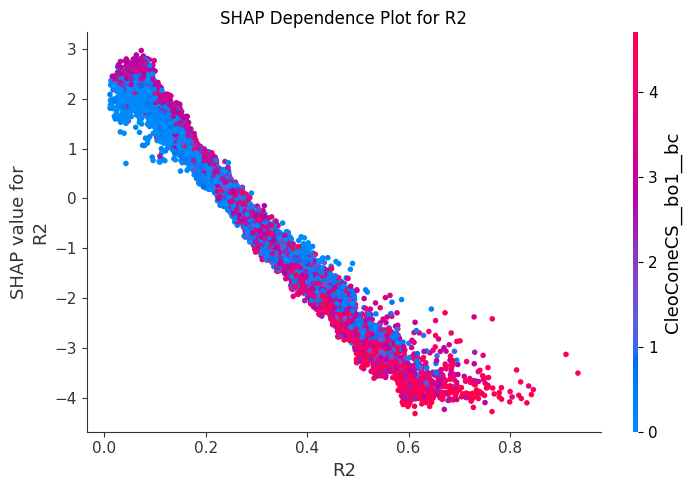

<Figure size 2000x300 with 0 Axes>

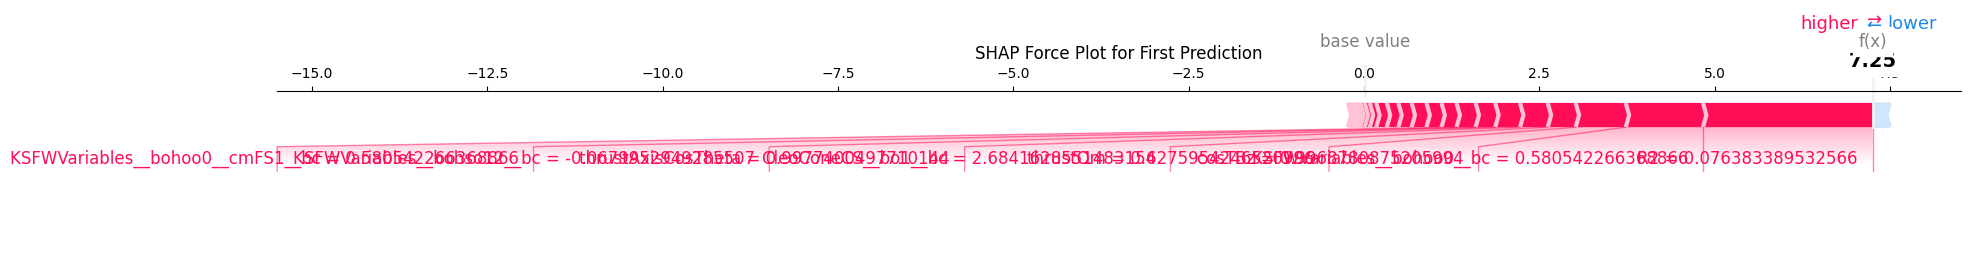

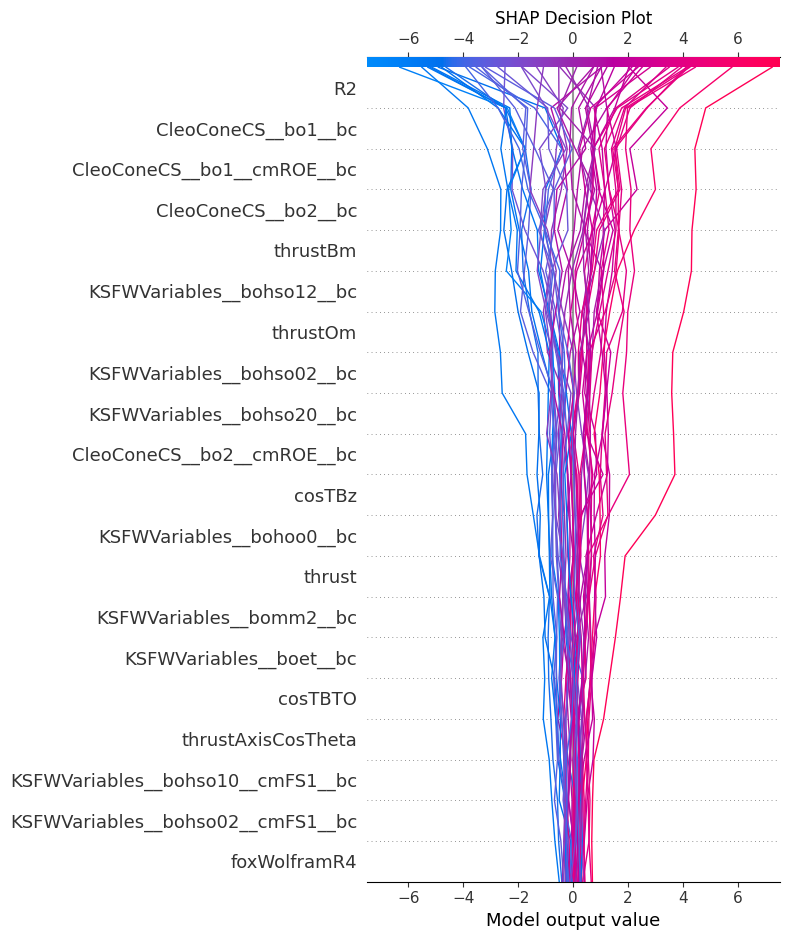


Top 5 Most Important Features (by mean |SHAP value|):
CleoConeCS__bo2__bc: 0.2567
thrustBm: 0.3154
CleoConeCS__bo1__cmROE__bc: 0.3179
CleoConeCS__bo1__bc: 0.5872
R2: 1.4115


In [22]:
import shap



import matplotlib.pyplot as plt







# Calculate SHAP values



explainer = shap.TreeExplainer(xgb_selected)



shap_values = explainer.shap_values(x_test_selected)







# Convert feature_names to list if it's not already



feature_names = list(feature_names)







# 1. Summary Plot



plt.figure(figsize=(10, 8))



shap.summary_plot(shap_values, x_test_selected, feature_names=feature_names, show=False)



plt.title('SHAP Summary Plot')



plt.tight_layout()



plt.show()







# 2. Bar Plot of mean absolute SHAP values



plt.figure(figsize=(10, 6))



shap.summary_plot(shap_values, x_test_selected, feature_names=feature_names, plot_type='bar', show=False)



plt.title('SHAP Feature Importance')



plt.tight_layout()



plt.show()







# 3. Dependence plots for top 3 features



top_features_idx = np.argsort(np.abs(shap_values).mean(0))[-3:]



top_features = [feature_names[i] for i in top_features_idx]



for feature in top_features:



    plt.figure(figsize=(10, 6))



    shap.dependence_plot(feature, shap_values, x_test_selected, feature_names=feature_names, show=False)



    plt.title(f'SHAP Dependence Plot for {feature}')



    plt.tight_layout()



    plt.show()







# 4. Force Plot for first prediction



plt.figure(figsize=(20, 3))



shap.force_plot(explainer.expected_value,



                shap_values[0],



                x_test_selected[0],



                feature_names=feature_names,



                matplotlib=True,



                show=False)



plt.title('SHAP Force Plot for First Prediction')



plt.tight_layout()



plt.show()







# 5. Decision Plot for first few predictions



plt.figure(figsize=(10, 8))



shap.decision_plot(explainer.expected_value,



                  shap_values[:50],



                  x_test_selected[:50],



                  feature_names=feature_names,



                  show=False)



plt.title('SHAP Decision Plot')



plt.tight_layout()



plt.show()







# Print numerical insights



print("\nTop 5 Most Important Features (by mean |SHAP value|):")



feature_importance = np.abs(shap_values).mean(0)



sorted_idx = np.argsort(feature_importance)



for idx in sorted_idx[-5:]:



    print(f"{feature_names[idx]}: {feature_importance[idx]:.4f}")







# Save SHAP values and feature names



np.save('shap_values.npy', shap_values)



np.save('feature_names.npy', np.array(feature_names))

### So the XgBoost use some 100 estimators (decision trees). To see how these decision trees look like see below analysis. We are plotting 10 trees at a time due to memory reasons.

See what is/are the conditional statement defining a single leaf in the tree.

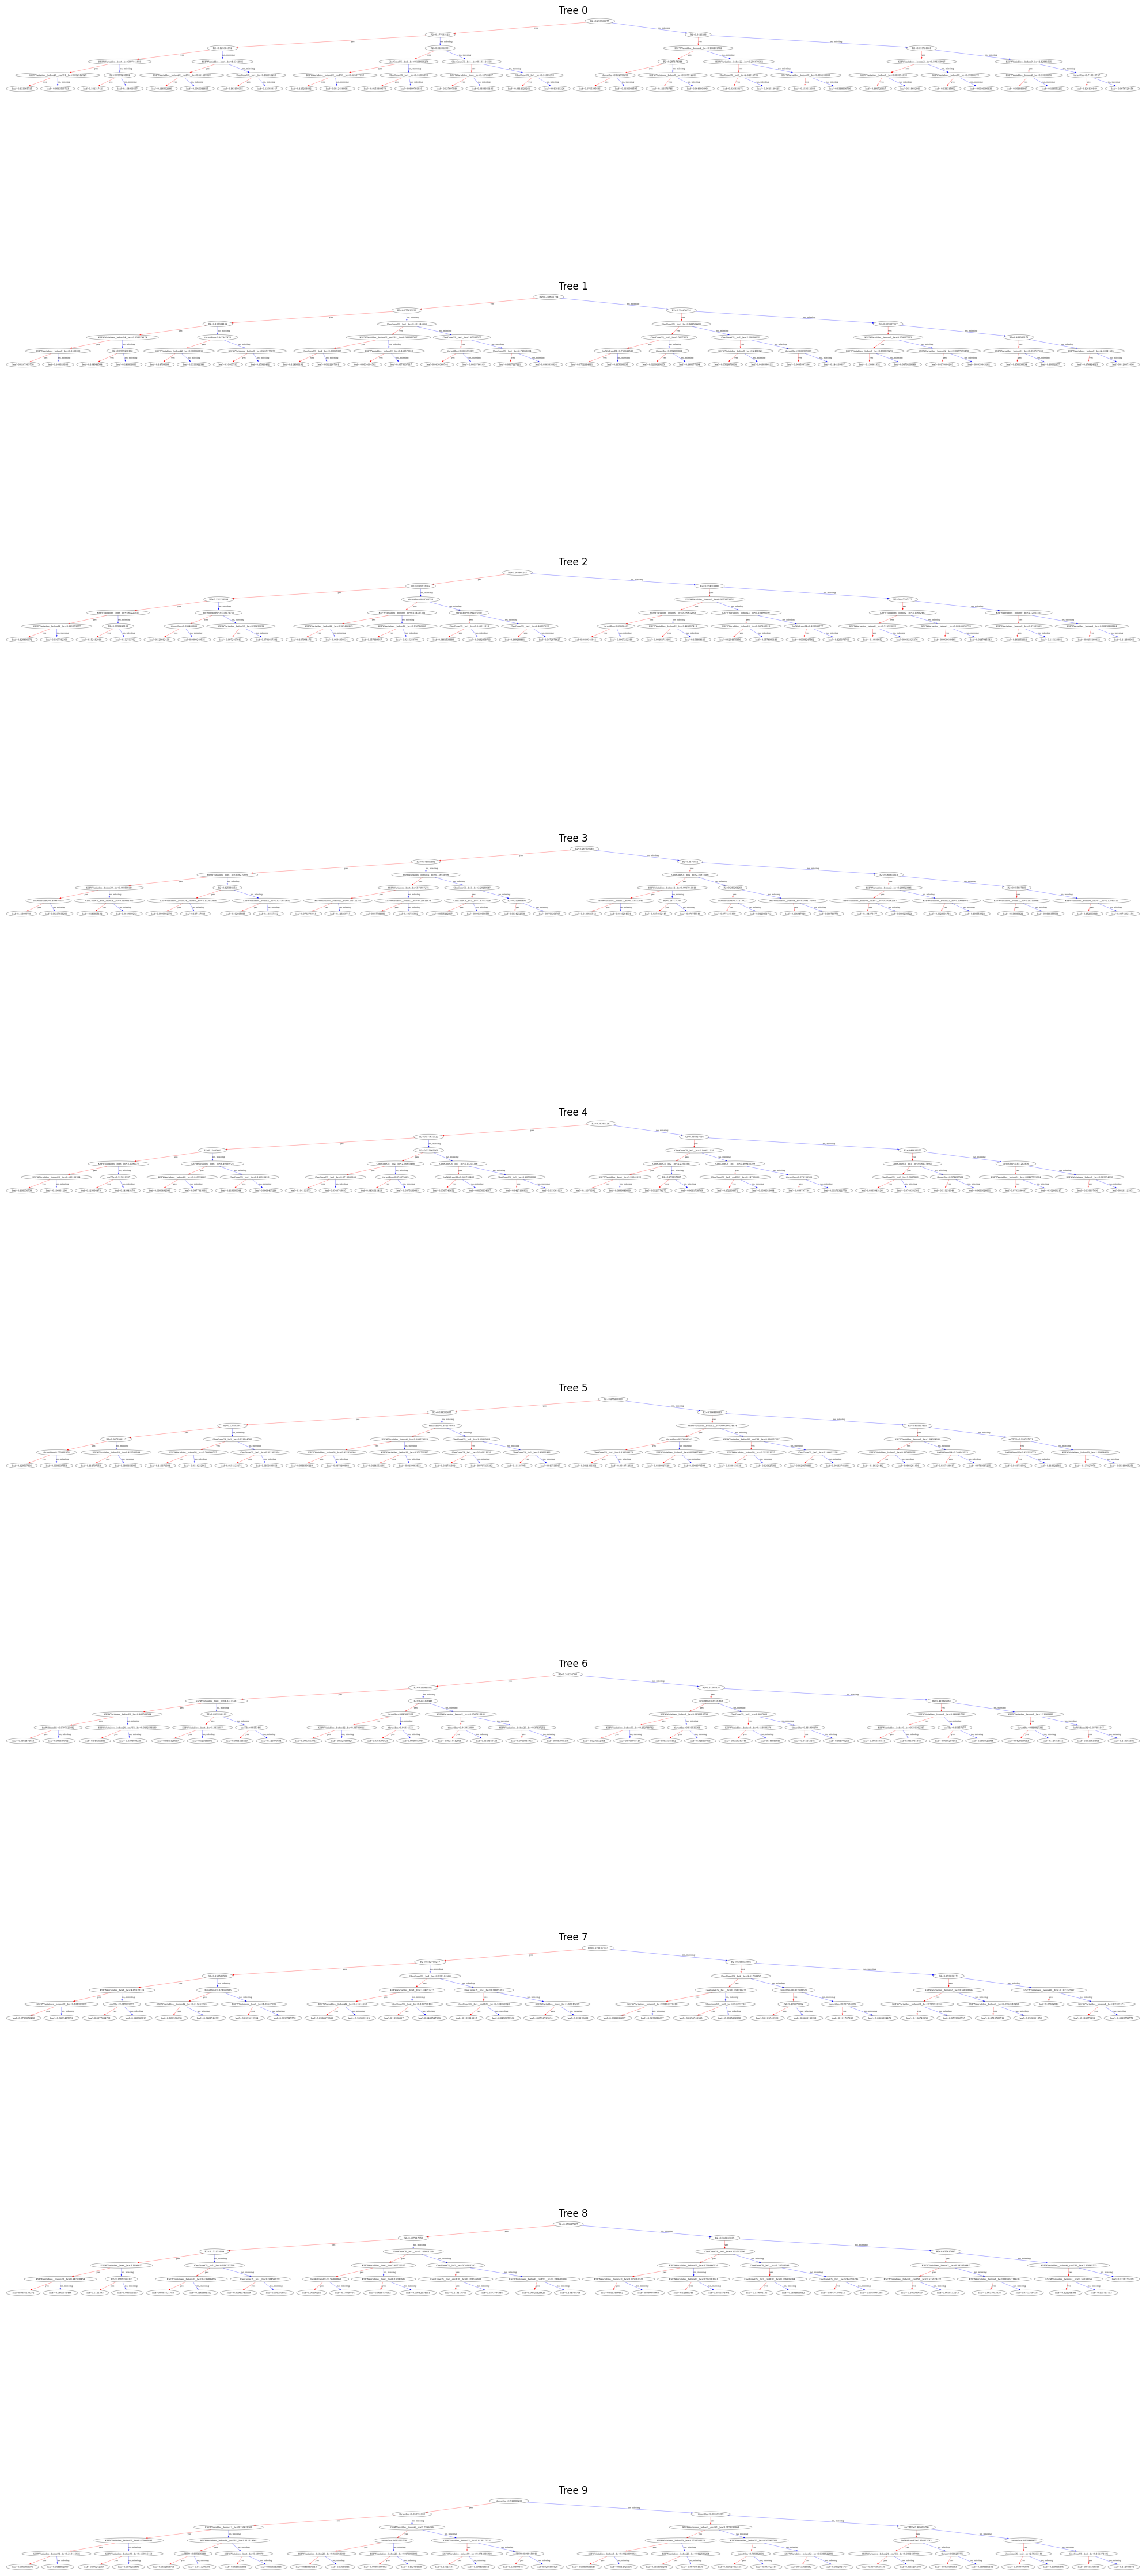

In [32]:
# Import required visualization library

from xgboost import plot_tree

import matplotlib.pyplot as plt



# Initialize the XGBoost classifier with max_depth=5

xgb = XGBClassifier(

    n_estimators=100,

    max_depth=5,

    learning_rate=0.1,

    min_child_weight=1,

    gamma=0,

    subsample=0.8,

    colsample_bytree=0.8,

    objective='binary:logistic',

    nthread=4,

    scale_pos_weight=1,

    seed=27,

    use_label_encoder=False

)



# Fit the model

xgb.fit(x_train, y_train)



# Create subplot grid for 10 trees (10 rows, 1 columns)

fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(20, 50))

axes = axes.flatten()



# Plot 10 trees with a maximum depth of 5

for i, tree_id in enumerate(range(10)):

    plot_tree(xgb, num_trees=tree_id, max_depth=5, ax=axes[i])

    axes[i].set_title(f'Tree {tree_id}')



plt.tight_layout()

plt.show()

## K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a simple, non-parametric machine learning algorithm used for classification and regression tasks. It works by finding the k closest training examples to a new data point and predicting the most common class (in classification) or averaging the values (in regression) of these neighbors. The key hyperparameter in KNN is k, the number of neighbors to consider for making a prediction. Choosing an optimal k is important for balancing bias and variance.

* Plot 1: K vs Accuracy:

A plot shows how the accuracy changes with different values of k for both training and test datasets.

* Plot 2: Confusion Matrix:

A confusion matrix is plotted to show the number of true positives, true negatives, false positives, and false negatives.

* Plot 3: PCA Visualization:

Principal Component Analysis (PCA) is performed to reduce the data to two dimensions for easy visualization.

* Plot 4: Feature Importance:

The absolute correlation of each feature with the target variable is calculated.

A bar chart is plotted to visualize which features are most important for predicting the target class, helping identify which variables are most influential in the KNN model’s decision-making.

* Plot 5: Distribution of Predictions:

A histogram comparing the actual and predicted class distributions on the test set is plotted.

*  Plot 6: Computation Time Analysis:

The time taken to train the KNN model for each value of k is plotted to evaluate the computational efficiency of the algorithm. As k increases, the computation time typically increases due to more neighbors being considered.

Calculating accuracies for different k values...


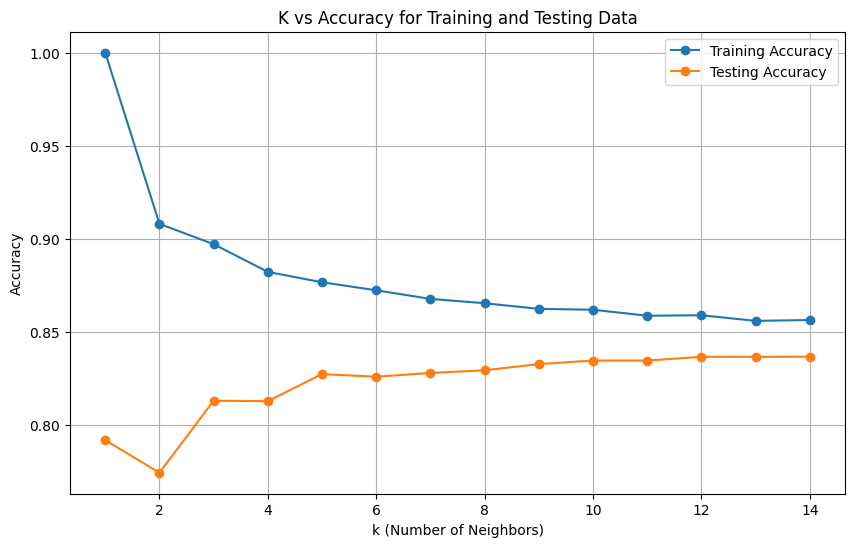

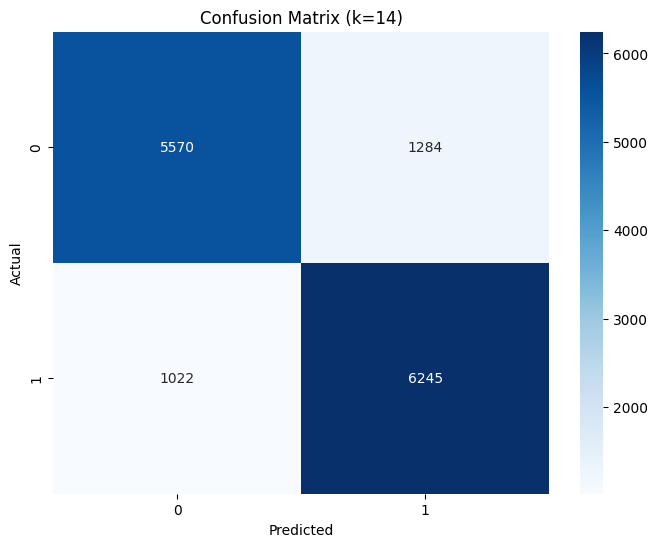

Performing PCA visualization...


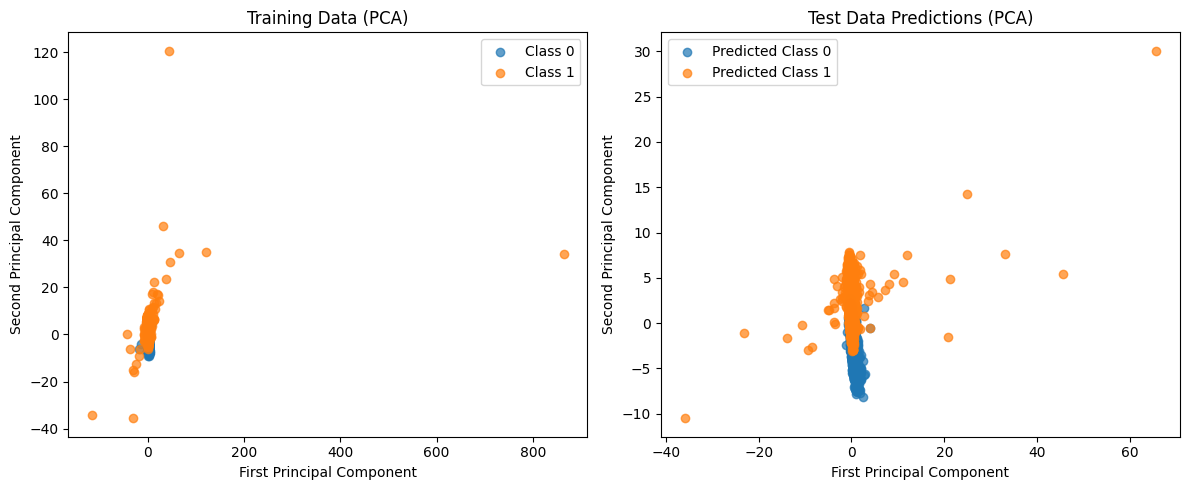

Calculating feature importance...


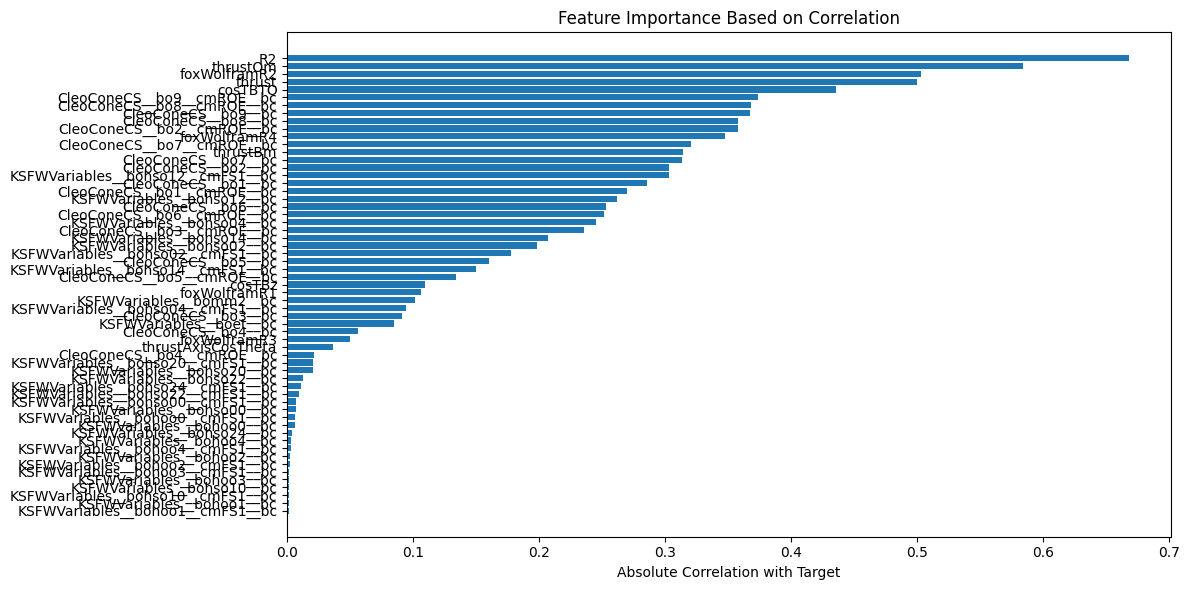

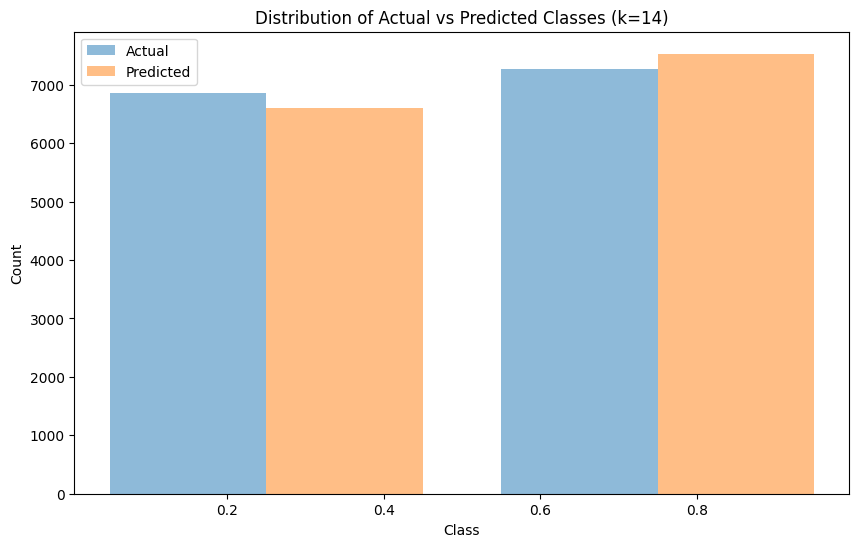

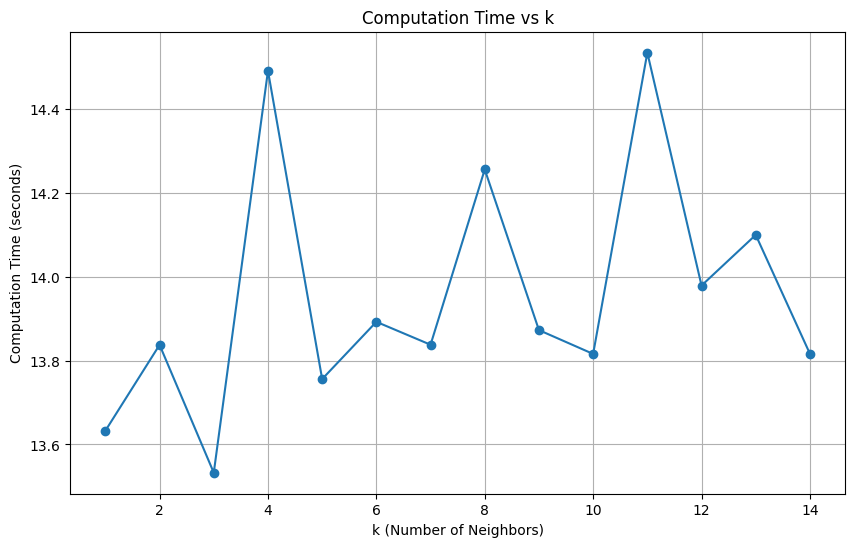


Performance Summary:
Best k value: 14
Best test accuracy: 0.8367
Average computation time per k: 13.9536 seconds

Class Distribution Summary:
                Metric  Count
0        Total samples  14121
1     Class 0 (Actual)   6854
2     Class 1 (Actual)   7267
3  Class 0 (Predicted)   6592
4  Class 1 (Predicted)   7529


In [37]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.decomposition import PCA

import time



# Assuming 'data' is your DataFrame

x = data.iloc[:, :-1].values  # Features

y = data.iloc[:, -1].values   # Target



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)



# Plot 1: K vs Accuracy (Train and Test)

print("Calculating accuracies for different k values...")

k_values = list(range(1, 15))

train_accuracy = []

test_accuracy = []

computation_times = []



for k in k_values:

    start_time = time.time()

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train_scaled, y_train)



    train_pred = knn.predict(X_train_scaled)

    test_pred = knn.predict(X_test_scaled)



    train_accuracy.append(accuracy_score(y_train, train_pred))

    test_accuracy.append(accuracy_score(y_test, test_pred))



    computation_times.append(time.time() - start_time)



plt.figure(figsize=(10, 6))

plt.plot(k_values, train_accuracy, 'o-', label='Training Accuracy')

plt.plot(k_values, test_accuracy, 'o-', label='Testing Accuracy')

plt.xlabel('k (Number of Neighbors)')

plt.ylabel('Accuracy')

plt.title('K vs Accuracy for Training and Testing Data')

plt.legend()

plt.grid(True)

plt.show()



# Find best k and get predictions

best_k = k_values[np.argmax(test_accuracy)]

best_knn = KNeighborsClassifier(n_neighbors=best_k)

best_knn.fit(X_train_scaled, y_train)

best_predictions = best_knn.predict(X_test_scaled)



# Plot 2: Confusion Matrix

plt.figure(figsize=(8, 6))

cm = confusion_matrix(y_test, best_predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title(f'Confusion Matrix (k={best_k})')

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.show()



# Plot 3: PCA visualization

print("Performing PCA visualization...")

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)



plt.figure(figsize=(12, 5))

# Training data

plt.subplot(1, 2, 1)

for i in range(2):

    mask = y_train == i

    plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1],

               label=f'Class {i}', alpha=0.7)

plt.title('Training Data (PCA)')

plt.xlabel('First Principal Component')

plt.ylabel('Second Principal Component')

plt.legend()



# Test predictions

plt.subplot(1, 2, 2)

for i in range(2):

    mask = best_predictions == i

    plt.scatter(X_test_pca[mask, 0], X_test_pca[mask, 1],

               label=f'Predicted Class {i}', alpha=0.7)

plt.title('Test Data Predictions (PCA)')

plt.xlabel('First Principal Component')

plt.ylabel('Second Principal Component')

plt.legend()

plt.tight_layout()

plt.show()



# Plot 4: Feature Importance

print("Calculating feature importance...")

feature_names = data.columns[:-1]

correlations = [abs(np.corrcoef(data[feature_name], y)[0, 1]) for feature_name in feature_names]



plt.figure(figsize=(12, 6))

importance_df = pd.DataFrame({

    'Feature': feature_names,

    'Importance': correlations

}).sort_values('Importance', ascending=True)



plt.barh(range(len(importance_df)), importance_df['Importance'])

plt.yticks(range(len(importance_df)), importance_df['Feature'])

plt.xlabel('Absolute Correlation with Target')

plt.title('Feature Importance Based on Correlation')

plt.tight_layout()

plt.show()



# Plot 5: Distribution of predictions

plt.figure(figsize=(10, 6))

plt.hist([y_test, best_predictions], label=['Actual', 'Predicted'],

         bins=2, alpha=0.5)

plt.xlabel('Class')

plt.ylabel('Count')

plt.title(f'Distribution of Actual vs Predicted Classes (k={best_k})')

plt.legend()

plt.show()



# Plot 6: Computation Time Analysis

plt.figure(figsize=(10, 6))

plt.plot(k_values, computation_times, 'o-')

plt.xlabel('k (Number of Neighbors)')

plt.ylabel('Computation Time (seconds)')

plt.title('Computation Time vs k')

plt.grid(True)

plt.show()



# Print summary statistics

print(f"\nPerformance Summary:")

print(f"Best k value: {best_k}")

print(f"Best test accuracy: {max(test_accuracy):.4f}")

print(f"Average computation time per k: {np.mean(computation_times):.4f} seconds")



print("\nClass Distribution Summary:")

summary_df = pd.DataFrame({

    'Metric': ['Total samples', 'Class 0 (Actual)', 'Class 1 (Actual)',

              'Class 0 (Predicted)', 'Class 1 (Predicted)'],

    'Count': [len(y_test),

              sum(y_test == 0),

              sum(y_test == 1),

              sum(best_predictions == 0),

              sum(best_predictions == 1)]

})

print(summary_df)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      6854
           1       0.83      0.86      0.84      7267

    accuracy                           0.84     14121
   macro avg       0.84      0.84      0.84     14121
weighted avg       0.84      0.84      0.84     14121



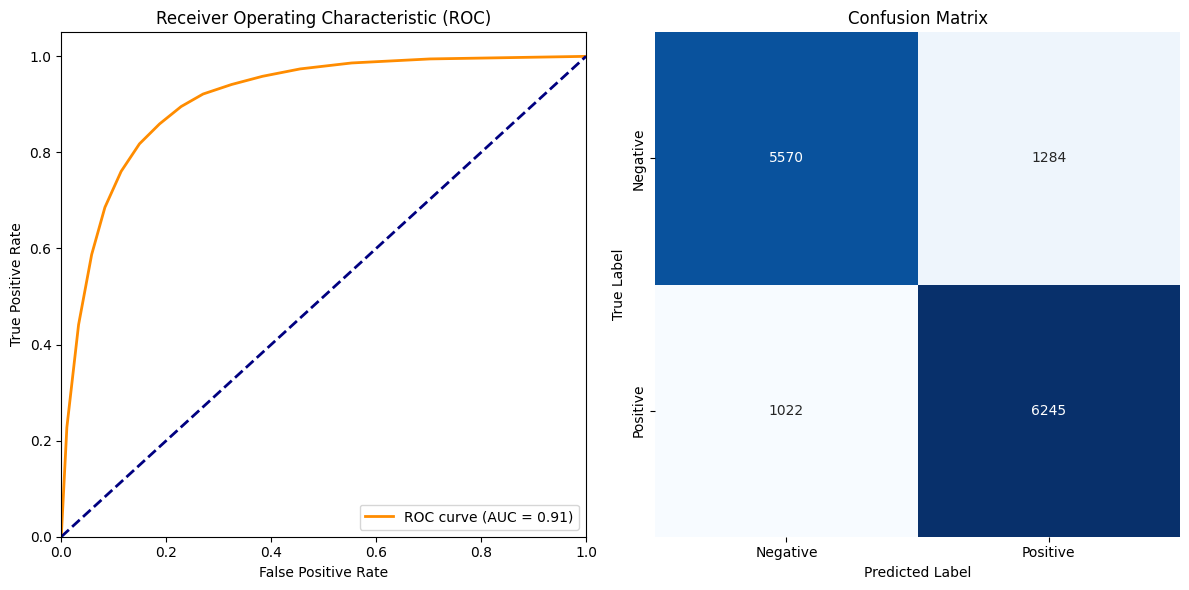


Evaluation Metrics:
Accuracy: 0.8367
Precision: 0.8295
Recall (Sensitivity): 0.8594
F1 Score: 0.8441
AUC: 0.9102

Confusion Matrix:
[[5570 1284]
 [1022 6245]]


In [38]:
# Get the predicted probabilities for the positive class



y_prob = best_knn.predict_proba(X_test_scaled)[:, 1]  # Probability for class 1 (positive class)







# Evaluate the model using the evaluate_model function



metrics = evaluate_model(y_test, best_predictions, y_prob)







# Print the calculated metrics



print("\nEvaluation Metrics:")



for metric_name, metric_value in metrics.items():



    if metric_name == "Confusion Matrix":



        print(f"\n{metric_name}:\n{metric_value}")



    else:



        print(f"{metric_name}: {metric_value:.4f}")


## Voting Classifier

This code implements an ensemble learning technique known as Voting Classifier using three different classifiers—Logistic Regression (LR), Decision Tree (DT), and Support Vector Classifier (SVC)—to classify the dataset. The Voting Classifier combines the predictions of these base classifiers to make a final prediction.

* Three classifiers are defined:

  * Logistic Regression (a linear model for binary classification)

  * Decision Tree (a tree-based model that splits data into decision nodes)

  * Support Vector Classifier (a model that finds the optimal separating hyperplane for classification tasks)

* A VotingClassifier is created, which combines the three base classifiers. It uses a soft voting mechanism, where each classifier predicts class probabilities, and the class with the highest average probability is chosen as the final prediction.

* Training the Model: The Voting Classifier is trained using the training data (x_train, y_train).

* Accuracy Calculation: The training accuracy is calculated by comparing the predicted labels on the training set with the actual labels.

The testing accuracy is calculated by comparing the predicted labels on the test set with the actual labels.


In [41]:


from sklearn.ensemble import VotingClassifier



from sklearn.linear_model import LogisticRegression



from sklearn.tree import DecisionTreeClassifier



from sklearn.svm import SVC



from sklearn.metrics import accuracy_score











# Define individual classifiers



clf1 = LogisticRegression()



clf2 = DecisionTreeClassifier()



clf3 = SVC(probability=True)







# Create a VotingClassifier ensemble



voting_clf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)], voting='soft')







# Train the ensemble model



voting_clf.fit(x_train, y_train)







# Calculate training and testing accuracy



train_accuracy = accuracy_score(y_train, voting_clf.predict(x_train)) 



test_accuracy = accuracy_score(y_test, voting_clf.predict(x_test))







print("Training Accuracy:", train_accuracy)



print("Testing Accuracy:", test_accuracy)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Training Accuracy: 0.9625557680050988
Testing Accuracy: 0.8287656681538135


## Decision Tree Classifier:



The DecisionTreeClassifier is a machine learning model used for classification tasks. It works by recursively splitting the data based on feature values to create branches that ultimately lead to predicted class labels. Each decision node in the tree represents a feature (or condition) that divides the data, and each leaf node represents a predicted class label.

* Hyperparameters:

  * max_depth: This limits the depth of the tree, meaning the tree will stop splitting further after max_depth number of nodes. This helps in preventing overfitting, especially when the data is complex.


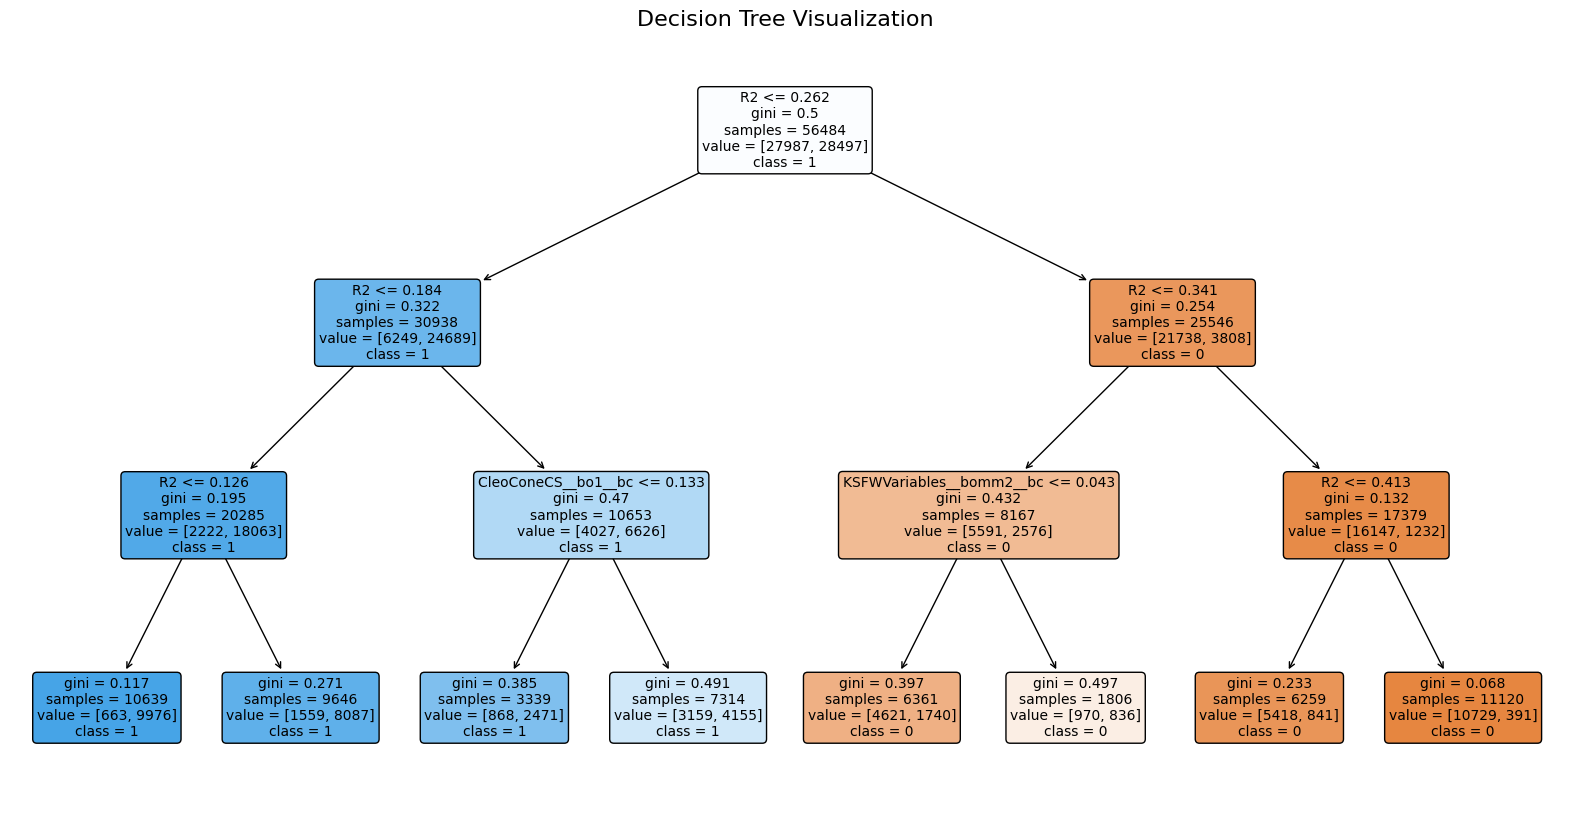

Training accuracy: 0.822
Testing accuracy: 0.823


X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names


In [42]:
import pandas as pd



from sklearn.tree import DecisionTreeClassifier, plot_tree



import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split













# Create and train the decision tree



dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)



dt_classifier.fit(X_train, y_train)







# Create figure with a larger size



plt.figure(figsize=(20,10))







# Plot the decision tree



plot_tree(dt_classifier,



          feature_names=feature_labels,



          class_names=['0', '1'],



          filled=True,



          rounded=True,



          fontsize=10)







# Add a title



plt.title("Decision Tree Visualization", fontsize=16)







# Show the plot



plt.show()







# Print the accuracy score



train_score = dt_classifier.score(x_train, y_train)



test_score = dt_classifier.score(x_test, y_test)



print(f"Training accuracy: {train_score:.3f}")

 

print(f"Testing accuracy: {test_score:.3f}")

 ## Decision Tree with PCA (reduced to 2 components):<br>
A Decision Tree with PCA (reduced to 2 components) refers to a process where Principal Component Analysis (PCA) reduces the data's dimensionality to 2 components, followed by training a Decision Tree classifier on this reduced data.A Decision Tree with PCA (reduced to 2 components) refers to a process where Principal Component Analysis (PCA) reduces the data's dimensionality to 2 components, followed by training a Decision Tree classifier on this reduced data.
* Plot 1 :Decision Boundary Plot.<br>
  This plot visualizes the decision boundaries created by the Decision Tree Classifier on the PCA-reduced data.<br>
* Plot 2 :Classification Report and Confusion Matrix<br>
  These outputs accompany the plots, offering details on precision, recall and F1-score for each class.<br>
* Plot 3 : PCA Component Importance Plot<br>
  This is a bar plot showing the importance of each principal component (PC1 and PC2) in the decision tree model’s decision-making process.<br>
* Plot 4 :Feature Contribution to PCA Components Plot<br>
  This plot is crucial for interpreting the principal components in terms of the original features, showing which features are most strongly associated with the reduced dimensions and hence may be most impactful in separating the classes in the PCA space.<br>  

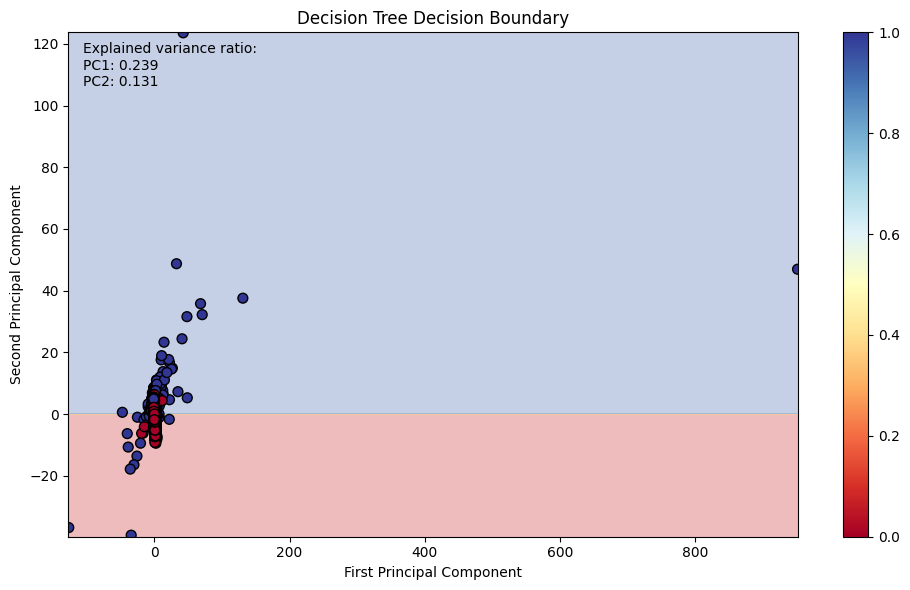


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81     34841
           1       0.80      0.84      0.82     35764

    accuracy                           0.82     70605
   macro avg       0.82      0.82      0.82     70605
weighted avg       0.82      0.82      0.82     70605


Confusion Matrix:
[[27508  7333]
 [ 5692 30072]]


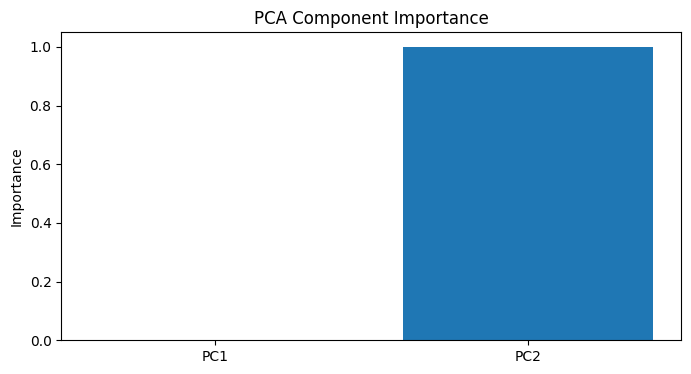

<Figure size 1000x2000 with 0 Axes>

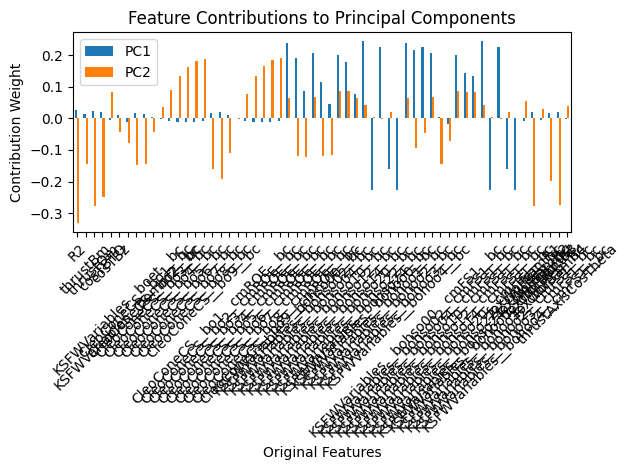

In [46]:
import numpy as np



import pandas as pd



import matplotlib.pyplot as plt



from sklearn.tree import DecisionTreeClassifier



from sklearn.preprocessing import StandardScaler



from sklearn.decomposition import PCA







# Standardize the features



scaler = StandardScaler()



X_scaled = scaler.fit_transform(x)







# Use PCA to reduce to 2 dimensions



pca = PCA(n_components=2)



X_pca = pca.fit_transform(X_scaled)







# Train the decision tree



dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)



dt_classifier.fit(X_pca, y)







# Modified mesh grid function with coarser grid



def make_meshgrid(x, y, h=0.5):



    x_min, x_max = x.min() - 0.5, x.max() + 0.5



    y_min, y_max = y.min() - 0.5, y.max() + 0.5



    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),



                         np.arange(y_min, y_max, h))



    return xx, yy







# Modified plotting function



def plot_decision_boundary(X, y, model, title="Decision Tree Decision Boundary"):



    X0, X1 = X[:, 0], X[:, 1]







    xx, yy = make_meshgrid(X0, X1)







    # Process the mesh grid in batches



    batch_size = 10000



    mesh_points = np.c_[xx.ravel(), yy.ravel()]



    n_points = mesh_points.shape[0]



    Z = np.zeros(n_points)







    for i in range(0, n_points, batch_size):



        batch = mesh_points[i:i+batch_size]



        Z[i:i+batch_size] = model.predict(batch)







    Z = Z.reshape(xx.shape)







    # Create plot



    plt.figure(figsize=(10, 6))







    # Plot decision boundary



    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)







    # Plot data points - corrected edgecolors parameter



    scatter = plt.scatter(X0, X1, c=y, cmap=plt.cm.RdYlBu,



                         edgecolors='black', s=50)







    plt.colorbar(scatter)



    plt.xlabel('First Principal Component')



    plt.ylabel('Second Principal Component')



    plt.title(title)







    # Add explained variance ratio



    var_ratio = pca.explained_variance_ratio_



    plt.text(0.02, 0.98,



             f'Explained variance ratio:\nPC1: {var_ratio[0]:.3f}\nPC2: {var_ratio[1]:.3f}',



             transform=plt.gca().transAxes,



             verticalalignment='top')







    plt.tight_layout()



    plt.show()







# Plot the decision boundary



plot_decision_boundary(X_pca, y, dt_classifier)







# Print performance metrics



from sklearn.metrics import classification_report, confusion_matrix







y_pred = dt_classifier.predict(X_pca)







print("\nClassification Report:")



print(classification_report(y, y_pred))







print("\nConfusion Matrix:")



print(confusion_matrix(y, y_pred))







# Plot feature importance for PCA components



plt.figure(figsize=(8, 4))



importances = pd.DataFrame({



    'feature': ['PC1', 'PC2'],



    'importance': dt_classifier.feature_importances_



})



plt.bar(importances['feature'], importances['importance'])



plt.title('PCA Component Importance')



plt.ylabel('Importance')



plt.show()







# Visualize PCA components contribution



pca_components = pd.DataFrame(



    pca.components_.T,



    columns=['PC1', 'PC2'],



    index=feature_labels



)







plt.figure(figsize=(10, 20))



pca_components.plot(kind='bar')



plt.title('Feature Contributions to Principal Components')



plt.xlabel('Original Features')



plt.ylabel('Contribution Weight')



plt.xticks(rotation=45)



plt.tight_layout()



plt.show()

## Analyzing a dataset using Principal Component Analysis (PCA) combined with a Decision Tree Classifier<br>
A Decision Tree Classifier is trained on the three principal components, with a depth limit of three to control complexity and prevent overfitting.Several plots and metrics are produced to analyze the explained variance, feature contributions to components, model performance, and relationships between PCA components.<br>
* Plot 1 : Variance by Principal Components <br>
This plot is essential for understanding how much of the original data’s variability is captured by each component and helps to assess if the reduced dimensions are sufficient for the analysis.<br>
* Plot 2 : Feature Contributions to Principal Components (Heatmap)<br>
This visualization helps interpret the principal components in terms of the original features, providing insights into which features drive the variance in each principal component<br>
* Plot 3 :Scatter Plot Matrix for the First 3 PCs<br>
Each subplot shows a scatter plot between two PCs, with colors representing different classes, providing a visual way to assess separability among classes in the reduced dimensions<br>
* Plot 4 :PCA Component Importance in Decision Tree (Bar Plot)<br>
It highlights which principal components are most influential for the classifier’s decisions, helping to understand the contributions of PC1, PC2, and PC3 to the model’s predictive power<br>
* Plot 5 :Confusion Matrix (Heatmap)<br>
A heatmap of the confusion matrix shows the number of correct and incorrect predictions made by the classifier for each class<br>
* Plot 6 :Correlation between PCA Components (Heatmap)<br>
The plot helps verify that the PCA components are indeed orthogonal (uncorrelated), as expected. Ideally, each PCA component should show low correlation with others, supporting the effectiveness of PCA in achieving dimensional independence<br>
* Plot 7 :Distribution of PCA Components by Class (Box Plots)<br>
This plot provides insights into the variance and central tendency of each PCA component for each class, making it easier to observe which components help distinguish among classes<br>


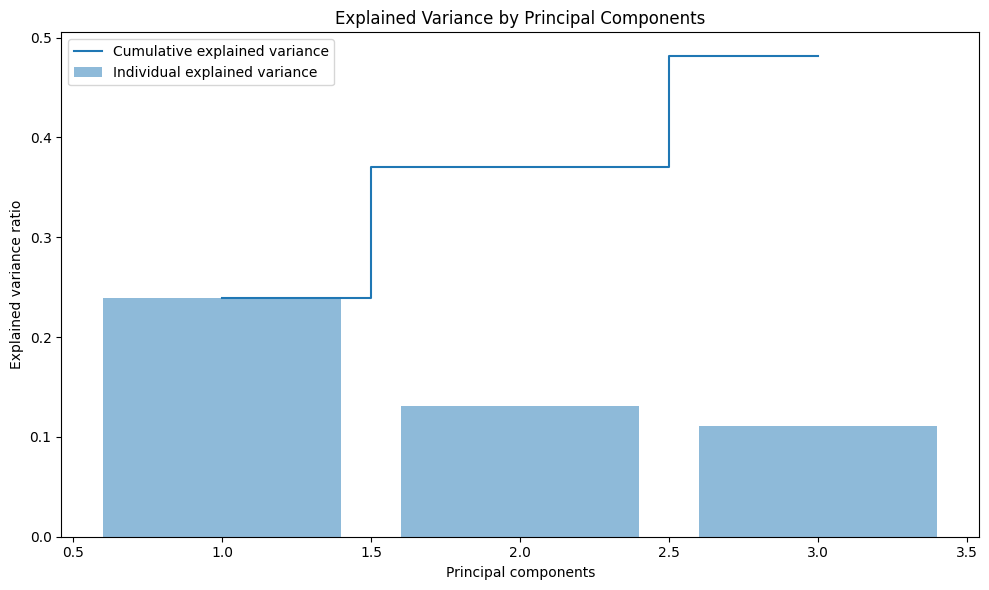


Explained variance ratio for each component:
PC1: 0.239
PC2: 0.131
PC3: 0.111

Total variance explained: 0.481


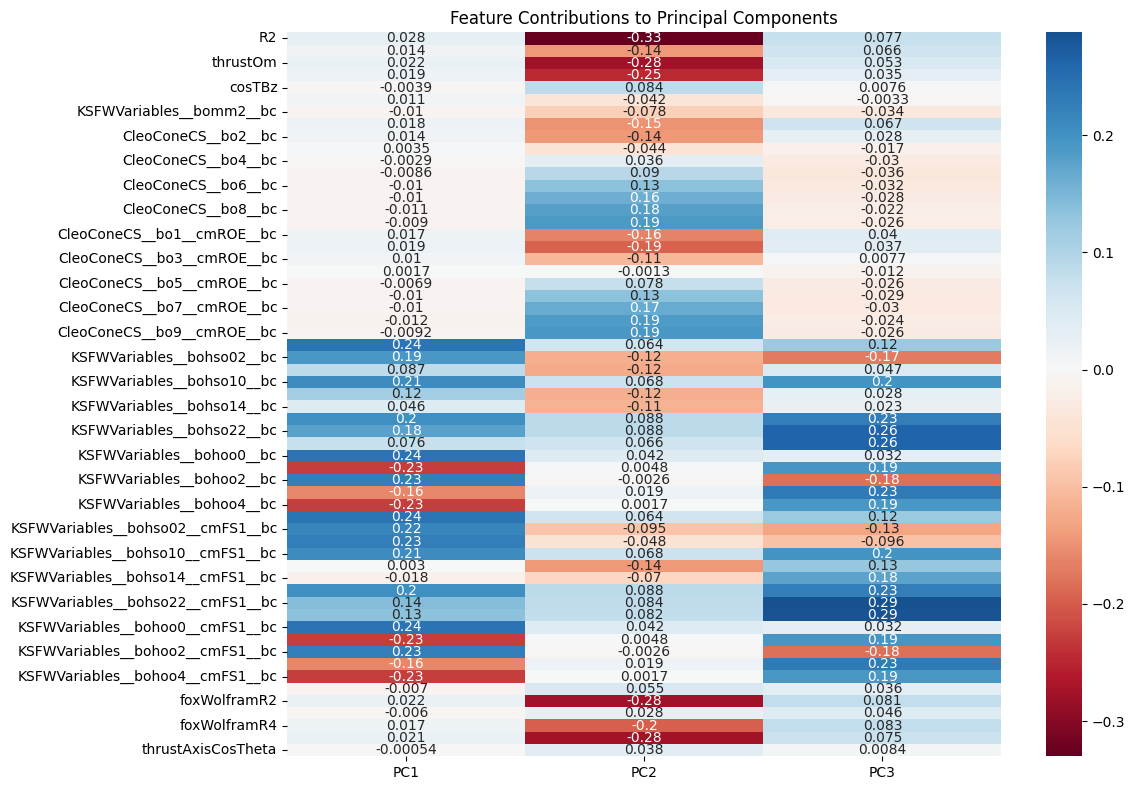

<Figure size 1200x1200 with 0 Axes>

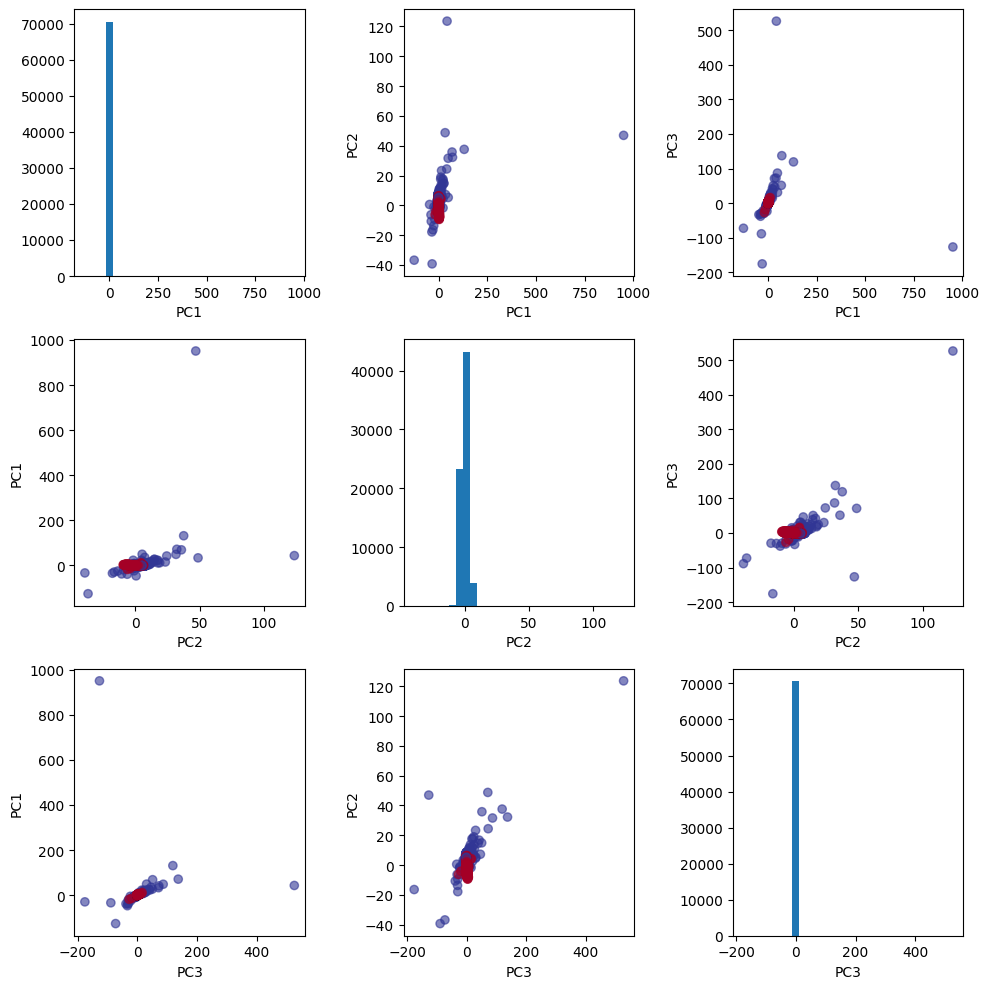

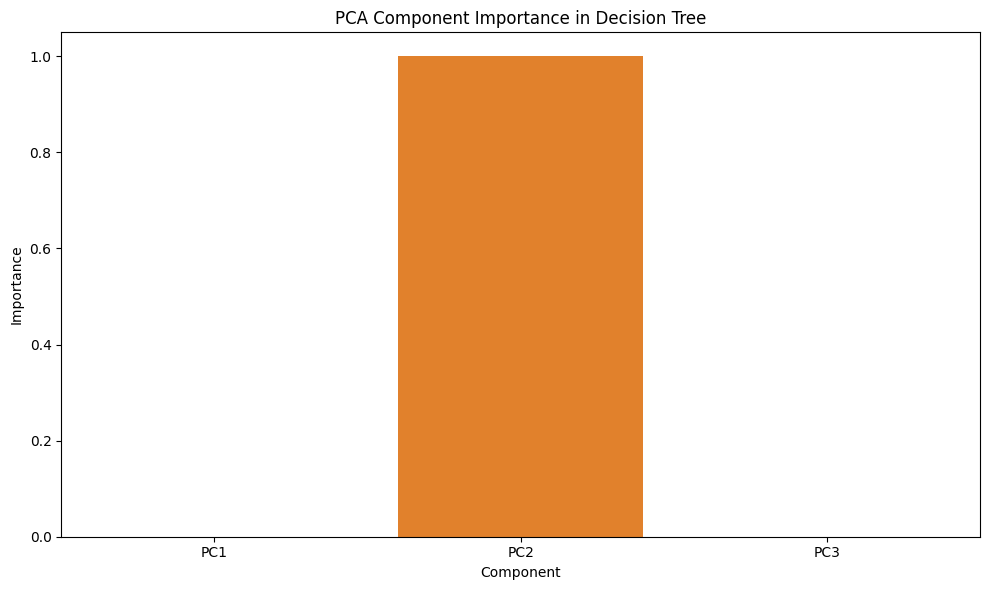


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81     34841
           1       0.80      0.84      0.82     35764

    accuracy                           0.82     70605
   macro avg       0.82      0.82      0.82     70605
weighted avg       0.82      0.82      0.82     70605


Confusion Matrix:


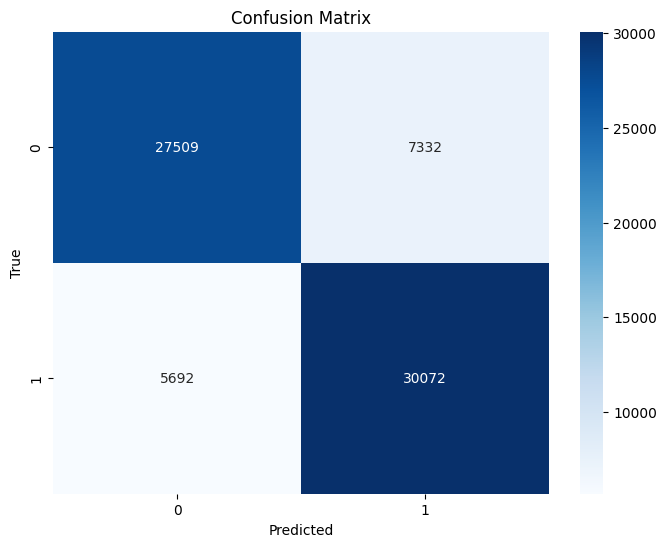

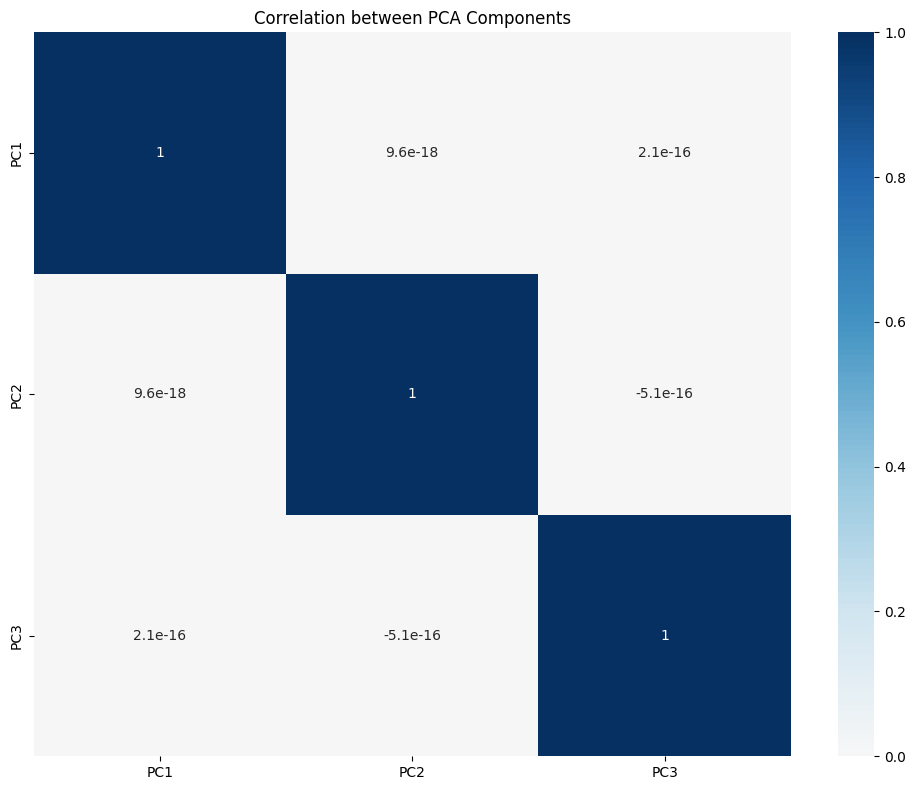

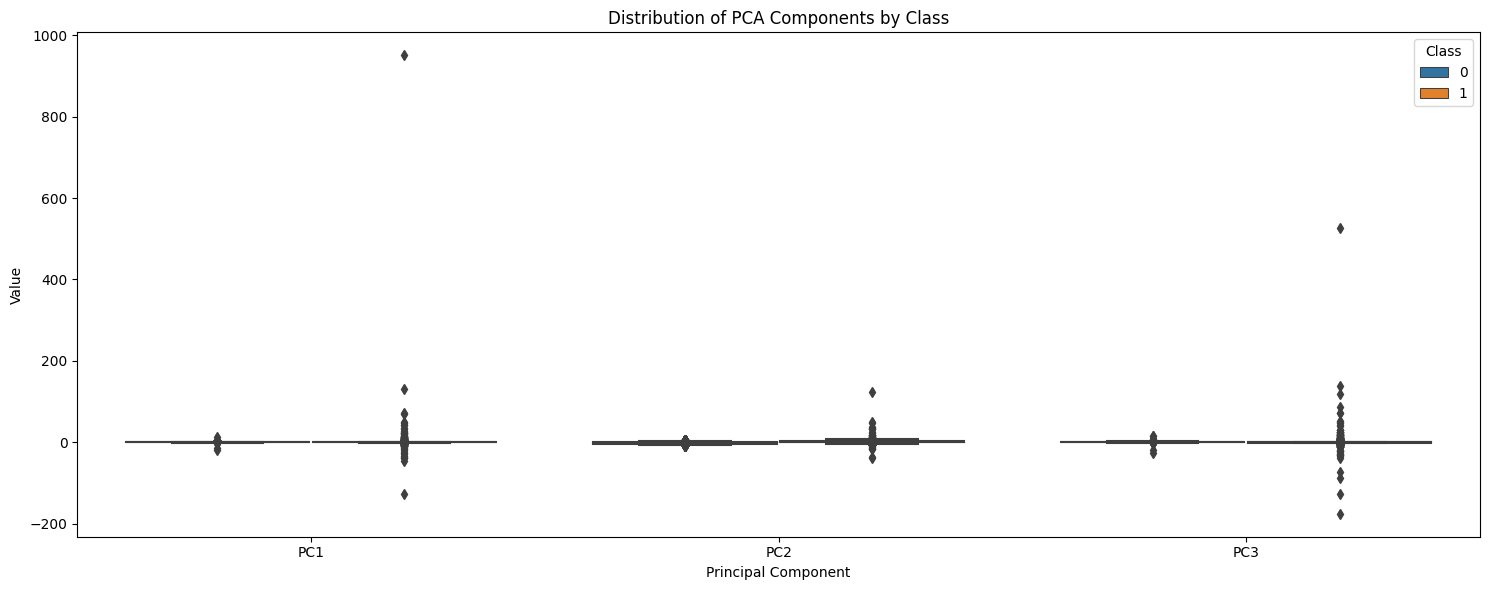


Key Insights:
1. Component Significance:
PC1: 0.000
PC2: 1.000
PC3: 0.000

2. Most important features in top PCs:

Top features for PC1:
KSFWVariables__bohoo0__cmFS1__bc: 0.244
KSFWVariables__bohoo0__bc: 0.244
KSFWVariables__bohso00__cmFS1__bc: 0.240

Top features for PC2:
R2: 0.330
thrustOm: 0.277
foxWolframR2: 0.277

Top features for PC3:
KSFWVariables__bohso22__cmFS1__bc: 0.288
KSFWVariables__bohso24__cmFS1__bc: 0.285
KSFWVariables__bohso22__bc: 0.264


In [47]:
import numpy as np



import pandas as pd



import matplotlib.pyplot as plt



import seaborn as sns



from sklearn.tree import DecisionTreeClassifier



from sklearn.preprocessing import StandardScaler



from sklearn.decomposition import PCA



from sklearn.metrics import classification_report, confusion_matrix







# Standardize the features



scaler = StandardScaler()



X_scaled = scaler.fit_transform(x)







# Use PCA with 5 components



pca = PCA(n_components=3)



X_pca = pca.fit_transform(X_scaled)







# Train the decision tree



dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)



dt_classifier.fit(X_pca, y)







# 1. Plot explained variance ratio



plt.figure(figsize=(10, 6))



explained_variance = pca.explained_variance_ratio_



cumulative_variance = np.cumsum(explained_variance)







plt.bar(range(1, 4), explained_variance, alpha=0.5, label='Individual explained variance')



plt.step(range(1, 4), cumulative_variance, where='mid', label='Cumulative explained variance')



plt.ylabel('Explained variance ratio')



plt.xlabel('Principal components')



plt.title('Explained Variance by Principal Components')



plt.legend()



plt.tight_layout()



plt.show()







print("\nExplained variance ratio for each component:")



for i, var in enumerate(explained_variance, 1):



    print(f"PC{i}: {var:.3f}")



print(f"\nTotal variance explained: {sum(explained_variance):.3f}")







# 2. Feature contributions to PCA components



pca_components = pd.DataFrame(



    pca.components_.T,



    columns=[f'PC{i+1}' for i in range(3)],



    index=feature_labels



)







plt.figure(figsize=(12, 8))



sns.heatmap(pca_components, annot=True, cmap='RdBu', center=0)



plt.title('Feature Contributions to Principal Components')



plt.tight_layout()



plt.show()







# 3. Scatter plot matrix for the first 3 PCs



plt.figure(figsize=(12, 12))



fig = plt.figure(figsize=(10, 10))



for i in range(3):



    for j in range(3):



        plt.subplot(3, 3, i*3 + j + 1)



        if i != j:



            plt.scatter(X_pca[:, i], X_pca[:, j], c=y, cmap='RdYlBu', alpha=0.6)



            plt.xlabel(f'PC{i+1}')



            plt.ylabel(f'PC{j+1}')



        else:



            plt.hist(X_pca[:, i], bins=30)



            plt.xlabel(f'PC{i+1}')



plt.tight_layout()



plt.show()







# 4. PCA Component Importance in Decision Tree



importances = pd.DataFrame({



    'Component': [f'PC{i+1}' for i in range(3)],



    'Importance': dt_classifier.feature_importances_



})







plt.figure(figsize=(10, 6))



sns.barplot(data=importances, x='Component', y='Importance')



plt.title('PCA Component Importance in Decision Tree')



plt.tight_layout()



plt.show()







# 5. Model Performance Metrics



y_pred = dt_classifier.predict(X_pca)







print("\nClassification Report:")



print(classification_report(y, y_pred))







print("\nConfusion Matrix:")



confusion = confusion_matrix(y, y_pred)



plt.figure(figsize=(8, 6))



sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')



plt.title('Confusion Matrix')



plt.xlabel('Predicted')



plt.ylabel('True')



plt.show()







# 6. Correlation between PCA components



pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(3)])



plt.figure(figsize=(10, 8))



sns.heatmap(pca_df.corr(), annot=True, cmap='RdBu', center=0)



plt.title('Correlation between PCA Components')



plt.tight_layout()



plt.show()







# 7. Box plots for each PC by class



plt.figure(figsize=(15, 6))



pca_df['Class'] = y



melted_df = pd.melt(pca_df, id_vars=['Class'], value_vars=[f'PC{i+1}' for i in range(3)])



sns.boxplot(x='variable', y='value', hue='Class', data=melted_df)



plt.title('Distribution of PCA Components by Class')



plt.xlabel('Principal Component')



plt.ylabel('Value')



plt.tight_layout()



plt.show()







# Print additional insights



print("\nKey Insights:")



print("1. Component Significance:")



for i, (comp, imp) in enumerate(zip(importances['Component'], importances['Importance']), 1):



    print(f"{comp}: {imp:.3f}")







print("\n2. Most important features in top PCs:")



for pc in range(3):



    top_features = pca_components[f'PC{pc+1}'].abs().nlargest(3)



    print(f"\nTop features for PC{pc+1}:")



    for feat, val in top_features.items():



        print(f"{feat}: {val:.3f}")

## Logistic Regression with Elastic Net Regularization combines logistic regression—a classification algorithm—and elastic net regularization<br>
 This is a technique that penalizes model complexity to prevent overfitting. Elastic net regularization is a hybrid of two regularization methods: L1 (Lasso) and L2 (Ridge), combining the benefits of both.<br>
 After training, the model is evaluated on both the training and test datasets. Predictions are made for each set, and the accuracy scores for the training and test sets are calculated, providing insights into model performance and potential overfitting.<br>
 * Training and Testing Accuracy:<br>
 The comparison between training and testing accuracy indicates whether the model might be overfitting or underfitting<br>
 * Classification Report:
Precision: The ratio of true positives to the sum of true positives and false positives.<br>
Recall: The ratio of true positives to the sum of true positives and false negatives.<br>
F1-score: The harmonic mean of precision and recall, offering a balanced measure of accuracy.<br>
Support: The number of occurrences of each class in the test set<br>
* Confusion Matrix:
The confusion matrix on the test set provides a breakdown of the actual versus predicted labels.<br>

In [ ]:
import numpy as np



import pandas as pd



from sklearn.model_selection import train_test_split



from sklearn.linear_model import LogisticRegression



from sklearn.metrics import accuracy_score, confusion_matrix, classification_report









# Initialize and train Elastic Net model for binary classification



elastic_net_model = LogisticRegression(



    penalty='elasticnet',



    solver='saga',



    l1_ratio=0.5,  # Elastic Net ratio (0.5 means equal mix of L1 and L2)



    max_iter=10000,



    random_state=42



)



elastic_net_model.fit(X_train, y_train)







# Predictions and accuracy calculations



y_train_pred = elastic_net_model.predict(X_train)



y_test_pred = elastic_net_model.predict(X_test)







# Calculate and print accuracies



train_accuracy = accuracy_score(y_train, y_train_pred)



test_accuracy = accuracy_score(y_test, y_test_pred)







print(f"Training Accuracy: {train_accuracy:.4f}")



print(f"Testing Accuracy: {test_accuracy:.4f}")







# Optional: Print additional metrics



print("\nClassification Report (Test Set):")



print(classification_report(y_test, y_test_pred))







print("\nConfusion Matrix (Test Set):")



print(confusion_matrix(y_test, y_test_pred))

In [ ]:
# Predict labels and probabilities



y_test_pred = elastic_net_model.predict(X_test)



y_test_prob = elastic_net_model.predict_proba(X_test)[:, 1]  # Probability for the positive class







# Evaluate the model using the function



print("\nEvaluation Metrics for Elastic Net Logistic Regression Model:")



metrics = evaluate_model(y_test, y_test_pred, y_test_prob)







# Print the detailed metrics



for metric_name, metric_value in metrics.items():



    if metric_name == "Confusion Matrix":



        print(f"\n{metric_name}:\n{metric_value}")



    else:



        print(f"{metric_name}: {metric_value:.4f}")


## Support Vector Machine:<br>
Support Vector Machine (SVM) is a supervised machine learning algorithm primarily used for classification and regression tasks, but it’s especially popular for classification. SVM is particularly known for its effectiveness in high-dimensional spaces, where it finds a hyperplane that best separates different classes in a dataset.<br>
* Hyperplane:
In SVM, a hyperplane is the decision boundary that separates different classes in the feature space. For a two-dimensional space, this boundary is a line; for a three-dimensional space, it’s a plane; and for higher dimensions, it's called a hyperplane.The goal of SVM is to find the hyperplane that maximizes the margin between two classes<br>
* Margin:
The margin is the distance between the hyperplane and the closest data points from each class, known as support vectors.A maximum-margin classifier is used in SVM, where the algorithm maximizes this margin to improve classification performance. A wider margin generally indicates a more confident classification.<br>
* Kernel:
SVM is often used with the kernel trick, allowing it to handle non-linearly separable data.<br>
Kernels transform the original feature space into a higher-dimensional space where a linear separation is possible. Common kernel types include linear, polynomial, Gaussian Radial Basis Function (RBF)<br>

### Support Vector Machine (SVM) models using various kernel types on a dataset that has been reduced to two principal components (PCs) through Principal Component Analysis (PCA).<br>
This algorithm primarily used for classification.SVM is particularly known for its effectiveness in high-dimensional spaces, where it finds a hyperplane that best separates different classes in a dataset.
A maximum-margin classifier is used in SVM, where the algorithm maximizes this margin to improve classification performance. A wider margin generally indicates a more confident classification.
SVM is often used with the kernel trick, allowing it to handle non-linearly separable data.Kernels transform the original feature space into a higher-dimensional space where a linear separation is possible. Common kernel types include linear, polynomial, Gaussian Radial Basis Function (RBF), and sigmoid.<br>
* Plot 1 : SVM Decision Boundary Plots (by Kernel)<br>
The plot includes a contour map representing the decision boundaries, color-coded regions indicating the model’s class predictions, and support vectors highlighted as circles with black edges.Labels for the x-axis (First Principal Component) and y-axis (Second Principal Component) help interpret the decision boundaries within the context of the PCA-transformed features.<br>
* Plot 2 :Model Performance Comparison Plot<br>
This plot is helpful for evaluating model performance across different kernels and understanding each model’s complexity through support vector counts.<br>
* Plot 3 :Classification Report (Text Output).<br>
For each kernel, a classification report is printed, displaying precision, recall, F1-score, and support for each class. This report provides detailed metrics for evaluating the predictive accuracy and class-wise performance of each model.<br>
* Plot 4 :Combined Decision Region Plot (3-Kernel Comparison)<br>
This plot provides a side-by-side comparison of decision boundaries for the three kernels within a single figure, each displayed in a separate subplot.<br>

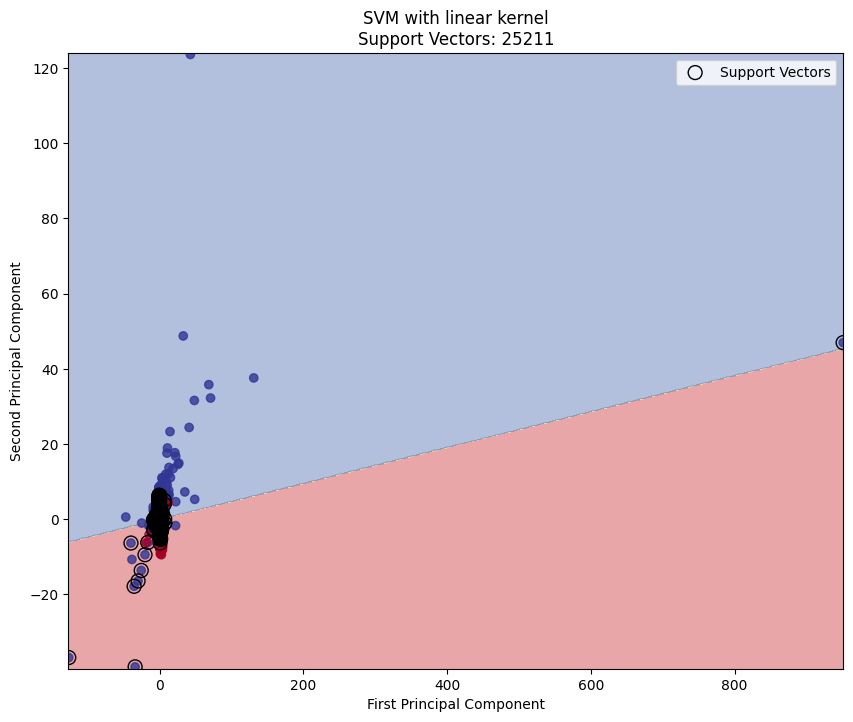

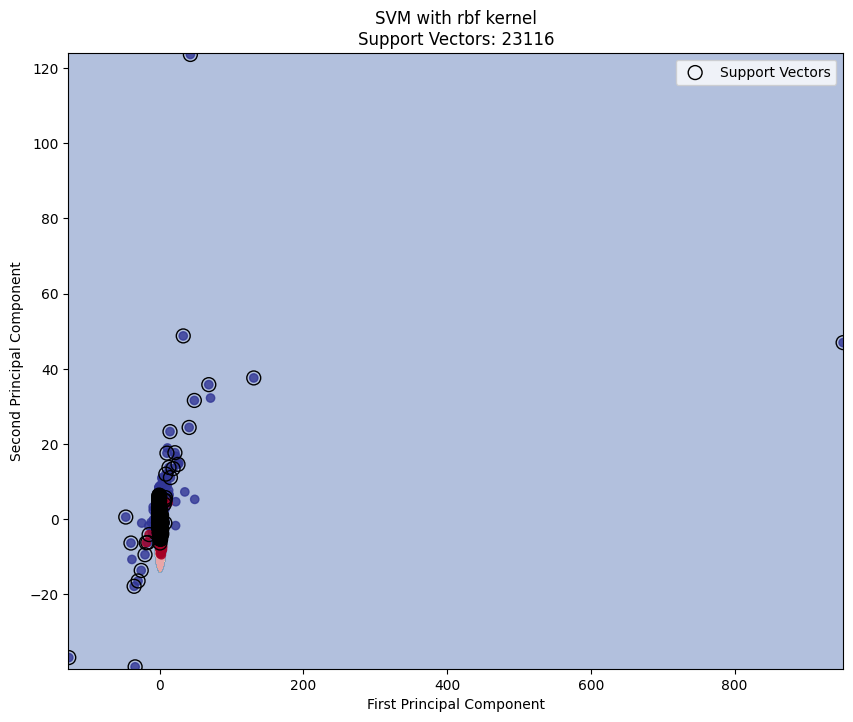

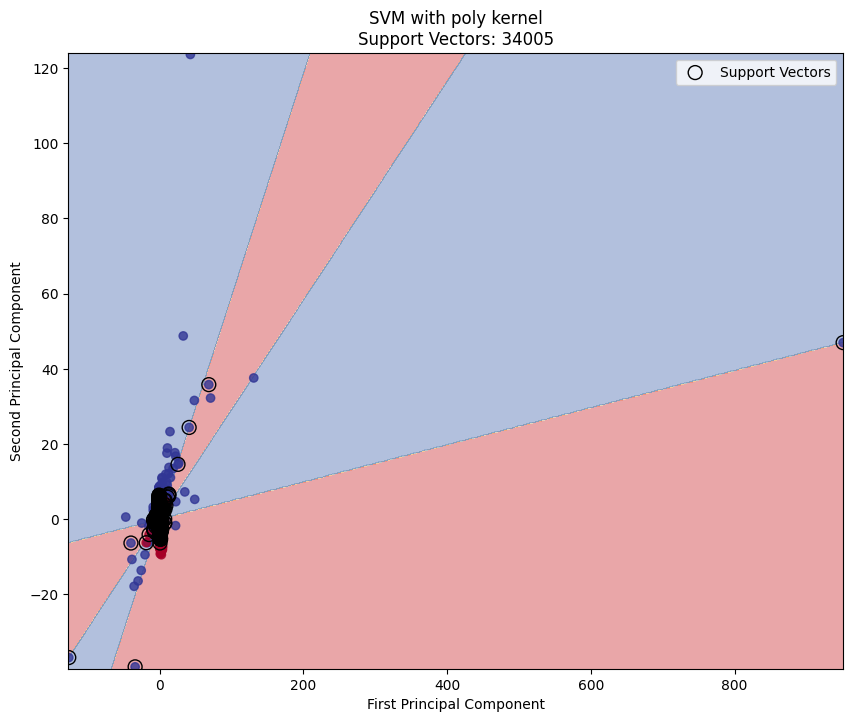

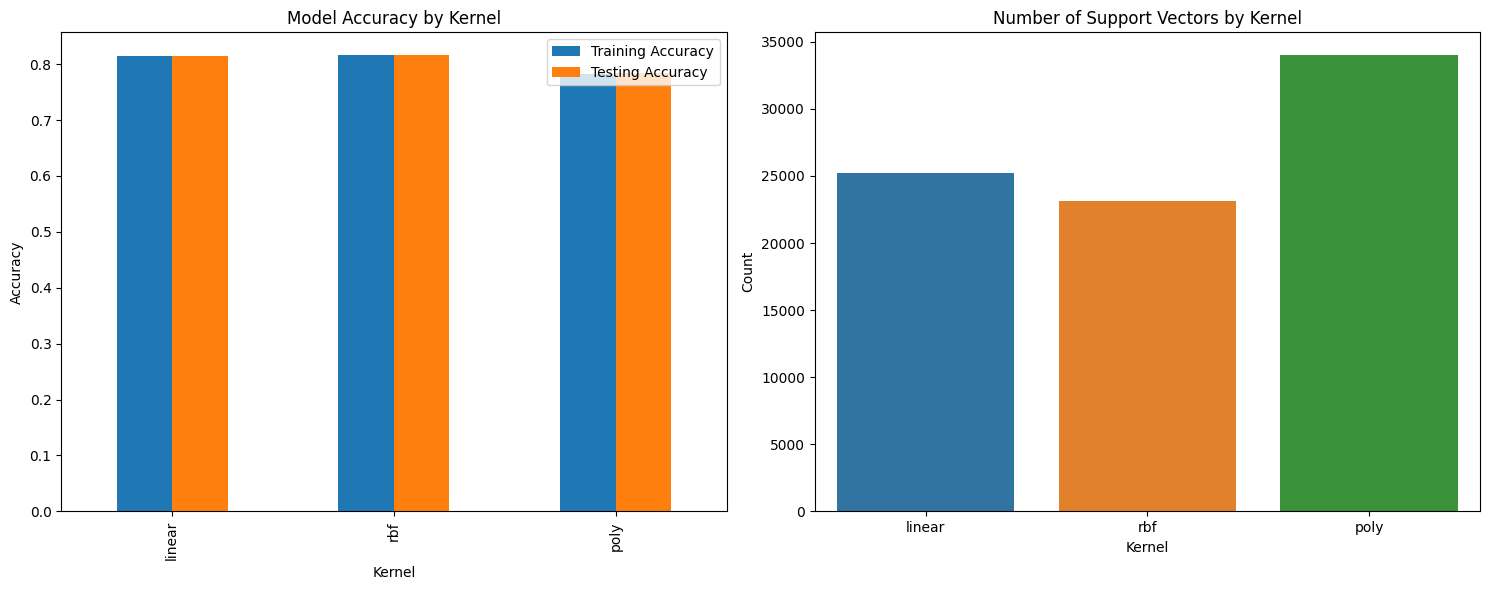


Detailed Performance Metrics:

Kernel: linear
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      6854
           1       0.82      0.83      0.82      7267

    accuracy                           0.81     14121
   macro avg       0.81      0.81      0.81     14121
weighted avg       0.81      0.81      0.81     14121


Kernel: rbf
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      6854
           1       0.81      0.84      0.82      7267

    accuracy                           0.82     14121
   macro avg       0.82      0.82      0.82     14121
weighted avg       0.82      0.82      0.82     14121


Kernel: poly
              precision    recall  f1-score   support

           0       0.90      0.63      0.74      6854
           1       0.73      0.93      0.82      7267

    accuracy                           0.78     14121
   macro avg       0.81      0.78      0.78     14121


In [ ]:
# SVC COMBINED
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns



# Preprocess data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train SVM with different kernels
kernels = ['linear', 'rbf', 'poly']
svm_models = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    svm_models[kernel] = svm

# Modified visualization function with memory optimization
def plot_svm_decision_boundary(X, y, model, title="SVM Decision Boundary"):
    # Create a coarser mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Increase step size to reduce memory usage
    step_size = 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                         np.arange(y_min, y_max, step_size))

    # Process the mesh grid in batches
    batch_size = 1000
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    n_points = mesh_points.shape[0]
    Z = np.zeros(n_points)

    # Predict in batches
    for i in range(0, n_points, batch_size):
        batch = mesh_points[i:min(i + batch_size, n_points)]
        Z[i:i + batch_size] = model.predict(batch)

    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', alpha=0.8)

    # Plot support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k',
               label='Support Vectors')

    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(f'SVM with {title} kernel\nSupport Vectors: {len(model.support_vectors_)}')
    plt.legend()
    plt.show()

# Plot for each kernel
for kernel, model in svm_models.items():
    plot_svm_decision_boundary(X_pca, y, model, kernel)

# Performance visualization
def plot_performance_comparison(models):
    # Prepare data
    results = []
    for kernel, model in models.items():
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        support_vectors = len(model.support_vectors_)
        results.append({
            'Kernel': kernel,
            'Training Accuracy': train_score,
            'Testing Accuracy': test_score,
            'Support Vectors': support_vectors
        })

    results_df = pd.DataFrame(results)

    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Accuracy comparison
    results_df.plot(x='Kernel', y=['Training Accuracy', 'Testing Accuracy'],
                   kind='bar', ax=ax1)
    ax1.set_title('Model Accuracy by Kernel')
    ax1.set_ylabel('Accuracy')

    # Support vectors comparison
    sns.barplot(data=results_df, x='Kernel', y='Support Vectors', ax=ax2)
    ax2.set_title('Number of Support Vectors by Kernel')
    ax2.set_ylabel('Count')

    plt.tight_layout()
    plt.show()

# Plot performance comparison
plot_performance_comparison(svm_models)

# Print detailed performance metrics
from sklearn.metrics import classification_report

print("\nDetailed Performance Metrics:")
for kernel, model in svm_models.items():
    print(f"\nKernel: {kernel}")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

# Plot decision regions for a single important feature pair
def plot_feature_decision_regions(X, y, models, feature_idx=(0, 1)):
    plt.figure(figsize=(15, 5))

    for idx, (kernel, model) in enumerate(models.items(), 1):
        plt.subplot(1, 3, idx)

        # Create mesh grid
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

        # Use a coarser grid
        step_size = 0.2
        xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                            np.arange(y_min, y_max, step_size))

        # Predict in batches
        mesh_points = np.c_[xx.ravel(), yy.ravel()]
        n_points = mesh_points.shape[0]
        batch_size = 1000
        Z = np.zeros(n_points)

        for i in range(0, n_points, batch_size):
            batch = mesh_points[i:min(i + batch_size, n_points)]
            Z[i:i + batch_size] = model.predict(batch)

        Z = Z.reshape(xx.shape)

        # Plot
        plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', alpha=0.8)
        plt.title(f'{kernel} kernel')

    plt.tight_layout()
    plt.show()

# Plot decision regions
plot_feature_decision_regions(X_pca, y, svm_models)

## Linear Discriminant Analysis

Linear Discriminant Analysis (LDA) is a classification technique used in machine learning and statistics to separate classes based on linear combinations of features. The primary aim of LDA is to project the data onto a lower-dimensional space with a linear separation between classes. LDA works by maximizing the distance between class means while minimizing the spread within each class, making it useful for dimensionality reduction as well as classification. It assumes that the different classes share the same covariance matrix.

Code Summary:

1. Initialize and Train LDA Model: The fit function trains the model on x_train (features) and y_train (labels), finding the best linear boundaries for classifying the data.

2. Making Predictions: After training, the code uses predict to classify both the training (**x_train**) and test (x_test) data, resulting in y_train_pred and y_test_pred—the predicted classes.

3. The predict_proba function gives the probability estimates for each class, allowing for calculation of log loss, which measures how well the model's probability estimates match the true labels.

4. Performance Metrics:

  * Accuracy: Calculated for both training and test sets using accuracy_score,

giving a rough measure of model performance (percentage of correct predictions).

  * Log Loss: This metric is calculated on both sets using log_loss with the probabilities from predict_proba, evaluating the model’s certainty and penalizing incorrect predictions more heavily.

5. Plotting Results:

  * Accuracy Plot: Shows training vs. test accuracy, indicating the model’s generalization.

  * Log Loss Plot: Compares training and test log losses, giving insights into how well-calibrated the model’s probability estimates are.

Train Accuracy: 0.8413710077190001
Test Accuracy: 0.8430706040648679
Train Loss: 0.36888412480877775
Test Loss: 0.3681789332137235


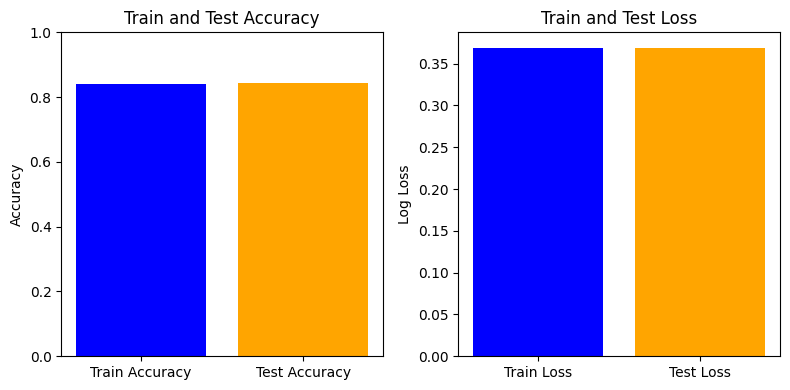

In [5]:
# Initialize and train the LDA model

lda = LinearDiscriminantAnalysis()

lda.fit(x_train, y_train)



# Make predictions on the training and test sets

y_train_pred = lda.predict(x_train)

y_test_pred = lda.predict(x_test)



# Calculate accuracy for training and test sets

train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)



# Calculate log loss for training and test sets

train_loss = log_loss(y_train, lda.predict_proba(x_train))

test_loss = log_loss(y_test, lda.predict_proba(x_test))



# Print accuracy and loss values

print("Train Accuracy:", train_accuracy)

print("Test Accuracy:", test_accuracy)

print("Train Loss:", train_loss)

print("Test Loss:", test_loss)



# Plotting accuracy and loss

fig, ax = plt.subplots(1, 2, figsize=(8, 4))



# Plotting accuracies

ax[0].bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])

ax[0].set_ylim([0, 1])

ax[0].set_title('Train and Test Accuracy')

ax[0].set_ylabel('Accuracy')



# Plotting losses

ax[1].bar(['Train Loss', 'Test Loss'], [train_loss, test_loss], color=['blue', 'orange'])

ax[1].set_title('Train and Test Loss')

ax[1].set_ylabel('Log Loss')



plt.tight_layout()

plt.show()



Training Set Metrics:
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83     27987
           1       0.82      0.88      0.85     28497

    accuracy                           0.84     56484
   macro avg       0.84      0.84      0.84     56484
weighted avg       0.84      0.84      0.84     56484



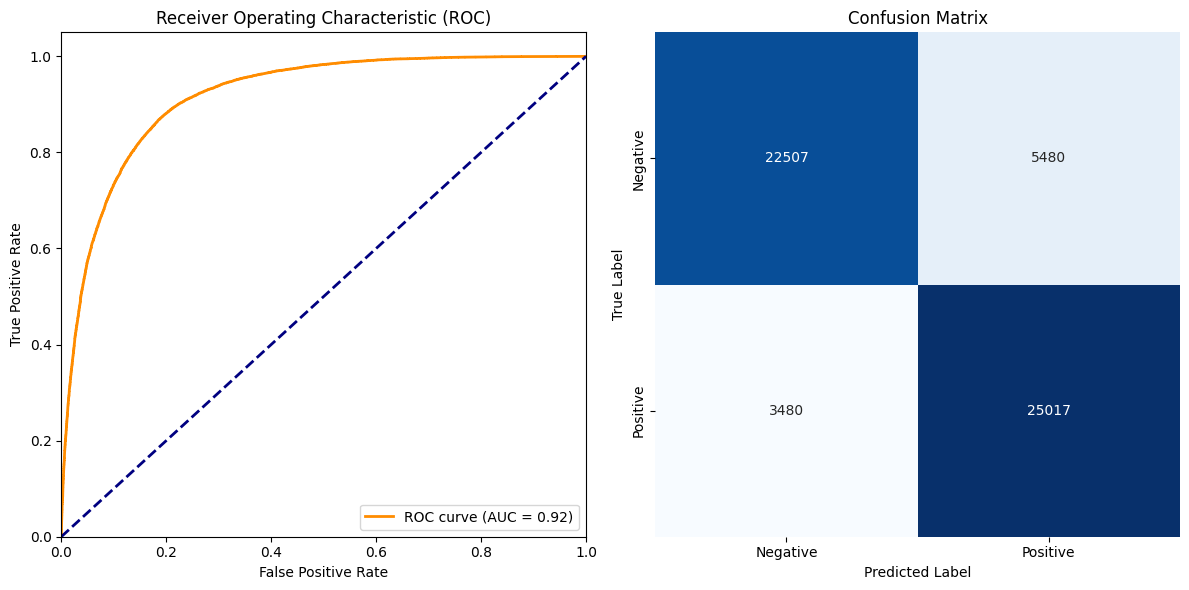


Testing Set Metrics:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      6854
           1       0.83      0.87      0.85      7267

    accuracy                           0.84     14121
   macro avg       0.84      0.84      0.84     14121
weighted avg       0.84      0.84      0.84     14121



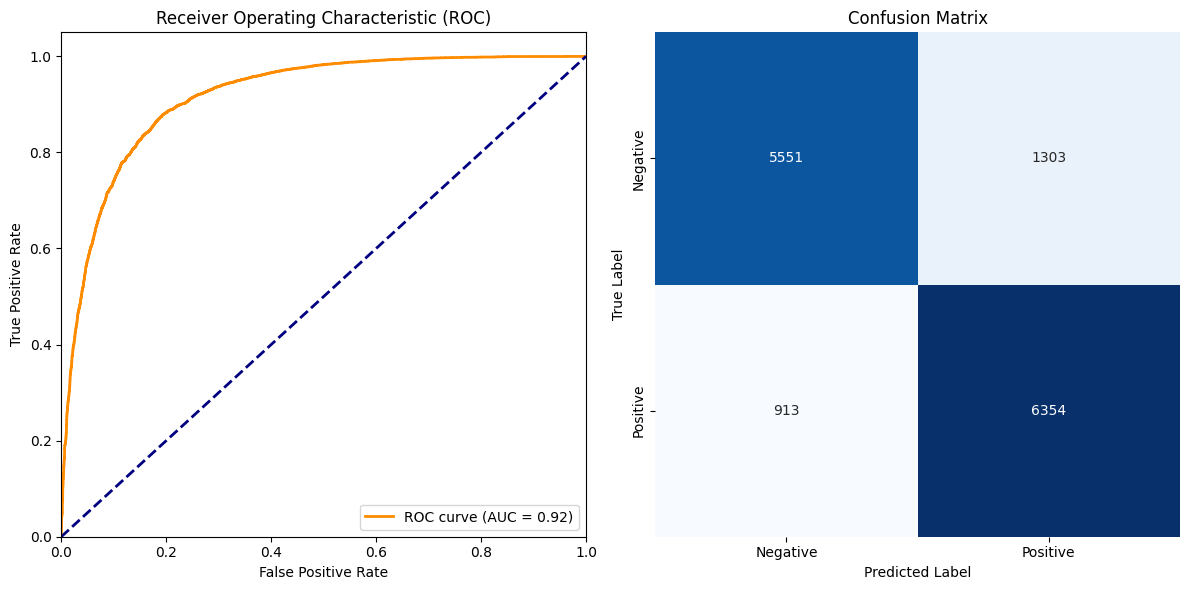

In [6]:
# Evaluate the model



# Get predicted probabilities for test set

y_test_prob = lda.predict_proba(x_test)[:, 1]  # Probability of positive class

y_train_prob = lda.predict_proba(x_train)[:, 1]



# Evaluate model performance using custom function

print(  "\nTraining Set Metrics:")

train_metrics = evaluate_model(y_train, y_train_pred, y_train_prob)

print("\nTesting Set Metrics:")

test_metrics = evaluate_model(y_test, y_test_pred, y_test_prob)





# Random Forest Classifier Model

In this analysis, we used a Random Forest Classifier (RFC) to predict the target variable in our dataset. A Random Forest is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes for classification problems. It works by aggregating the predictions of several decision trees, which helps reduce overfitting and improve generalization.

The main 5 parameters for a Random Forest Classifier (RFC) that typically have the most significant impact on model performance are:

* n_estimators: The number of trees in the forest. More trees generally improve the model's performance by reducing variance and making the predictions more robust, but they also increase computation time.

* max_depth: The maximum depth of the individual trees. Limits how deep the trees can grow. A deeper tree can capture more complex patterns, but may overfit. Shallower trees may underfit.

* min_samples_split: The minimum number of samples required to split an internal node. Controls the tree's complexity. A higher value helps prevent the tree from growing too deep and reduces overfitting, but may result in underfitting if set too high.

* min_samples_leaf: The minimum number of samples required to be at a leaf node.

Helps prevent overfitting by ensuring that leaves contain enough data. Larger values create simpler models by smoothing out predictions.

max_features:



The model was trained on the training data (x_train, y_train) and evaluated on both the training and test sets. To present the performance of the Random Forest Classifier, we plotted the train accuracy, test accuracy, train loss, and validation loss. The accuracy values are shown in sky blue, and the loss values are shown in salmon. This gives a clear overview of how well the model is performing in both classification and uncertainty.

Train Accuracy: 1.0
Test Accuracy: 0.8628992280999929
Train Loss: 0.09248795101291278
Validation Loss: 0.34583873786485086


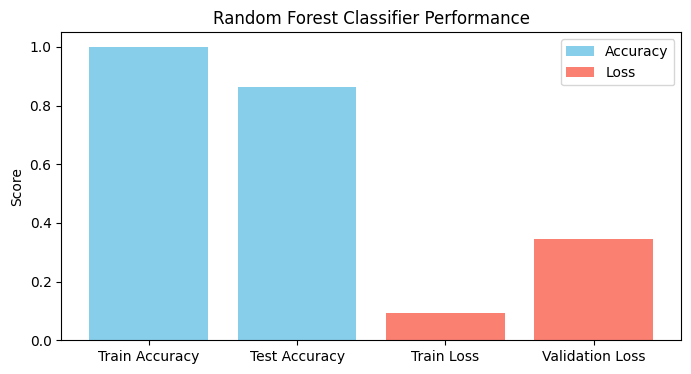

In [6]:


# Initialize and fit the RandomForestClassifier

clf = RandomForestClassifier(random_state=42)

clf.fit(x_train, y_train)



# Predict and calculate accuracy

y_train_pred = clf.predict(x_train)

y_test_pred = clf.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)



# Calculate train and validation loss (log-loss)

y_train_proba = clf.predict_proba(x_train)

y_test_proba = clf.predict_proba(x_test)

train_loss = log_loss(y_train, y_train_proba)

validation_loss = log_loss(y_test, y_test_proba)



# Print the results

print(f"Train Accuracy: {train_accuracy}")

print(f"Test Accuracy: {test_accuracy}")

print(f"Train Loss: {train_loss}")

print(f"Validation Loss: {validation_loss}")



# Plot the results

metrics = ["Train Accuracy", "Test Accuracy", "Train Loss", "Validation Loss"]

values = [train_accuracy, test_accuracy, train_loss, validation_loss]



plt.figure(figsize=(8, 4))

plt.bar(metrics[:2], values[:2], color="skyblue", label="Accuracy")

plt.bar(metrics[2:], values[2:], color="salmon", label="Loss")

plt.ylabel("Score")

plt.title("Random Forest Classifier Performance")

plt.legend()

plt.show()



Training Set Metrics:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27987
           1       1.00      1.00      1.00     28497

    accuracy                           1.00     56484
   macro avg       1.00      1.00      1.00     56484
weighted avg       1.00      1.00      1.00     56484



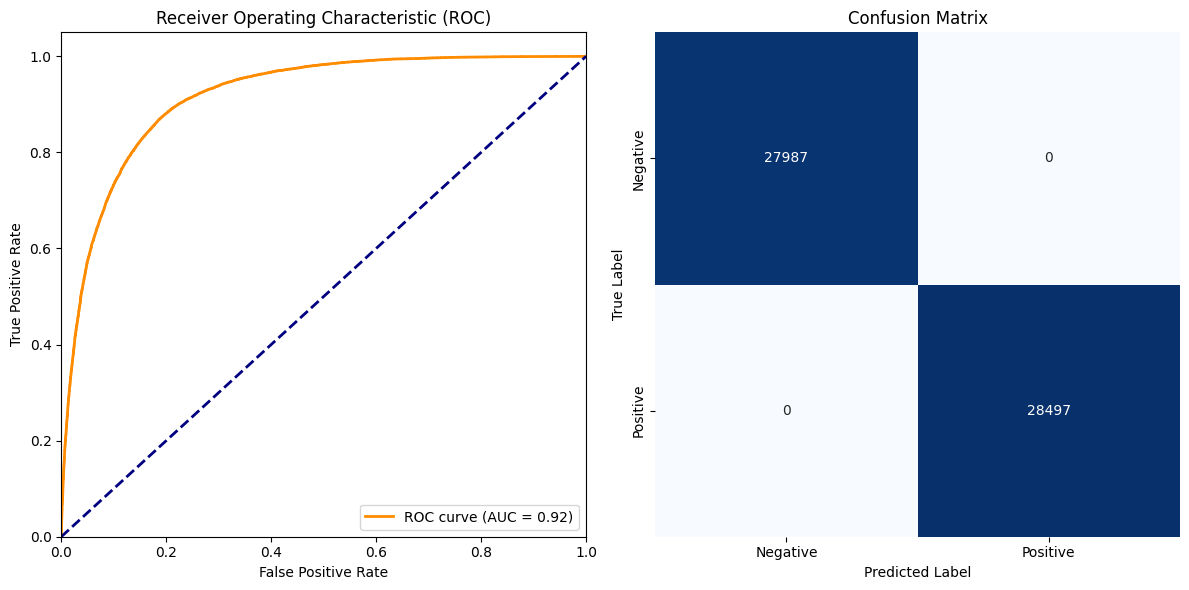


Testing Set Metrics:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      6854
           1       0.86      0.87      0.87      7267

    accuracy                           0.86     14121
   macro avg       0.86      0.86      0.86     14121
weighted avg       0.86      0.86      0.86     14121



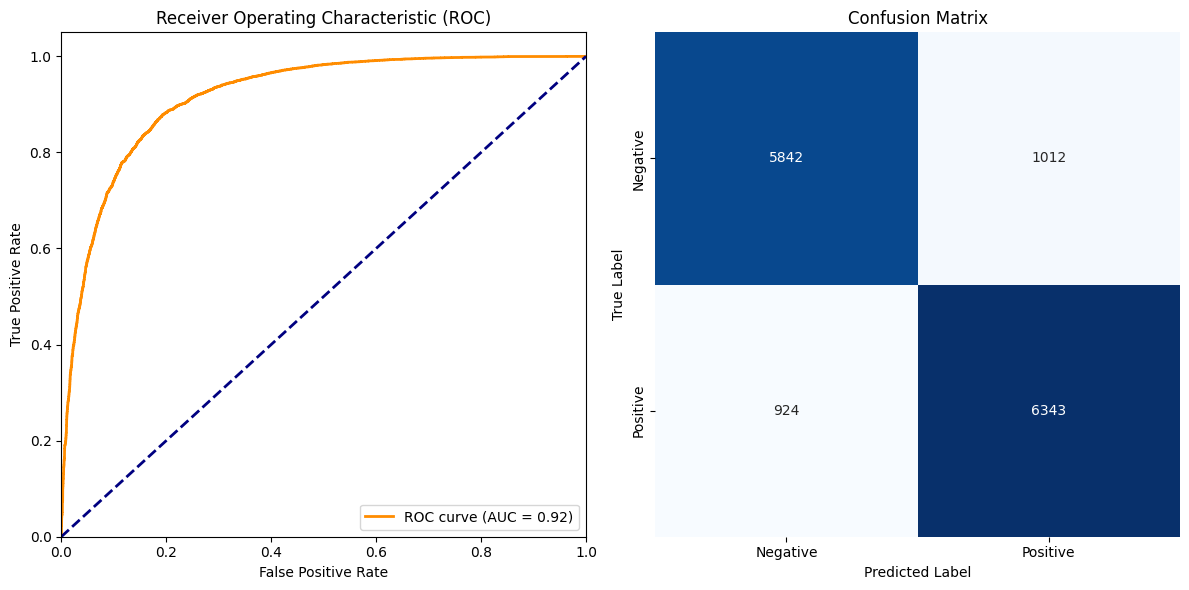

In [8]:
# Evaluate model performance using custom function

print(  "\nTraining Set Metrics:")

train_metrics = evaluate_model(y_train, y_train_pred, y_train_prob)

print("\nTesting Set Metrics:")

test_metrics = evaluate_model(y_test, y_test_pred, y_test_prob)

time elapsed: 1006.51s


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

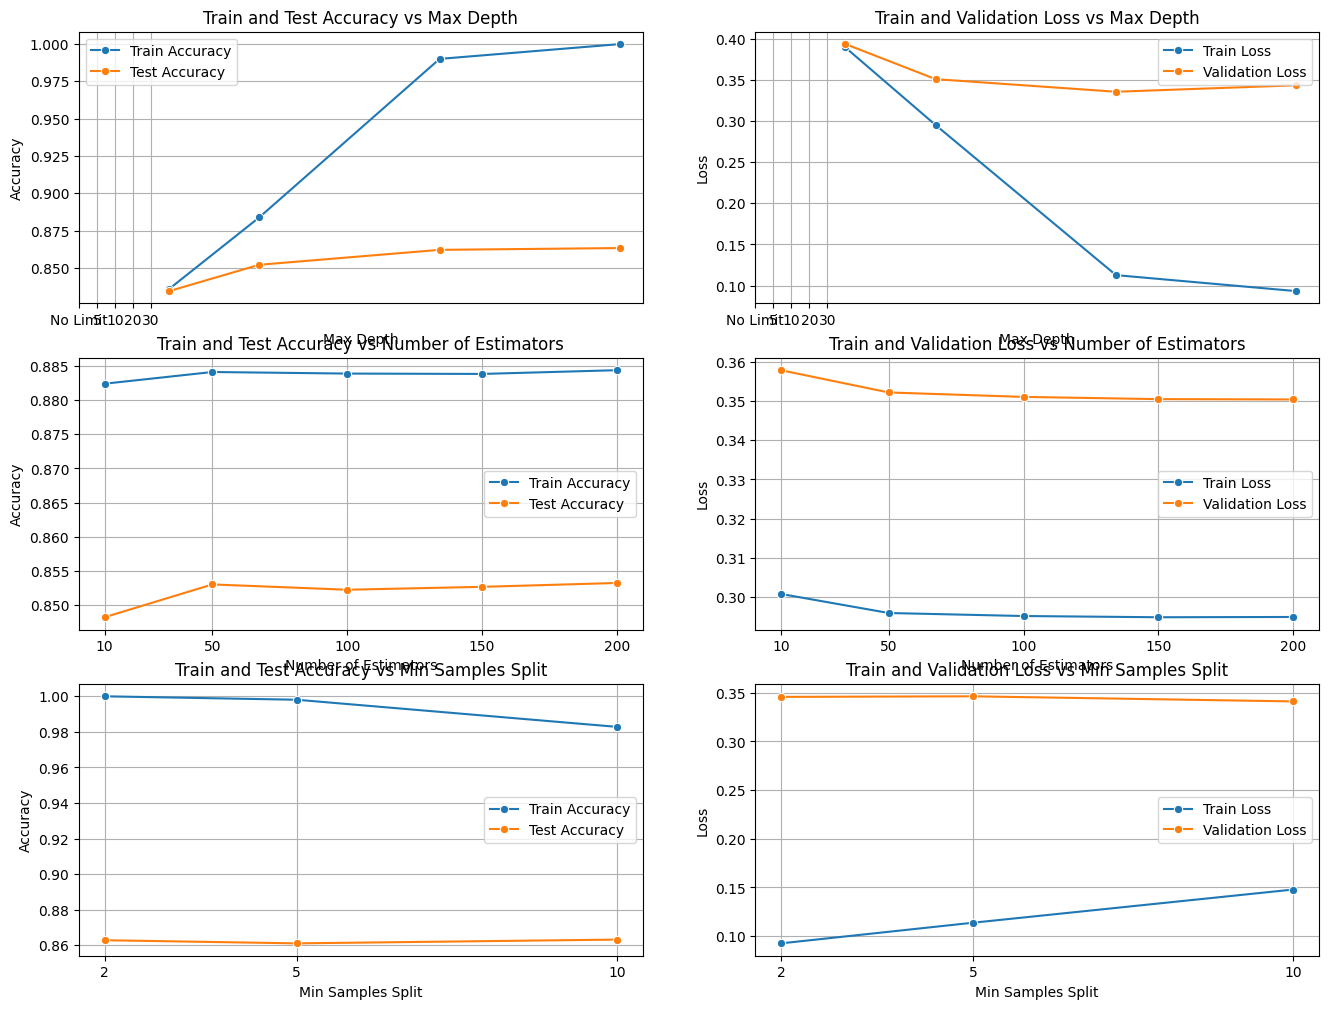

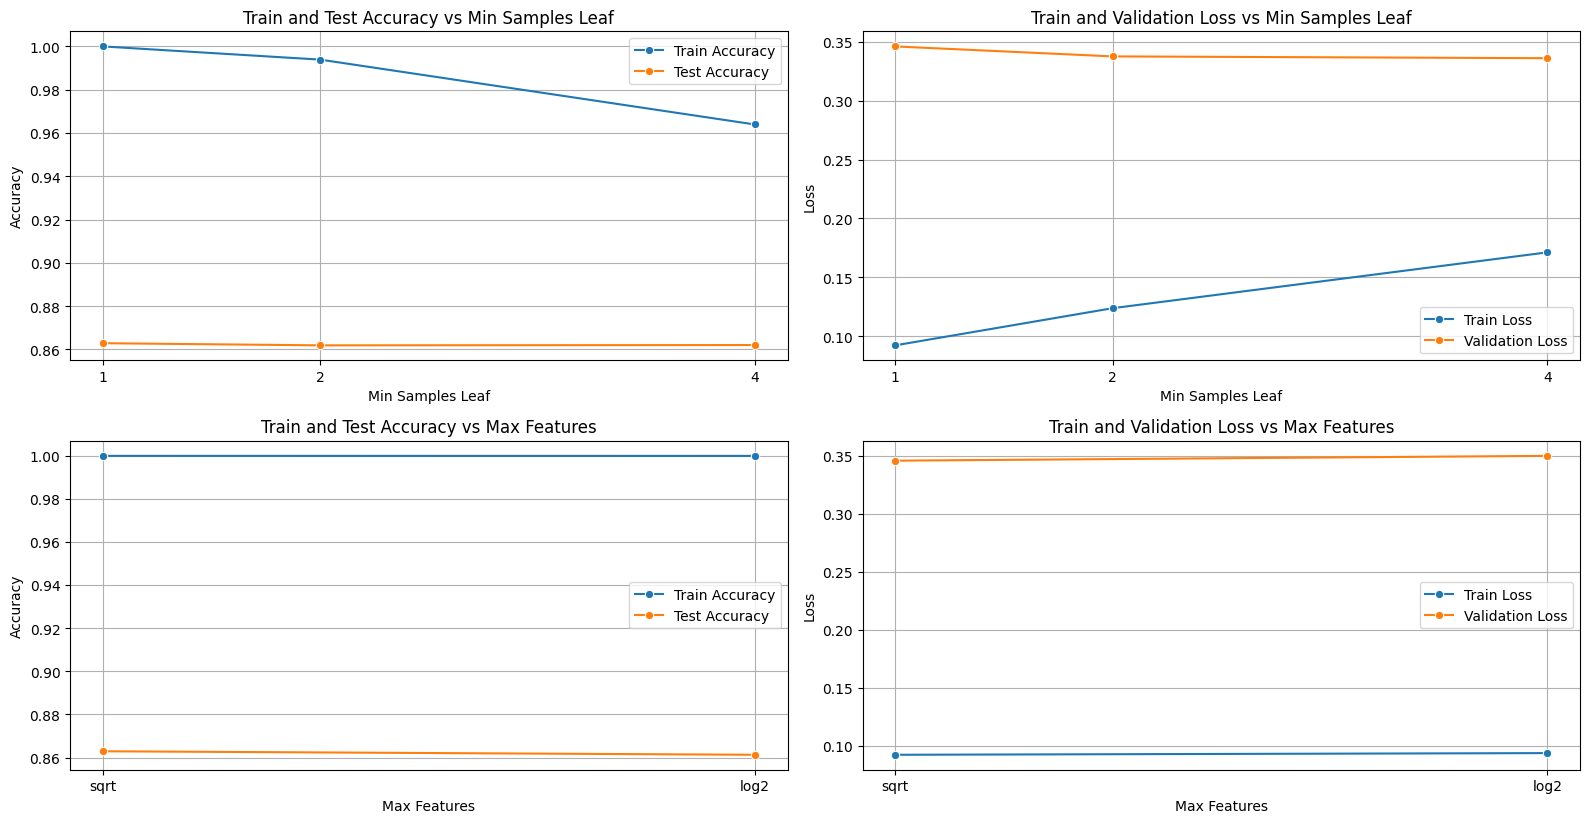

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
import time
start_time = time.time()
# Load and preprocess data



# Define parameter values
max_depth_values = [None, 5, 10, 20, 30]  # Example max_depth values
n_estimators_values = [10, 50, 100, 150, 200]  # Example number of estimators values
min_samples_split_values = [2, 5, 10]  # Example min_samples_split values
min_samples_leaf_values = [1, 2, 4]  # Example min_samples_leaf values
max_features_values = ['sqrt', 'log2']  # Example max_features values

# For storing accuracies and losses
train_accuracies_depth = []
test_accuracies_depth = []
train_losses_depth = []
validation_losses_depth = []

train_accuracies_estimators = []
test_accuracies_estimators = []
train_losses_estimators = []
validation_losses_estimators = []

train_accuracies_split = []
test_accuracies_split = []
train_losses_split = []
validation_losses_split = []

train_accuracies_leaf = []
test_accuracies_leaf = []
train_losses_leaf = []
validation_losses_leaf = []

train_accuracies_features = []
test_accuracies_features = []
train_losses_features = []
validation_losses_features = []

# Evaluate for different max_depth values
for max_depth in max_depth_values:
    clf = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    clf.fit(x_train, y_train)

    # Train and test accuracy
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    train_accuracies_depth.append(accuracy_score(y_train, y_train_pred))
    test_accuracies_depth.append(accuracy_score(y_test, y_test_pred))

    # Train and test log-loss (loss)
    y_train_proba = clf.predict_proba(x_train)
    y_test_proba = clf.predict_proba(x_test)
    train_losses_depth.append(log_loss(y_train, y_train_proba))
    validation_losses_depth.append(log_loss(y_test, y_test_proba))

# Evaluate for different n_estimators values
for n_estimators in n_estimators_values:
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=10, random_state=42)
    clf.fit(x_train, y_train)

    # Train and test accuracy
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    train_accuracies_estimators.append(accuracy_score(y_train, y_train_pred))
    test_accuracies_estimators.append(accuracy_score(y_test, y_test_pred))

    # Train and test log-loss (loss)
    y_train_proba = clf.predict_proba(x_train)
    y_test_proba = clf.predict_proba(x_test)
    train_losses_estimators.append(log_loss(y_train, y_train_proba))
    validation_losses_estimators.append(log_loss(y_test, y_test_proba))

# Evaluate for different min_samples_split values
for min_samples_split in min_samples_split_values:
    clf = RandomForestClassifier(n_estimators=100, min_samples_split=min_samples_split, random_state=42)
    clf.fit(x_train, y_train)

    # Train and test accuracy
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    train_accuracies_split.append(accuracy_score(y_train, y_train_pred))
    test_accuracies_split.append(accuracy_score(y_test, y_test_pred))

    # Train and test log-loss (loss)
    y_train_proba = clf.predict_proba(x_train)
    y_test_proba = clf.predict_proba(x_test)
    train_losses_split.append(log_loss(y_train, y_train_proba))
    validation_losses_split.append(log_loss(y_test, y_test_proba))

# Evaluate for different min_samples_leaf values
for min_samples_leaf in min_samples_leaf_values:
    clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=min_samples_leaf, random_state=42)
    clf.fit(x_train, y_train)

    # Train and test accuracy
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    train_accuracies_leaf.append(accuracy_score(y_train, y_train_pred))
    test_accuracies_leaf.append(accuracy_score(y_test, y_test_pred))

    # Train and test log-loss (loss)
    y_train_proba = clf.predict_proba(x_train)
    y_test_proba = clf.predict_proba(x_test)
    train_losses_leaf.append(log_loss(y_train, y_train_proba))
    validation_losses_leaf.append(log_loss(y_test, y_test_proba))

# Evaluate for different max_features values
for max_features in max_features_values:
    clf = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=42)
    clf.fit(x_train, y_train)

    # Train and test accuracy
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    train_accuracies_features.append(accuracy_score(y_train, y_train_pred))
    test_accuracies_features.append(accuracy_score(y_test, y_test_pred))

    # Train and test log-loss (loss)
    y_train_proba = clf.predict_proba(x_train)
    y_test_proba = clf.predict_proba(x_test)
    train_losses_features.append(log_loss(y_train, y_train_proba))
    validation_losses_features.append(log_loss(y_test, y_test_proba))

print("time elapsed: {:.2f}s".format(time.time() - start_time))

# Plot results for max_depth, n_estimators, min_samples_split, min_samples_leaf, max_features
plt.figure(figsize=(16, 12))

# Train and Test Accuracy for Max Depth
plt.subplot(3, 2, 1)
sns.lineplot(x=max_depth_values, y=train_accuracies_depth, marker='o', label='Train Accuracy')
sns.lineplot(x=max_depth_values, y=test_accuracies_depth, marker='o', label='Test Accuracy')
plt.title("Train and Test Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
tick_labels_depth = ['No Limit' if depth is None else str(depth) for depth in max_depth_values]
plt.xticks(ticks=np.arange(len(max_depth_values)), labels=tick_labels_depth)
plt.legend()
plt.grid()

# Train and Validation Loss for Max Depth
plt.subplot(3, 2, 2)
sns.lineplot(x=max_depth_values, y=train_losses_depth, marker='o', label='Train Loss')
sns.lineplot(x=max_depth_values, y=validation_losses_depth, marker='o', label='Validation Loss')
plt.title("Train and Validation Loss vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Loss")
plt.xticks(ticks=np.arange(len(max_depth_values)), labels=tick_labels_depth)
plt.legend()
plt.grid()

# Train and Test Accuracy for Number of Estimators
plt.subplot(3, 2, 3)
sns.lineplot(x=n_estimators_values, y=train_accuracies_estimators, marker='o', label='Train Accuracy')
sns.lineplot(x=n_estimators_values, y=test_accuracies_estimators, marker='o', label='Test Accuracy')
plt.title("Train and Test Accuracy vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.xticks(ticks=n_estimators_values)
plt.legend()
plt.grid()

# Train and Validation Loss for Number of Estimators
plt.subplot(3, 2, 4)
sns.lineplot(x=n_estimators_values, y=train_losses_estimators, marker='o', label='Train Loss')
sns.lineplot(x=n_estimators_values, y=validation_losses_estimators, marker='o', label='Validation Loss')
plt.title("Train and Validation Loss vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Loss")
plt.xticks(ticks=n_estimators_values)
plt.legend()
plt.grid()

# Train and Test Accuracy for Min Samples Split
plt.subplot(3, 2, 5)
sns.lineplot(x=min_samples_split_values, y=train_accuracies_split, marker='o', label='Train Accuracy')
sns.lineplot(x=min_samples_split_values, y=test_accuracies_split, marker='o', label='Test Accuracy')
plt.title("Train and Test Accuracy vs Min Samples Split")
plt.xlabel("Min Samples Split")
plt.ylabel("Accuracy")
plt.xticks(ticks=min_samples_split_values)
plt.legend()
plt.grid()

# Train and Validation Loss for Min Samples Split
plt.subplot(3, 2, 6)
sns.lineplot(x=min_samples_split_values, y=train_losses_split, marker='o', label='Train Loss')
sns.lineplot(x=min_samples_split_values, y=validation_losses_split, marker='o', label='Validation Loss')
plt.title("Train and Validation Loss vs Min Samples Split")
plt.xlabel("Min Samples Split")
plt.ylabel("Loss")
plt.xticks(ticks=min_samples_split_values)
plt.legend()
plt.grid()

# Train and Test Accuracy for Min Samples Leaf
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 1)
sns.lineplot(x=min_samples_leaf_values, y=train_accuracies_leaf, marker='o', label='Train Accuracy')
sns.lineplot(x=min_samples_leaf_values, y=test_accuracies_leaf, marker='o', label='Test Accuracy')
plt.title("Train and Test Accuracy vs Min Samples Leaf")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Accuracy")
plt.xticks(ticks=min_samples_leaf_values)
plt.legend()
plt.grid()

# Train and Validation Loss for Min Samples Leaf
plt.subplot(3, 2, 2)
sns.lineplot(x=min_samples_leaf_values, y=train_losses_leaf, marker='o', label='Train Loss')
sns.lineplot(x=min_samples_leaf_values, y=validation_losses_leaf, marker='o', label='Validation Loss')
plt.title("Train and Validation Loss vs Min Samples Leaf")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Loss")
plt.xticks(ticks=min_samples_leaf_values)
plt.legend()
plt.grid()

# Train and Test Accuracy for Max Features
plt.subplot(3, 2, 3)
sns.lineplot(x=max_features_values, y=train_accuracies_features, marker='o', label='Train Accuracy')
sns.lineplot(x=max_features_values, y=test_accuracies_features, marker='o', label='Test Accuracy')
plt.title("Train and Test Accuracy vs Max Features")
plt.xlabel("Max Features")
plt.ylabel("Accuracy")
plt.xticks(ticks=max_features_values)
plt.legend()
plt.grid()

# Train and Validation Loss for Max Features
plt.subplot(3, 2, 4)
sns.lineplot(x=max_features_values, y=train_losses_features, marker='o', label='Train Loss')
sns.lineplot(x=max_features_values, y=validation_losses_features, marker='o', label='Validation Loss')
plt.title("Train and Validation Loss vs Max Features")
plt.xlabel("Max Features")
plt.ylabel("Loss")
plt.xticks(ticks=max_features_values)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# How to save model (.ckpt) in sklearn?
If you wish to save a model for future uses, one can use Joblib or Pickle to save model.ckpt(checkpoint). <br>
To save a model checkpoint, you can use torch.save() with a .ckpt extension. <br>

## Examples of saving

```python
from sklearn.ensemble import RandomForestClassifier
import joblib

# Train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model as a .ckpt file
joblib.dump(model, 'model.ckpt')
```
OR one can use pickle <br>
```python
# Loading with joblib
model = joblib.load('model.ckpt')

# Loading with pickle
with open('model.ckpt', 'rb') as f:
    model = pickle.load(f)
```

Key Sections:
Algorithms Used: The notebook explores several models, including Logistic Regression, Deep Neural Networks (DNNs) of varying complexity, XGBoost, LightGBM, K-Nearest Neighbors (KNN), Voting Classifier, Random Forest, Decision Tree, Support Vector Machine (SVM), Linear Discriminant Analysis (LDA), and PCA.

Data Preprocessing: Steps include removing an index column, re-labeling the classes (1 for Signal and 0 for Noise), and preparing the dataset for training.

Evaluation Metrics and ROC Curves: It defines functions for plotting ROC-AUC curves and calculating metrics like precision, recall, F1-score, etc., for evaluating each model's performance.

Individual Model Implementations:

Logistic Regression: Implemented from scratch and evaluated.
Deep Learning Models: Includes Fully Connected Neural Networks with dropout and batch normalization. Overfitting issues are addressed through architectural adjustments.
ResNet18: An advanced model is explored to examine its performance on this dataset.
XGBoost: Optimized through hyperparameter tuning and feature selection, with SHAP values calculated for interpretability.
KNN, Decision Trees, and Voting Classifier: Tested with varying configurations.
Support Vector Machine (SVM): Different kernels are tested after applying PCA for dimensionality reduction.
Feature Importance Analysis: Feature importance is evaluated using SHAP values for tree-based models, with decision tree visualizations to understand which features contribute most to predictions.

Model Saving: Examples are provided for saving models using joblib or pickle.

Summary of Code Cells:
The code includes importing libraries, loading and preprocessing the dataset, splitting data into training and test sets, defining various machine learning models, training and evaluating them, and plotting metrics like ROC-AUC

# Summary
The given notebook primarily covers machine learning and deep learning model implementations and evaluations for binary classification, specifically focusing on distinguishing "Signal" from "Noise." <br>

Models Used: <br>
Algorithms Used: The notebook explores several models, including Logistic Regression, Deep Neural Networks (DNNs) of varying complexity, XGBoost, LightGBM, K-Nearest Neighbors (KNN), Voting Classifier, Random Forest, Decision Tree, Support Vector Machine (SVM), Linear Discriminant Analysis (LDA), and PCA. <br>

Data Preprocessing: Steps include removing an index column, re-labeling the classes (1 for Signal and 0 for Noise), and preparing the dataset for training.<br>

Evaluation Metrics and ROC Curves: It defines functions for plotting ROC-AUC curves and calculating metrics like precision, recall, F1-score, etc., for evaluating each model's performance.<br>

Individual Model Implementations:

Logistic Regression: Implemented from scratch and evaluated.
Deep Learning Models: Includes Fully Connected Neural Networks with dropout and batch normalization. Overfitting issues are addressed through architectural adjustments.<br>
ResNet18: An advanced model is explored to examine its performance on this dataset.<br>
XGBoost: Optimized through hyperparameter tuning and feature selection, with SHAP values calculated for interpretability.<br>
KNN, Decision Trees, and Voting Classifier: Tested with varying configurations.<br>
Support Vector Machine (SVM): Different kernels are tested after applying PCA for dimensionality reduction.<br>
Feature Importance Analysis: Feature importance is evaluated using SHAP values for tree-based models, with decision tree visualizations to understand which features contribute most to predictions.<br>

Model Saving: Examples are provided for saving models using joblib or pickle. <br>

Summary of Code Cells:
The code includes importing libraries, loading and preprocessing the dataset, splitting data into training and test sets, defining various machine learning models, training and evaluating them, and plotting metrics like ROC-AUC. <br>